<a href="https://colab.research.google.com/github/LucianoTrujillo/7506R-2C2022-GRUPO10/blob/main/7506R_TP1_GRUPO10_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**TP1: Propiedades en Venta**



---


---


## *Facultad de Ingeniería, Universidad de Buenos Aires*

---
### *2do Cuatrimestre de 2022*

---
### *Organización de Datos*

### *Curso: Rodriguez*

### *Integrantes:*

* Luciano Leon Trujillo Palomo ltrujillo@fi.uba.ar 105664
* María Pilar Gaddi mgaddi@fi.uba.ar 105682
* Federico Adrian Solari Vazquez fsolariv@fi.uba.ar 106895
* Maria Vazquez Navarro mvazquezn@fi.uba.ar 105576
* Mateo Bulnes mbulnes@fi.uba.ar 106211
---

## **Objetivo del trabajo**

---
---

El objetivo de la siguiente investigación es aplicar técnicas de análisis exploratorio, preprocesamiento
de datos, agrupamiento, clasificación y regresión sobre un dataset real y poder obtener conclusiones y predicciones útiles. En especial, identificamos tres objetivos individuales:
* analizar si es posible agrupar los datos en función de
algún criterio, identificando a qué obedece el mismo.
* clasificar cada anuncio en tres categorías relacionadas al
precio de venta (alto, medio y bajo).
* predecir el precio de venta en dólares de una propiedad tipo
vivienda ubicada en Capital Federal.

---





## **Setup previo**


Importamos todas las librerías a utilizar a lo largo del trabajo:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import sklearn as sk
from sklearn import datasets
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.preprocessing import StandardScaler
from importlib import reload

Importamos el dataset original y lo guardamos para su posterior uso:

In [2]:

dwn_url='https://drive.google.com/uc?id=1z05Y6UwTu8fz1DpeE4JlRoyjJx_vPKmM'
ds_original = pd.read_csv(dwn_url)
ds_original.head(5)

id  start_date    end_date  created_on    latitud  \
0  XZq2dFGxBiboHY3Bo/tqlw==  2021-09-09  2022-01-27  2021-09-09 -38.957632   
1  8afoK+yMH/rnnlYiktwgNA==  2021-09-09  2021-10-23  2021-09-09 -34.888878   
2  iVaG5rBB47dd1Ya4BMXREA==  2021-09-09  2022-03-09  2021-09-09 -32.488717   
3  QE1QVMWKAHWkd0qT0FtPWA==  2021-09-09  2022-01-27  2021-09-09 -34.900165   
4  tJ5lSk7IysG/71OGhacNZA==  2021-09-09  2022-01-27  2021-09-09 -38.954528   

    longitud    place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
0 -68.105443     Neuquén      NaN      NaN      NaN       NaN     Venta   
1 -56.092368  Montevideo      NaN      NaN      NaN       NaN     Venta   
2 -58.257499  Entre Ríos      NaN      NaN      NaN       NaN     Venta   
3 -54.808453   Maldonado      NaN      NaN      NaN       NaN     Venta   
4 -68.041862     Neuquén      NaN      NaN      NaN       NaN     Venta   

  property_type  property_rooms  property_bedrooms  property_surface_total  \
0          Casa             6.0                NaN                     NaN   
1          Casa             4.0                3.0                   193.0   
2          Casa             NaN                NaN                   110.0   
3          Casa             NaN                3.0                     NaN   
4            PH             3.0                2.0                     NaN   

   property_surface_covered  property_price property_currency  \
0                     206.0             NaN               NaN   
1                     193.0        390000.0               USD   
2                      45.0         47000.0               USD   
3                     180.0        400000.0               USD   
4                      98.0        102000.0               USD   

       property_title  
0      Casa - Capital  
1       Casa - Malvín  
2      Casa - Uruguay  
3    Casa - El Chorro  
4  PH - Villa Farrell

In [3]:
# función auxiliar para mostrar gráficos completos 
def mostrar_metadata_grafico(titulo, ylabel=None, xlabel=None, leyendas=None):
  plt.title(titulo)
  if ylabel:
    plt.ylabel = ylabel
  if xlabel:
    plt.xlabel = xlabel
  if leyendas:
    plt.legend = leyendas
  plt.show()



---
---


# Análisis Exploratorio y Preprocesamiento de Datos
---
---



## Pre-selección de datos
---
El primer paso consiste en la selección de los datos que se van a utilizar, se deben filtrar
únicamente los anuncios de propiedades de tipo vivienda ( Casa, PH y Departamento ) ubicados
en Capital Federal cuyo tipo de operación sea venta y su precio se encuentre en dólares (USD).

Primero filtramos por tipo de vivienda:

In [4]:
ds = ds_original.copy()
ds = ds.query('property_type == "Casa" or property_type == "Departamento" or property_type == "PH"')

Luego filtramos los ubicados en Capital Federal: 



In [5]:
ds.query('\
place_l3=="Capital Federal" or \
place_l4=="Capital Federal" or \
place_l5=="Capital Federal" or \
place_l6=="Capital Federal"').size

0

Observamos que la única columna que contiene a la clasificación de Capital Federal es place_l2, con lo cual con filtrar por l2, nos aseguramos de únicamente quedarnos con las filas que cumplan ser de Capital Federal.

In [6]:
ds = ds.query('place_l2 == "Capital Federal"')

Filtramos por tipo de operación (Venta):

In [7]:
ds = ds.query('operation == "Venta"')

Filtramos por moneda (USD):

In [8]:
ds = ds.query('property_currency == "USD"')

Comparamos el tamaño del ds original y el que utilizaremos para el análisis en el trabajo:

In [9]:
print("Tamaño original:", ds_original.shape, "Tamaño actual", ds.shape)

Tamaño original: (460154, 20) Tamaño actual (94249, 20)


#### Filtrado de valores inválidos

#####Duplicados

Analizaremos la cantidad de duplicados del dataset.

In [10]:
print(f"Cantidad de duplicados: {ds[ds.duplicated()].shape[0]}")
print(f"Porcentaje de duplicados: {round(ds[ds.duplicated()].shape[0]*100/ds.shape[0])}%")

Cantidad de duplicados: 0
Porcentaje de duplicados: 0%


Procedemos a analizar los duplicados sin tener en cuenta la columna del id.

In [11]:
columnas = ds.columns.to_list()
columnas.remove('id')

print(f"Cantidad de filas con todo duplicado menos id: {ds[ds.duplicated(subset=columnas)].shape[0]}")
print(f"Porcentaje de filas con todo duplicado menos id: {round(ds[ds.duplicated(subset=columnas)].shape[0]*100/ds.shape[0])}%")

Cantidad de filas con todo duplicado menos id: 1222
Porcentaje de filas con todo duplicado menos id: 1%



Con lo observado asumimos que el id se genera automaticamente al ingresar datos, sin antes verificar que los mismos no hayan sido ingresados antes.

Sin embargo notamos el hecho de que podrian presentarse casos de departamentos en los cuales todo sea igual, y se trate de dos departamentos en distintos pisos de un edificio, por lo tanto a continuacion analizaremos la frecuencia de esos casos.

In [12]:
ds_duplicados = ds[ds.duplicated(subset=columnas)]

duplicados_en_casa_y_ph=ds_duplicados.property_type != "Departamento"
duplicados_en_casa_y_ph.sum()

ds_solo_deptos_duplicados=ds_duplicados.drop(ds_duplicados[duplicados_en_casa_y_ph].index) #dejamos esta variable, porque nos interesan las cantidad para anlaizar LO QUE FALTA
print(ds_duplicados.property_title.unique().size)
print(ds_solo_deptos_duplicados.property_title.unique().size)

688
600


Vemos que los datos de departamentos que se encuentran duplicados son 688, mientras que si eliminamos los duplicados, nos quedariamos con un total de 600 casos unicos. 

Nos parece razonable eliminar esos 88, siendo que en el peor de los casos solo estariamos perdiendo 88 departamentos que en realidad se encuentren en el mismo edificio, lo cual no nos parece que aporte tanto a nuestro modelo. 

Con los casos de PH y Casa no nos parece necesario hacer el analisis anteior, siendo que en estos casos la latitud y longitud si deberian cambiar en caso de tratarse de casas o PHs diferentes. Por lo tanto eliminamos los casos duplicados.

In [13]:
print("Dataset antes de eliminar los duplicados mencionados: ", ds.shape[0])
ds.drop_duplicates(subset=columnas, inplace=True)
print("Dataset antes de eliminar los duplicados mencionados: ", ds.shape[0])

Dataset antes de eliminar los duplicados mencionados:  94249
Dataset antes de eliminar los duplicados mencionados:  93027


##### Tener mas superficie cubierta que superficie total

Notamos que los registros que tengan mas superficie cubierta que total seran invalidos, siendo que no se puede cubrir mas superficie que con la que se cuenta. Analizamos esos registros:

In [14]:
print("Cantidad de registros con menor superficie total que cubierta: ", len(ds.query('property_surface_total < property_surface_covered')))
print(f"Porcentaje: {(len(ds.query('property_surface_total < property_surface_covered')) * 100 / len(ds))}%")


Cantidad de registros con menor superficie total que cubierta:  197
Porcentaje: 0.21176647639932492%


Observando bajas cantidades de estos registros decidimos eliminarlos del dataset.

In [15]:
ds.drop(ds.query('property_surface_total < property_surface_covered').index, inplace=True)

##### Tener cubierta de 1.0 

In [16]:
print(ds.query('property_surface_covered == 1').property_surface_total.unique())
print(ds.query('property_surface_covered == 1').property_surface_total.value_counts())


[ nan 117.  80.  50.]
117.0    2
80.0     1
50.0     1
Name: property_surface_total, dtype: int64


In [17]:
print('Cantidad de registros con superficie cubierta = 1: ', len(ds.query('property_surface_covered == 1')))
print(f"Porcentaje: {len(ds.query('property_surface_covered == 1')) * 100 / len(ds)}%")

Cantidad de registros con superficie cubierta = 1:  29
Porcentaje: 0.031239900894107508%


In [18]:
ds.drop(ds.query('property_surface_covered == 1').index , inplace=True)

Notamos que una cubierta de 1.0 no tiene sentido. Al analizarlos junto con la superficie total vemos que la mayoria son datos invalidos. Siendo que las cantidades de registros con estas caracteristicas es razonablemente pequeña a comparacion de la totalidad de los datos, decidimos eliminar los registros. 

##### Tener mas habitaciones que ambientes

Realizamos un análisis sobre los posibles registros que podrían llegar a generar valores inválidos en  property_bedrooms. 

Debido a la relacion logica que tienen property_bedrooms y property_rooms, consideramos que property_rooms es el mejor candidato para determinar los valores inválidos de property_bedrooms. 

In [19]:
pd.crosstab(ds.property_rooms, ds.property_bedrooms) 

property_bedrooms  -1.0    1.0    2.0    3.0    4.0    5.0    6.0    7.0   \
property_rooms                                                              
1.0                    0   5315     28      1      1      1      0      0   
2.0                    1  25503    225      8      0      0      0      0   
3.0                    0    442  25331    340     32      2      1      0   
4.0                    0     33   1258  14394    296     15      8      1   
5.0                    0      1    121   1930   2900     48      8      3   
6.0                    0      0     35    455    820    471     19      1   
7.0                    0      1      3    100    348    167     82     10   
8.0                    0      0      4     15    132     83     56     46   
9.0                    0      0      0     17     37     37     21     18   
10.0                   0      0      0      2     22     20     15     10   
11.0                   0      0      0      0      3      6      4      3   
12.0                   0      0      0      1      2      5      4      3   
13.0                   0      0      0      0      0      0      0      0   
14.0                   0      0      0      0      0      0      0      0   
15.0                   0      2      0      0      0      0      0      0   
16.0                   0      0      0      0      0      0      0      0   
17.0                   0      0      0      0      0      0      0      0   
18.0                   0      0      0      0      0      0      0      0   
19.0                   0      0      0      0      0      0      0      0   
20.0                   0      1      0      0      0      0      0      0   
24.0                   0      0      0      0      0      0      0      0   
28.0                   0      0      0      0      0      0      0      0   
30.0                   0      0      2      0      0      0      0      0   
32.0                   0      0      0      0      0      0      0      0   
36.0                   0      0      0      0      0      0      0      0   
40.0                   0      0      0      1      0      0      0      0   

property_bedrooms   8.0    9.0   ...   14.0   15.0   16.0   17.0   18.0  \
property_rooms                   ...                                      
1.0                    0      0  ...      0      0      0      0      0   
2.0                    0      0  ...      0      0      0      0      0   
3.0                    0      0  ...      0      0      0      0      0   
4.0                    1      0  ...      0      0      0      0      0   
5.0                    2      0  ...      0      0      0      0      0   
6.0                    3      0  ...      0      0      0      0      0   
7.0                    1      0  ...      0      0      0      0      0   
8.0                   10      0  ...      0      1      0      0      0   
9.0                   16      0  ...      0      0      0      0      0   
10.0                   5     16  ...      0      2      0      0      0   
11.0                   7      3  ...      0      0      0      0      0   
12.0                   3      2  ...      0      0      0      0      0   
13.0                   0      3  ...      0      0      0      0      0   
14.0                   2      1  ...      0      0      0      0      0   
15.0                   0      0  ...      2      1      2      0      0   
16.0                   0      0  ...      0      0      2      0      0   
17.0                   1      0  ...      1      0      1      1      0   
18.0                   0      0  ...      0      0      0      3      0   
19.0                   0      0  ...      0      0      0      0      2   
20.0                   0      0  ...      0      0      0      1      0   
24.0                   0      0  ...      0      0      0      0      0   
28.0                   0      0  ...      0      0      1      0      0   
30.0                   0      0  ...      0

Viendo la tabla, pudimos visulizar que en caso de que la cantidad de ambientes sea menor a la cantidad de habitaciones, property_bedrooms seria un valor inválido. No tendria logica tener mas habitaciones que ambientes.



Además, notamos que hay valores de property_bedrooms negativos, con lo cual esos valores también serían invalidos.

In [20]:
cond_mas_bedrooms_que_rooms = ds['property_bedrooms'] > ds['property_rooms']

reg_mas_bed_que_rooms = ds[cond_mas_bedrooms_que_rooms]
print(f"Cantidad de registros con mas bedrooms que rooms: {reg_mas_bed_que_rooms.shape[0]}")

Cantidad de registros con mas bedrooms que rooms: 134


Como podemos observar hay 134 registros de los cuales hay mas habitaciones en la propiedad que cantidad de ambientes, por lo tanto serian valores inválidos por lo que consideramos que hay que eliminarlos.

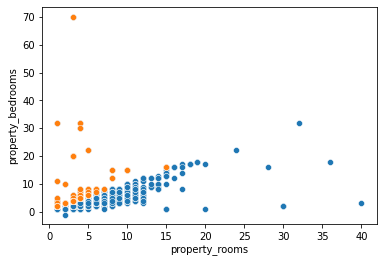

In [21]:
sns.scatterplot(data = ds, x = "property_rooms", y = "property_bedrooms")
sns.scatterplot(data = reg_mas_bed_que_rooms, x = "property_rooms", y = "property_bedrooms")#grafico de valores inválidos

In [22]:
ds.drop(reg_mas_bed_que_rooms.index, inplace=True)# elimino las filas con mas bedrooms que rooms

Visualizamos el grafico actualizado, sin los registros que tenian mas habitaciones que ambientes.

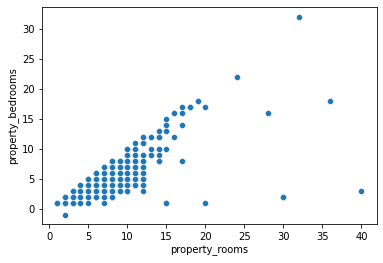

In [23]:
sns.scatterplot(data = ds, x = "property_rooms", y = "property_bedrooms")

Procedemos a eliminar los registros con habitaciones negativas.

In [24]:
cond_bedrooms_menores_a_uno = ds['property_bedrooms'] < 1
reg_con_bedrooms_menores_a_uno = ds[cond_bedrooms_menores_a_uno]
print(f"Cantidad de registros con cuartos menores a 0: {reg_con_bedrooms_menores_a_uno.shape[0]}")


Cantidad de registros con cuartos menores a 0: 1


Observamos que solo un registro contiene una cantidad de bedrooms menor o igual a cero, por ese motivo consideramos que debe ser eliminado.

In [25]:
ds.drop(reg_con_bedrooms_menores_a_uno.index, inplace=True)# elimino las filas con mas bedrooms menores a 1

A continuacion demostramos que no se encuentran valores negativos en las columnas en donde los valores siempre deben ser positivos, por lo tanto no es necesario eliminar datos.

In [26]:
print(f"Cantidad de registros con property_price negativo: {ds[ds['property_price'] < 1].shape[0]}") 

Cantidad de registros con property_price negativo: 0


In [27]:
print(f"Cantidad de registros con property_rooms negativo: {ds[ds['property_rooms'] < 1].shape[0]}") 

Cantidad de registros con property_rooms negativo: 0


In [28]:
print(f"Cantidad de registros con property_surface_total negativo: {ds[ds['property_surface_total'] < 1].shape[0]}") 

Cantidad de registros con property_surface_total negativo: 0


In [29]:
print(f"Cantidad de registros con property_surface_covered negativo: {ds[ds['property_surface_covered'] < 1].shape[0]}") 

Cantidad de registros con property_surface_covered negativo: 0


##### Que no se cumpla created_on <= start_date < end_date




In [30]:
print(f"Cantidad de registros con fecha de inicio anterior a su creacion: {ds[ds['start_date'] < ds['created_on']].shape[0]}") 
print(f"Cantidad de registros con fecha de fin anterior a su inicio: {ds[ds['end_date'] < ds['start_date']].shape[0]}")
print(f"Cantidad de registros con fecha de fin anterior a su creacion: {ds[ds['end_date'] < ds['created_on']].shape[0]}")

Cantidad de registros con fecha de inicio anterior a su creacion: 0
Cantidad de registros con fecha de fin anterior a su inicio: 0
Cantidad de registros con fecha de fin anterior a su creacion: 0


Como podemos observar todas las fechas de los avisos que se encuentran en el dataset cumplen con las condiciones necesarias para ser consideradas validas. (considerando al año 9999 como que el aviso no fue dado de baja todavía, se analiza mas adelante)


## Exploración Inicial
---


### Clasificación  de variables 


####Variables cuantitativas discretas

- start date, end date, created on: 

    Las fechas pueden ser consideradas cuantitativas discretas dado que toman valores numéricos ordenables, y entre dos valores consecutivos no existen valores intermedios. 

- property_rooms, property_bedrooms: 

    Pueden ser consideradas cuantitativas discretas ya que pueden tomar un conjunto a lo sumo numerable de valores, y cuentan cosas.

#### Variables cuantitativas continuas

- latitud y longitud:  

    Estas variables al tomar valores numéricos en los cuales existen infinitos valores intermedios (son arbitrariamente fraccionables), pueden ser consideradas como continuas. 

- property_surface_total, property_surface_covered, property_price: 

    Al igual que las variables anteriores, estas pueden tomar infinitos valores numéricos intermedios y por esa razón son consideradas continuas. 

####Variables cualitativas nominales

- id: 

    Es una variable cualitativa numérica que representa una identificación, cada una de estas es diferente y no tienen un orden visible. 

- place_l2, place_l3, place_l4, place_l5, place_l6: 

    Son variables de texto no trivialmente ordenables, dado que simplemente son un nombre correspondiente a la ubicación geográfica.

- operation, property_type, property_currency: 

    Son variables de texto que representan características para diferenciar propiedades entre sí, pero al igual que places, no tienen un ordenamiento predefinido. 

#### Variables irrelevantes


Observando las variables nombradas, consideramos las siguiente variables irrelevantes para el analisis:



- id: 

    El la campo Id es irrelevante ya que no aporta información sobre las viviendas, simplemente es utilizado para guardar la información en la base de datos.



- place_l5, place_l6:  
    
    Ambos campos son irrelevantes dado que no poseen datos que brinden información de gran importancia para el dominio del problema (todos los datos son nulos).



- property_title: 
    
    Dado que no haremos un análisis de NLP, no nos es relevante este campo.

###Variables cuantitativas
---


#### Cálculo medidas de resumen

Como debemos calcular la media, mediana, q1, q3 y moda para las variables start_date, end_date, created_on y las mismas son fechas, debemos convertirlas a un tipo de dato adecuado:

In [31]:
ds_filtrado = ds.copy()
ds_filtrado['start_date']=pd.to_datetime(ds_filtrado['start_date'], errors='ignore')
ds_filtrado['created_on']=pd.to_datetime(ds_filtrado['created_on'], errors='ignore')

In [32]:
try: 
    pd.to_datetime(ds_filtrado['end_date'])
except Exception as e: print(e)

Out of bounds nanosecond timestamp: 9999-12-31 00:00:00


Observamos que la columna end_date tiene una row cuyo valor es out of bounds: "9999-12-31", con lo cual averiguamos cuantos de éstos valores de estos hay:

In [33]:
invalid_end_dates = ds_filtrado.end_date[lambda date: pd.isnull(pd.to_datetime(date, errors='coerce'))]
print(f"Cantidad de registros con fecha de fin invalidos: {invalid_end_dates.size}")


Cantidad de registros con fecha de fin invalidos: 4932


Encontramos 4932 apariciones de fecha que no tiene finalización. En la sección de Feature Engineering analizaremos que hacer con estos datos.

In [34]:
ds_end_date = ds_filtrado.copy()
cond_operacion = pd.notnull(pd.to_datetime(ds_end_date['end_date'], errors='coerce'))
ds_end_date = ds_end_date[cond_operacion]
ds_end_date.end_date = pd.to_datetime(ds_end_date['end_date'].copy())

In [35]:
# función para modularizar las medidas resumenes de las variables cuantitativas
def mostrar_medidas_resumen(columna, ylabel=None, show_boxplot=True, df=ds_filtrado):
    mean=df[columna].mean()

    measure_info=np.nanpercentile(df[columna],[25,50,75])
    
    mode=df[columna].mode()

    print(f'Medidas de resumen para la variable {columna}:\n\
    \tMedia: {mean}\n\
    \tq1: {measure_info[0]}\n\
    \tMediana: {measure_info[1]}\n\
    \tq3: {measure_info[2]}\n\
    \tModa: {mode}')

    if(show_boxplot):
        sns.boxplot(y=df[columna], showfliers = False) # no mostramos outliers para ver mejor la distribución
        mostrar_metadata_grafico(f"distribución de {ylabel} en formato boxplot", ylabel=ylabel)

    return measure_info  

Observaremos las medidas de resumen de las variables cuantitativas a continuacion. 
Observaremos la media, mediana, moda y cuartiles.
En los casos continuos haremos un boxplot para acompañar los resumenes.

##### start date

In [36]:
mostrar_medidas_resumen('start_date', show_boxplot=False)

Medidas de resumen para la variable start_date:
    	Media: 2021-07-01 05:40:12.613040128
    	q1: 2021-04-03T00:00:00.000000000
    	Mediana: 2021-06-29T00:00:00.000000000
    	q3: 2021-09-23T00:00:00.000000000
    	Moda: 0   2021-12-16
dtype: datetime64[ns]


array(['2021-04-03T00:00:00.000000000', '2021-06-29T00:00:00.000000000',
       '2021-09-23T00:00:00.000000000'], dtype='datetime64[ns]')

#####created_on

In [37]:
mostrar_medidas_resumen('created_on', show_boxplot=False)

Medidas de resumen para la variable created_on:
    	Media: 2021-07-01 05:40:12.613040128
    	q1: 2021-04-03T00:00:00.000000000
    	Mediana: 2021-06-29T00:00:00.000000000
    	q3: 2021-09-23T00:00:00.000000000
    	Moda: 0   2021-12-16
dtype: datetime64[ns]


array(['2021-04-03T00:00:00.000000000', '2021-06-29T00:00:00.000000000',
       '2021-09-23T00:00:00.000000000'], dtype='datetime64[ns]')

#####end_date

In [38]:
mostrar_medidas_resumen('end_date', show_boxplot=False, df=ds_end_date)

Medidas de resumen para la variable end_date:
    	Media: 2021-09-14 07:52:50.957667328
    	q1: 2021-06-05T00:00:00.000000000
    	Mediana: 2021-08-30T00:00:00.000000000
    	q3: 2022-01-27T00:00:00.000000000
    	Moda: 0   2021-06-05
dtype: datetime64[ns]


array(['2021-06-05T00:00:00.000000000', '2021-08-30T00:00:00.000000000',
       '2022-01-27T00:00:00.000000000'], dtype='datetime64[ns]')

#####property_rooms

Medidas de resumen para la variable property_rooms:
    	Media: 2.8248625174581004
    	q1: 2.0
    	Mediana: 3.0
    	q3: 4.0
    	Moda: 0    3.0
dtype: float64


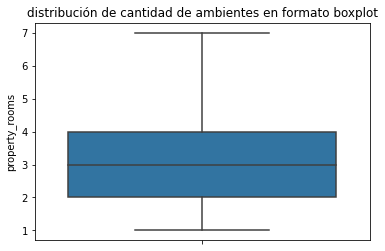

array([2., 3., 4.])

In [39]:
mostrar_medidas_resumen('property_rooms', ylabel="cantidad de ambientes")

##### property_bedrooms

Medidas de resumen para la variable property_bedrooms:
    	Media: 2.007078436397808
    	q1: 1.0
    	Mediana: 2.0
    	q3: 3.0
    	Moda: 0    1.0
dtype: float64


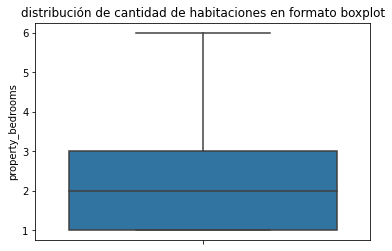

array([1., 2., 3.])

In [40]:
mostrar_medidas_resumen('property_bedrooms', ylabel="cantidad de habitaciones")

#####latitud

Medidas de resumen para la variable latitud:
    	Media: -34.591508944474754
    	q1: -34.6159390106
    	Mediana: -34.5957447
    	q3: -34.5774132
    	Moda: 0   -34.54125
dtype: float64


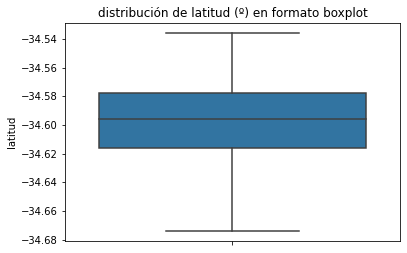

array([-34.61593901, -34.5957447 , -34.5774132 ])

In [41]:
mostrar_medidas_resumen('latitud', ylabel="latitud (º)")

#####longitud

Medidas de resumen para la variable longitud:
    	Media: -58.44975029219221
    	q1: -58.4665226
    	Mediana: -58.4389954
    	q3: -58.4088623
    	Moda: 0   -58.472966
dtype: float64


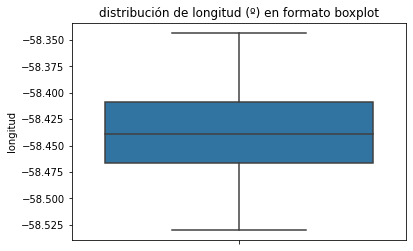

array([-58.4665226, -58.4389954, -58.4088623])

In [42]:
mostrar_medidas_resumen('longitud', ylabel="longitud (º)")

#####property_surface_total

Medidas de resumen para la variable property_surface_total:
    	Media: 108.79670617137917
    	q1: 45.0
    	Mediana: 65.0
    	q3: 105.0
    	Moda: 0    50.0
dtype: float64


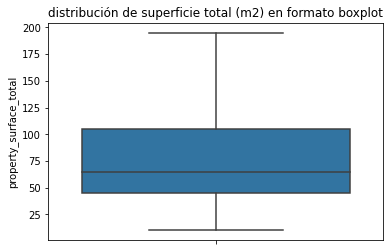

array([ 45.,  65., 105.])

In [43]:
mostrar_medidas_resumen('property_surface_total', ylabel="superficie total (m2)")

#####property_surface_covered

Medidas de resumen para la variable property_surface_covered:
    	Media: 86.82811957872117
    	q1: 40.0
    	Mediana: 58.0
    	q3: 88.0
    	Moda: 0    40.0
dtype: float64


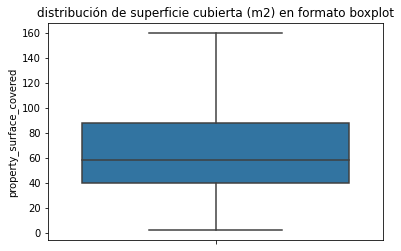

array([40., 58., 88.])

In [44]:
mostrar_medidas_resumen('property_surface_covered', ylabel="superficie cubierta (m2)")

#####property_price

Medidas de resumen para la variable property_price:
    	Media: 225248.98317613796
    	q1: 95000.0
    	Mediana: 143473.5
    	q3: 235000.0
    	Moda: 0    110000.0
dtype: float64


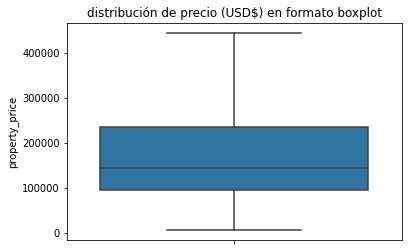

array([ 95000. , 143473.5, 235000. ])

In [45]:
mostrar_medidas_resumen('property_price', ylabel="precio (USD$)")

#### Análisis gráfico de distribuciones

In [46]:
def mostrar_distribuciones_cuantitativas(variable, ds=ds_filtrado, figsize=(5,5), bins=None, binwidth=None, discrete=False, espaciado=4, rotacion=90):
  if binwidth:
    graph = sns.displot(ds, x=variable, discrete=discrete, bins=bins, binwidth=binwidth)
  else:
    graph = sns.displot(ds, x=variable, discrete=discrete, bins=bins)

  graph.fig.set_figheight(figsize[1])
  graph.fig.set_figwidth(figsize[0])
  ax = graph.ax
  mids = [rect.get_x() for rect in ax.patches]
  mids = [item for index, item in enumerate(mids) if index % espaciado == 0]
  ax.set_xticks(mids)
  ax.tick_params(axis='x', rotation=rotacion, labelsize=12)

  mostrar_metadata_grafico(f"distribución de {variable}", ylabel="frecuencia")



Con la ayuda de histogramas analizaremos las distribuciones de las variables cuantitativas de nuestro dataset.

##### start_date

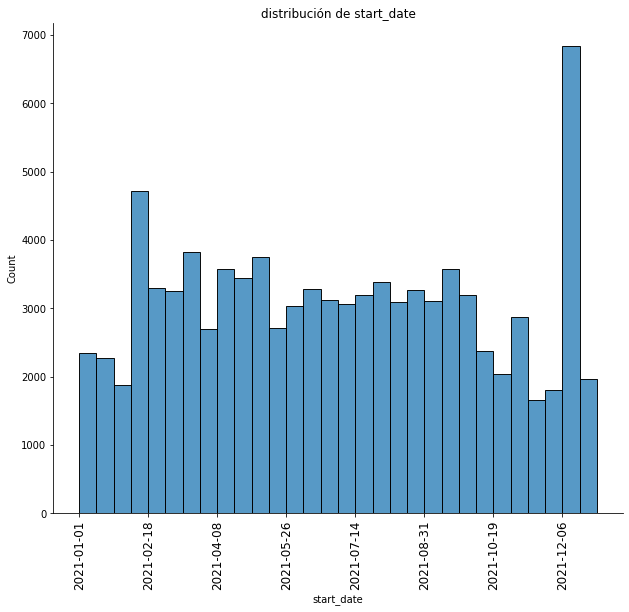

In [47]:
mostrar_distribuciones_cuantitativas("start_date", figsize=(10, 8), bins=30)

##### end_date

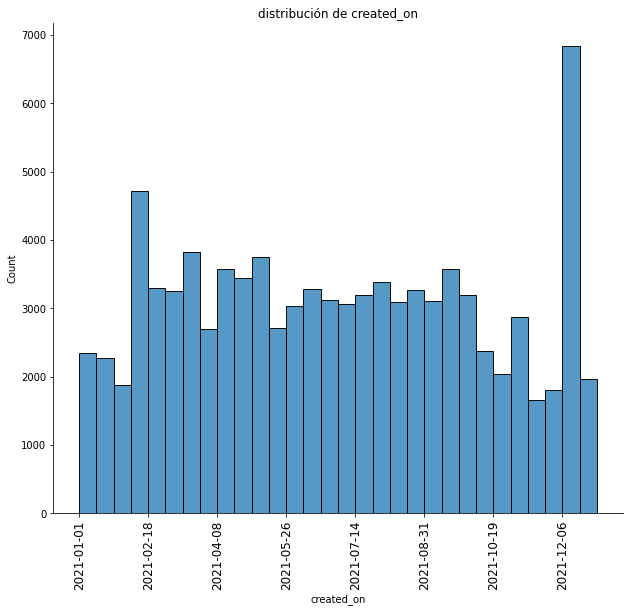

In [48]:
mostrar_distribuciones_cuantitativas("created_on", figsize=(10, 8), bins=30)

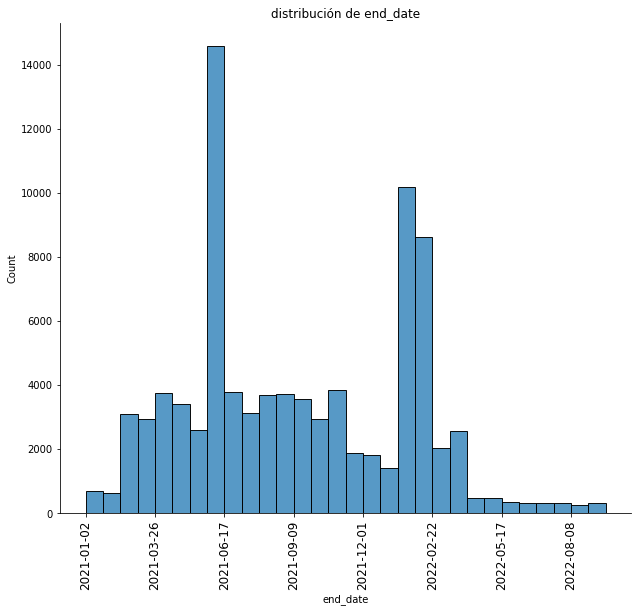

In [49]:
mostrar_distribuciones_cuantitativas("end_date", ds=ds_end_date, figsize=(10, 8), bins=30)

#####created_on

#####property_rooms

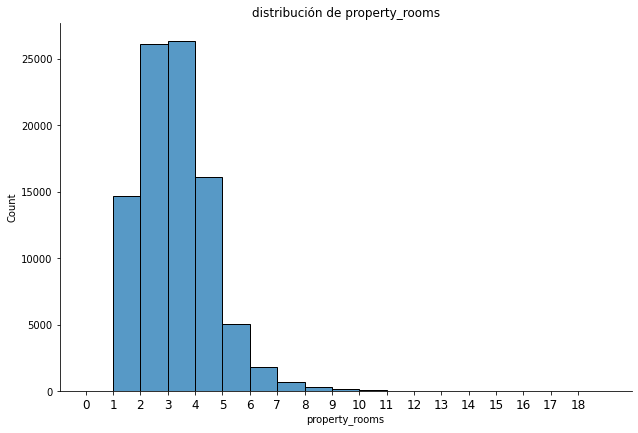

In [50]:
mostrar_distribuciones_cuantitativas("property_rooms", figsize=(10, 6), bins=[*range(20)], espaciado=1, rotacion=0)

#####property_bedrooms

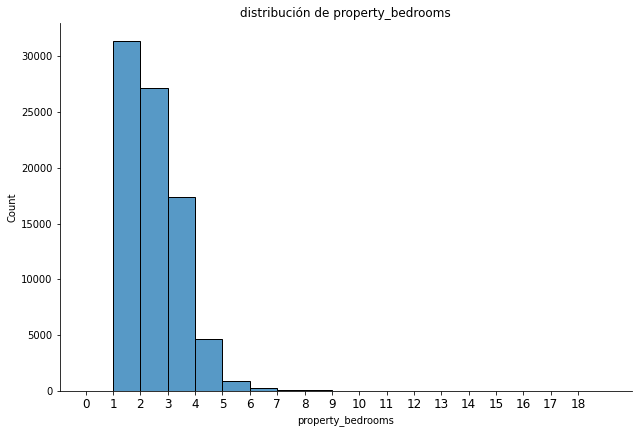

In [51]:
mostrar_distribuciones_cuantitativas("property_bedrooms", figsize=(10, 6), espaciado=1, bins=[*range(20)], rotacion=0)

#####property_surface_total

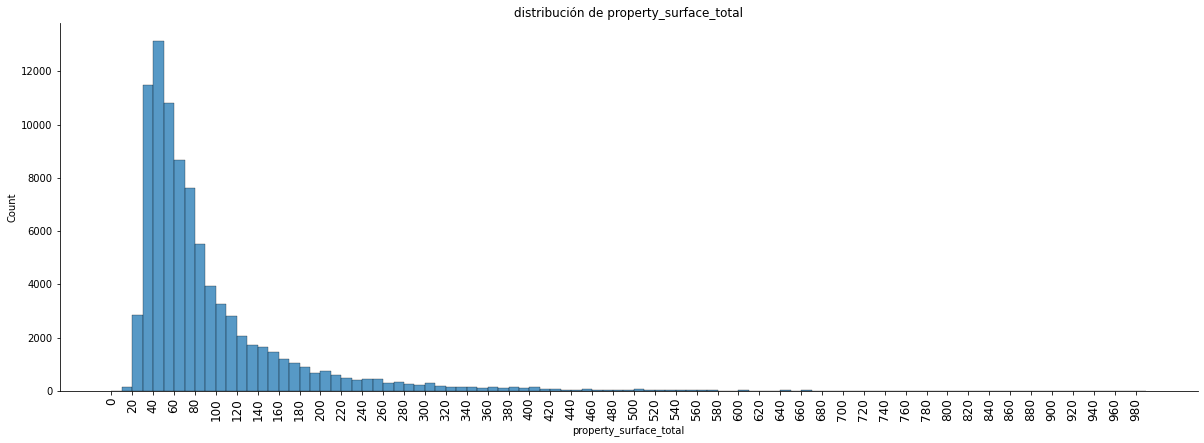

In [52]:
ds_property_surface_total_sin_outliers = ds_filtrado[['property_surface_total']]
ds_property_surface_total_sin_outliers = ds_property_surface_total_sin_outliers[(ds_property_surface_total_sin_outliers.property_surface_total > 0) & (ds_property_surface_total_sin_outliers.property_surface_total < 1000)]
mostrar_distribuciones_cuantitativas("property_surface_total", ds=ds_property_surface_total_sin_outliers, figsize=(20, 6), bins=[*range(0, 1000, 10)], espaciado=2)

#####property_surface_covered

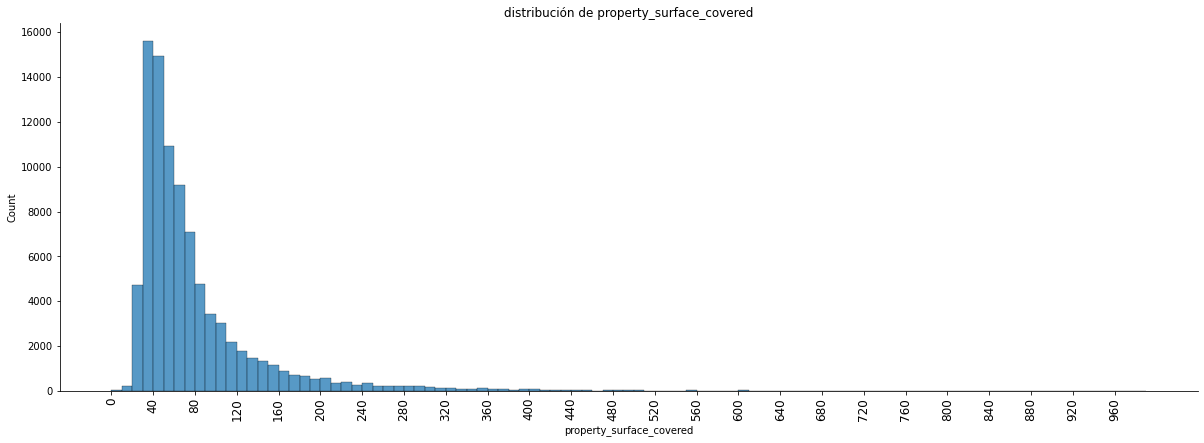

In [53]:
ds_property_surface_covered_sin_outliers = ds_filtrado[['property_surface_covered']]
ds_property_surface_covered_sin_outliers = ds_property_surface_covered_sin_outliers[(ds_property_surface_covered_sin_outliers.property_surface_covered > 0) & (ds_property_surface_covered_sin_outliers.property_surface_covered < 1000)]
mostrar_distribuciones_cuantitativas("property_surface_covered", ds=ds_property_surface_covered_sin_outliers, figsize=(20, 6), bins=[*range(0, 1000, 10)])

#####property_price

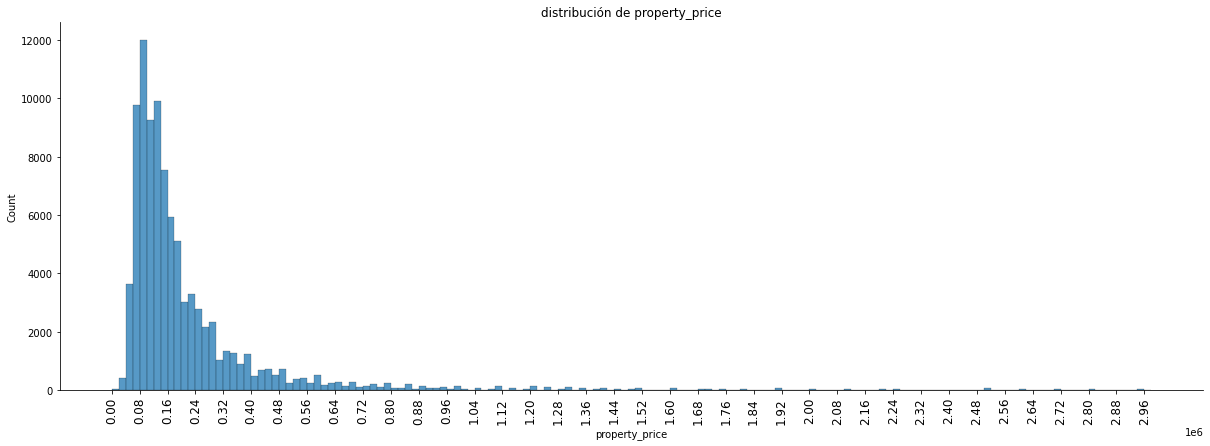

In [54]:
ds_property_price_sin_outliers = ds_filtrado[['property_price']]
ds_property_price_sin_outliers = ds_property_price_sin_outliers[(ds_property_price_sin_outliers.property_price > 0) & (ds_property_price_sin_outliers.property_price < 3000000)]
mostrar_distribuciones_cuantitativas("property_price", ds=ds_property_price_sin_outliers, figsize=(20, 6), bins=[*range(0, 3000000, 20000)], espaciado=4)


#####latitud

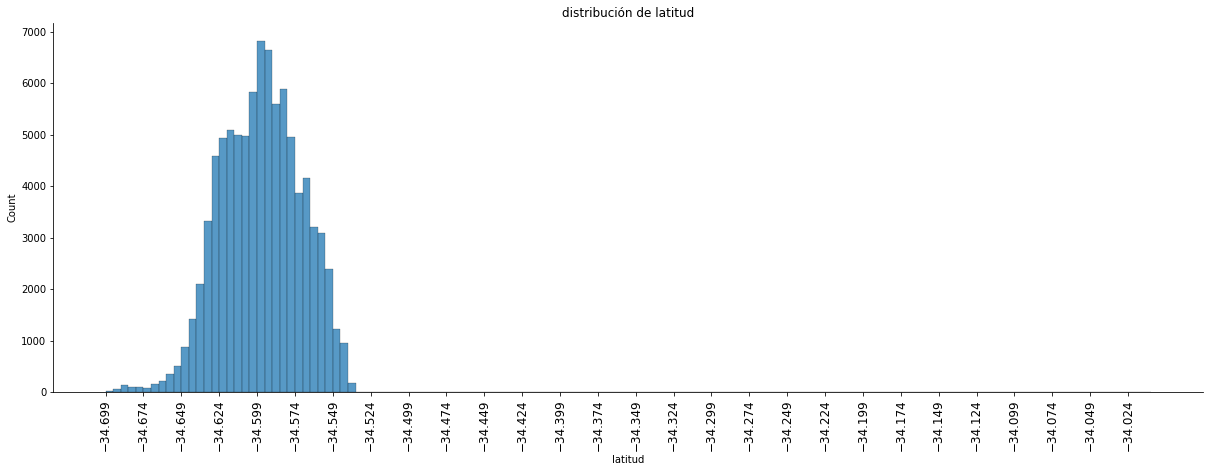

In [55]:
ds_latitud_sin_outliers = ds_filtrado[['latitud']]
ds_latitud_sin_outliers = ds_latitud_sin_outliers[(ds_latitud_sin_outliers.latitud > -38) & (ds_latitud_sin_outliers.latitud < -34)]
mostrar_distribuciones_cuantitativas("latitud", ds=ds_latitud_sin_outliers, figsize=(20, 6), binwidth=0.005, espaciado=5)

#####longitud

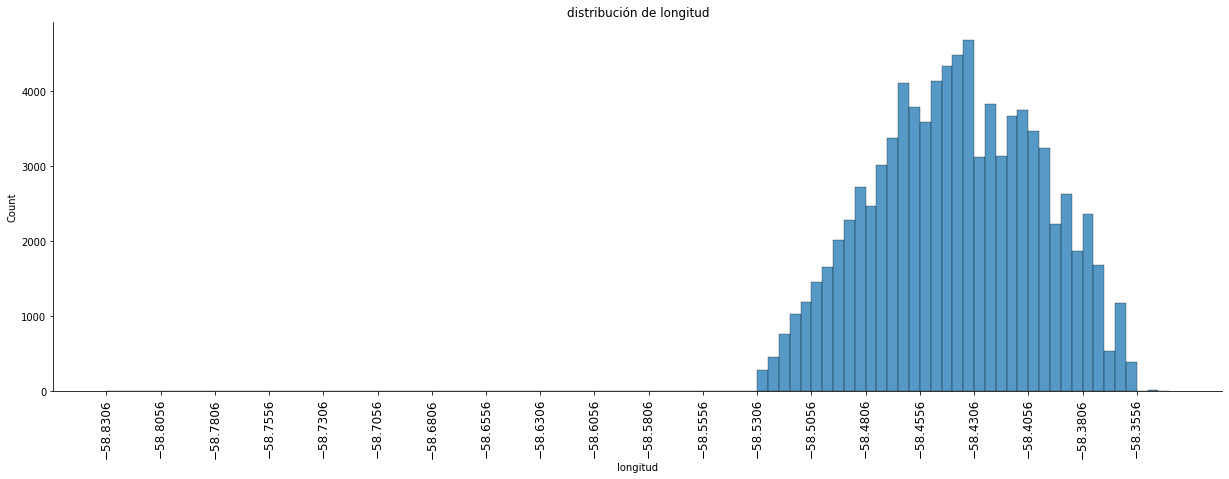

In [56]:
ds_longitud_sin_outliers = ds_filtrado[['longitud']]
ds_longitud_sin_outliers = ds_longitud_sin_outliers[(ds_longitud_sin_outliers.longitud > -59) & (ds_longitud_sin_outliers.longitud < -58)]
mostrar_distribuciones_cuantitativas("longitud", ds=ds_longitud_sin_outliers, espaciado=5, figsize=(20, 6), binwidth=0.005)

##### longitud y latitud en conjunto


Siendo latitud y longitud dos datos que implican ubicacion, decidimos graficarlos sobre un mapa de capital federal para ver como se distribuyen los registros.

In [57]:
import json
import shapely
import requests
import random
from shapely.geometry import shape, Point
from shapely.ops import unary_union
from shapely.ops import unary_union



url='https://drive.google.com/file/d/1eeT_53CFY63d55oZo50F7mOKPTZMW--V/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id

url=requests.get(dwn_url)
data=url.text



data=json.loads(data)


caba_barrios = data
barrios = dict(
    (feature["properties"]["BARRIO"], shape(feature["geometry"])) 
    for feature in caba_barrios["features"]
)

all_barrios = unary_union(barrios.values())




In [58]:
def graficar_puntos_en_caba(longitudes, latitudes, istamano=False, tamano=None, clusters=None, tamano_de_punto=4,  proporcion=1, outsiders=False, graph=True):
  if clusters is not None:
    lat_long = list(zip(longitudes, latitudes, clusters))
  else:
    lat_long = list(zip(longitudes, latitudes))

  long_min, lat_min, long_max, lat_max = all_barrios.bounds

  viridis = cm.get_cmap('viridis', len(barrios) // 4)
  plasma = cm.get_cmap('plasma', len(barrios) // 4)
  inferno = cm.get_cmap('inferno', len(barrios) // 4)
  cividis = cm.get_cmap('cividis', len(barrios) - (len(barrios) // 4) * 3)
  colors = sum((list(x.colors) for x in (viridis, plasma, inferno, cividis)), [])

  random.shuffle(colors)

  if istamano: 
    figsize = tamano
  else: 
    figsize = (15,15)

  f = plt.figure(figsize = figsize)


  for idx, (barrio, shape) in enumerate(barrios.items()):
    for polygon in shape.geoms:
        plt.plot(*polygon.exterior.xy, color=colors[idx])
  
  values=lat_long.copy()
  random.shuffle(values)
  colors_clusters = {0: 'yellow', 1: 'green', 2: 'blue'}

  cont_outsiders=0
  cantidad = int(latitudes.size*proporcion)
  for dot in values[:cantidad]:     
    if(all_barrios.contains(Point(dot))):
       if len(dot) == 2:
          plt.scatter(x=dot[0], y=dot[1], s=tamano_de_punto, c='black')
       else:
          plt.scatter(x=dot[0], y=dot[1], s=tamano_de_punto, color=colors_clusters[dot[2]])
    else: 
      cont_outsiders= cont_outsiders+1
      if outsiders: 
        plt.scatter(x=dot[0], y=dot[1], s=tamano_de_punto, c='red')
 
  if graph: plt.show()
  print("El porcentaje de outsiders dentro de la proporcion pedida de la muestra es:", cont_outsiders/cantidad*100)

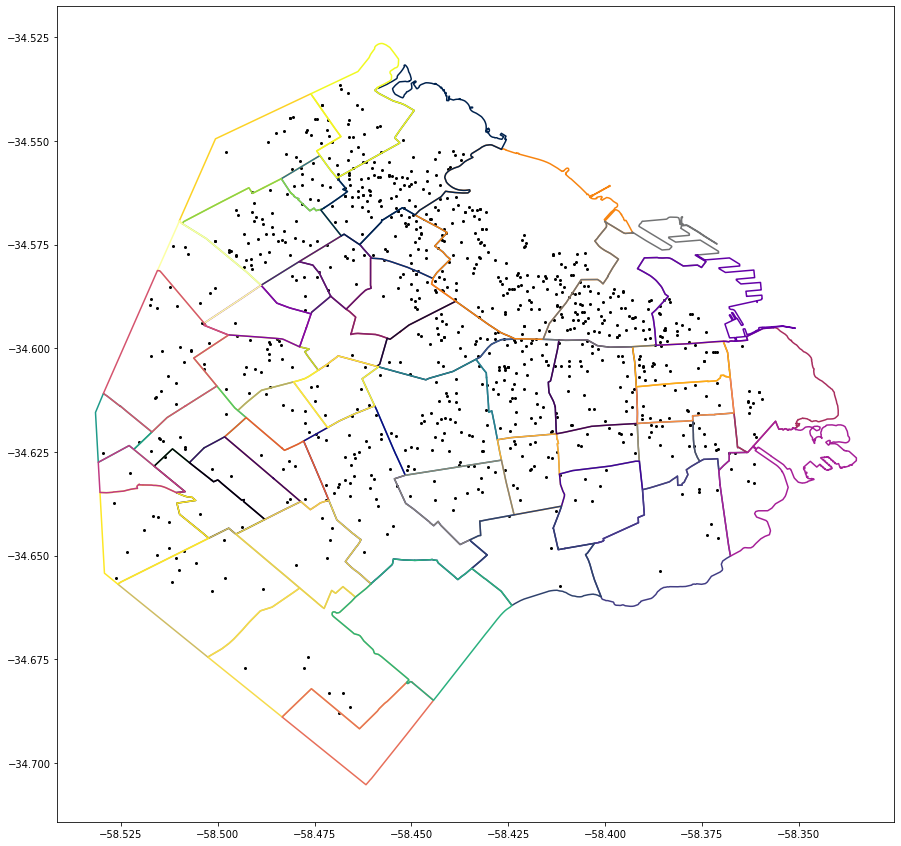

In [59]:
graficar_puntos_en_caba(ds_filtrado.longitud, ds_filtrado.latitud, proporcion=0.01)

Como vemos, los puntos se distribuyen de manera coherente con la realidad, donde hay mas densidad de poblacion en sectores populares. Luego analizaremos los puntos faltantes y outsiders por separado, en la secciones correspondientes.   

### Variables Cualitativas
---


#### Cantidad de valores posibles y frecuencias

A continuacion analizaremos las frecuencias de las variables cualitativas utilizando barplots.

In [60]:
def mostrar_frecuencias(columna, ancho=4, alto=4, df=ds_filtrado):
    frecuencia_por_valor = df.groupby(columna).size().to_frame("frecuencia")
    frecuencia_por_valor = frecuencia_por_valor.sort_values(by="frecuencia", ascending=False).reset_index()
    frecuencia_por_valor.head(40).plot.bar(x=columna, y="frecuencia", figsize=(ancho, alto))
    mostrar_metadata_grafico(f"frecuencias de valores posibles de {columna}", ylabel="frecuencia", xlabel="valores posibles")
    

El porcentaje de outsiders dentro de la proporcion pedida de la muestra es: 3.131749460043196


#####place_l2

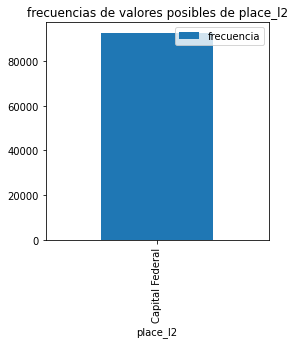

In [61]:
mostrar_frecuencias('place_l2')

#####place_l3

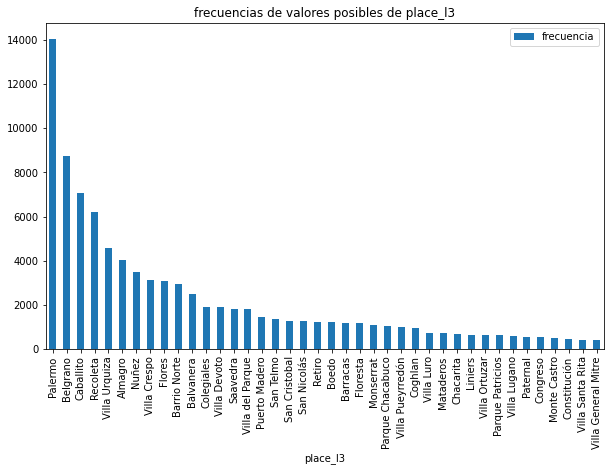

In [62]:
mostrar_frecuencias('place_l3', 10, 6)

#####place_l4

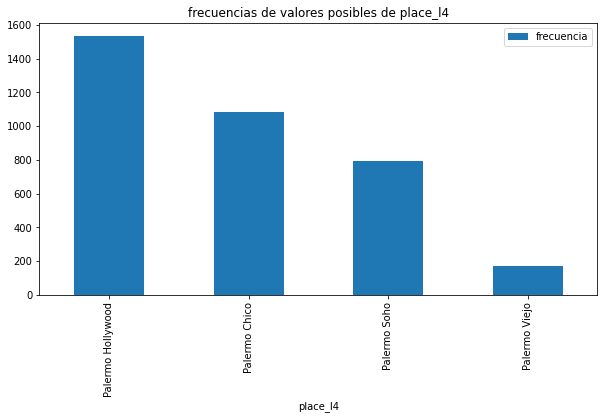

In [63]:
mostrar_frecuencias('place_l4', 10, 5)

#####operation

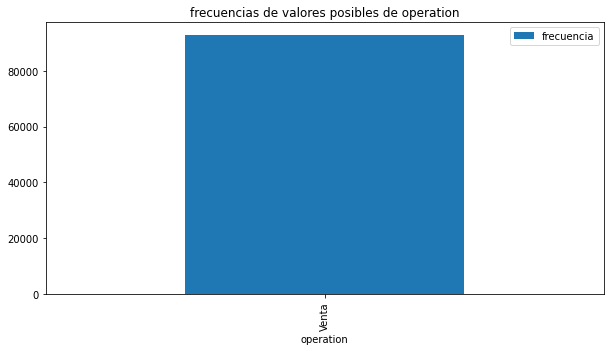

In [64]:
mostrar_frecuencias('operation', 10, 5)

#####property_type

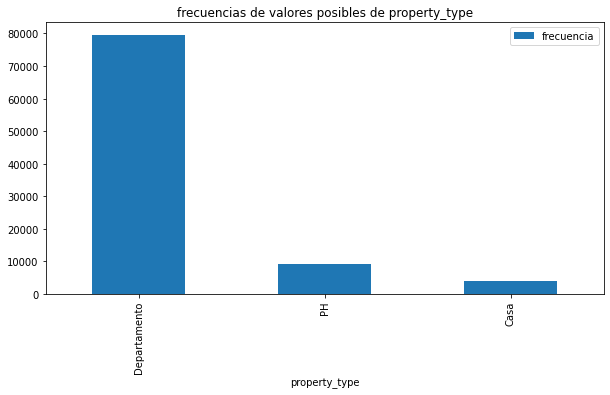

In [65]:
mostrar_frecuencias('property_type', 10, 5)

#####property_currency

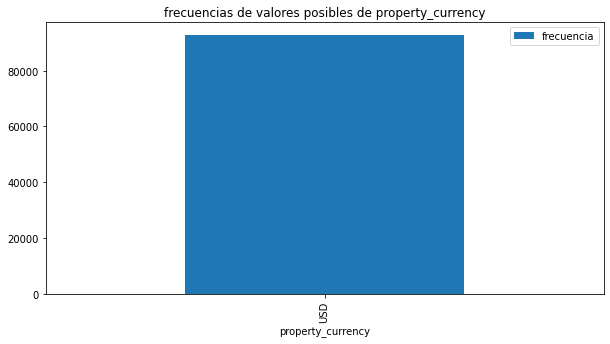

In [66]:
mostrar_frecuencias('property_currency', 10, 5)

## Análisis de Correlaciones existentes entre las variables
---



Eliminamos place_l6 al ser que tratan de elementos de tipo float64, siendo que no son validos como para evaluar correlaciones.

In [67]:
matriz_temp = ds_filtrado.drop(columns=['place_l6'])
matriz_correlacion = matriz_temp.corr()

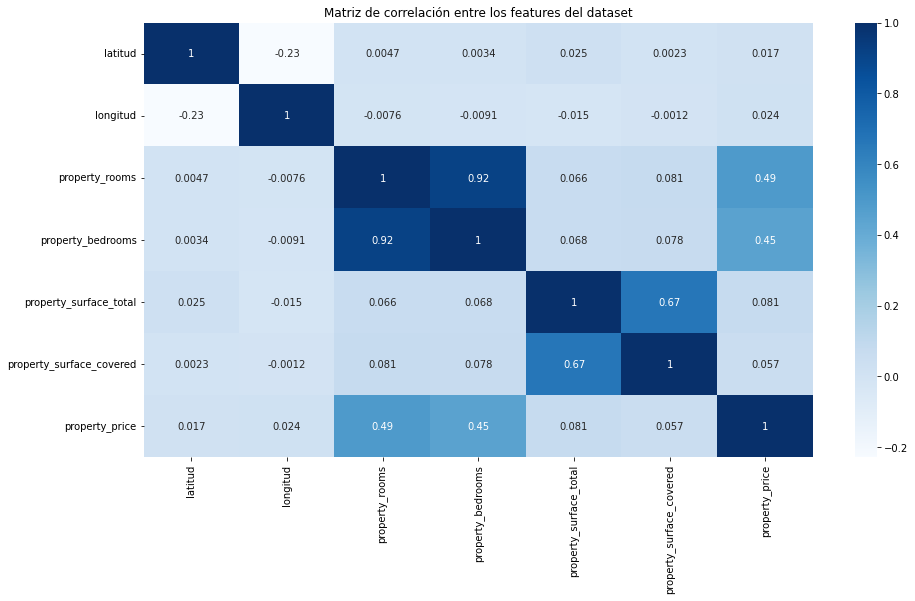

In [68]:
plt.figure(figsize = (15,8))
sns.heatmap(matriz_correlacion, annot = True, cmap='Blues')
mostrar_metadata_grafico("Matriz de correlación entre los features del dataset")

Como observamos del heatmap, hay ciertas variables con una correlación significativa, por ejemplo:

- La cantidad de habitaciones vs la cantidad de ambientes
- Superficie cubierta vs superficie total
- Precio vs cantidad de ambientes y habitaciones 

Estas relaciones tienen sentido, dado que uno esperaría que a medida aumenta la cantidad de ambientes (y/o cuartos), la propiedad sea mas cara. También tiene mucho sentido que a mas superficie total, se puede tener mas superficie cubierta.

Lo que nos sorprende es que el precio de la propiedad parece tener una correlación muy débil con la superficie total y cubierta, lo cual nos asombra puesto que uno esperaría que a medida que aumentan los m^2 de la propiedad, aumenta su precio. 

## Separacion del dataset para train y test

A continuacion haremos la separacion de los los conjuntos de entrenamiento y test. 

In [69]:
from sklearn.model_selection import train_test_split

#Creo un dataset con los features que voy a usar para clasificar
ds_filtrado_x = ds_filtrado.copy()
#Creo un dataset con la variable target
ds_filtrado_y = ds_filtrado['property_price'].copy()

#Genero los conjuntos de train y de test
x_train, x_test, y_train, y_test = train_test_split(ds_filtrado_x,
                                                    ds_filtrado_y,
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=2) #semilla

In [70]:
print(f"Cantidad de registros en dataset de entrenamiento: {x_train.shape[0]}")
print(f"Cantidad de registros en dataset de testeo: {x_test.shape[0]}")

Cantidad de registros en dataset de entrenamiento: 64866
Cantidad de registros en dataset de testeo: 27800


In [71]:
def para_x_train_x_test_realizar(accion, nombre_accion=None):
  if nombre_accion:
    print(f"Realizando {nombre_accion} sobre x_train:")
  accion(x_train)
  if nombre_accion:
    print(f"Realizando {nombre_accion} sobre x_test:")
  accion(x_test)


## Datos Faltantes
---


Tanto el análisis y la imputación/eliminación de datos faltantes se harán con los modelos de train y test. A partir de estos, sacaremos conclusiones. 

### Análisis de datos faltantes a nivel columna

In [72]:
def nulos_x_test_vs_nulos_x_train_columnas(size=(18,8), axis=0):
  filas_totales_test = x_test.shape[0]
  filas_totales_train = x_train.shape[0]

  plotdata = pd.DataFrame({
    "x_test":x_test.isna().sum(axis=axis)/filas_totales_test*100,
    "x_train":x_train.isna().sum(axis=axis)/filas_totales_train*100,
    }, 
  )

  plotdata.plot(kind="bar", figsize=size);
  mostrar_metadata_grafico("nulos en x_test vs nulos en x_train a nivel columna")

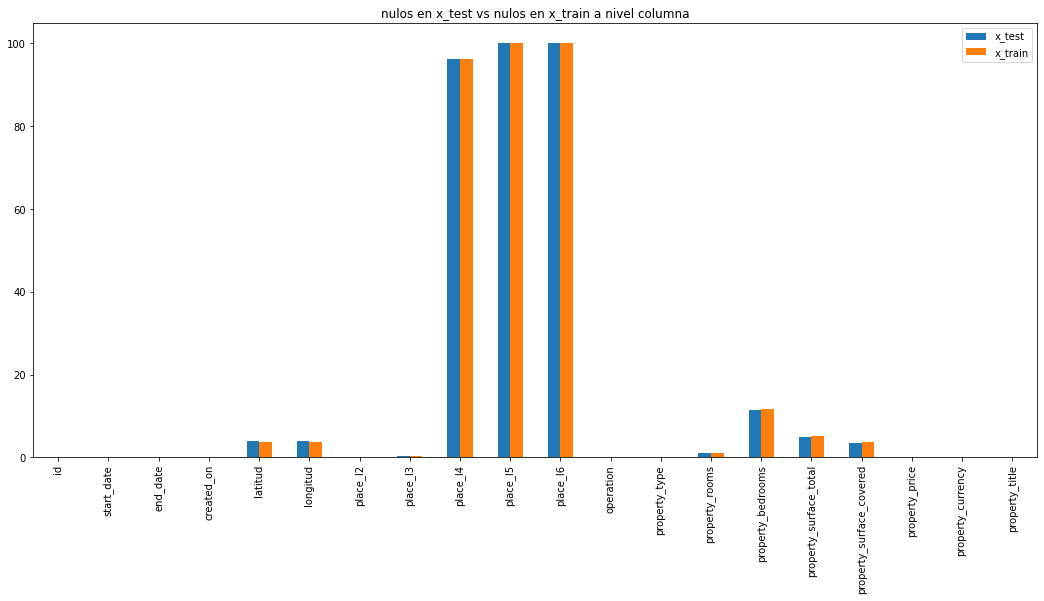

In [73]:
nulos_x_test_vs_nulos_x_train_columnas()

En principio, se observa que las proporciones de valores faltantes se mantienen en ambos sets (test y train). 

Por otro lado, observamos que place l4 está conformado mayormente por valores vacíos, mientras que l5 y l6 están completamente vacíos. Luego tenemos varias columnas con todos sus valores, y algunas otras con un porcentaje de valores faltantes relativamente bajo.

### Análisis de datos faltantes a nivel fila

In [74]:
def nulos_x_test_vs_nulos_x_train_filas(size=(18,8)):
  filas_totales_test = x_test.shape[0]
  filas_totales_train = x_train.shape[0]

  plotdata = pd.DataFrame({
    "x_test":x_test.isna().sum(axis=1).value_counts()/filas_totales_test*100,
    "x_train":x_train.isna().sum(axis=1).value_counts()/filas_totales_train*100,
    }, 
  )

  plotdata.plot(kind="bar", figsize=size);
  mostrar_metadata_grafico("nulos en x_test vs nulos en x_train a nivel fila")

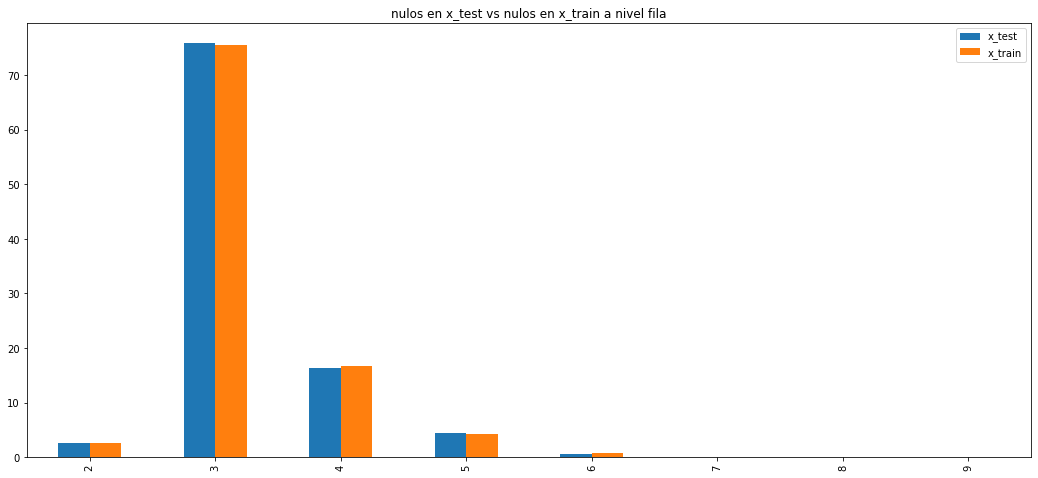

In [75]:
nulos_x_test_vs_nulos_x_train_filas()

En principio, se observa que las proporciones de valores faltantes se mantienen en ambos sets (test y train).

Ademas podemos observar que contamos con una amplia cantidad de filas con 3 datos faltantes. Se observan pocas filas con mas de 6 datos faltantes, por lo que podemos asumir por ahora que la gran mayoría de nuestro data set nos brinda al menos mas del 85% de información en cada registro. 

### Reparaciones de Datos Faltantes


Se observa que las columnas en las que se encuentran datos faltantes son en latitud, longitud, place_l3, place_l4, place_l5, place_l6, property_rooms, property_bedrooms, property_surface_total, y  property_surface_covered.
En esta seccion analizaremos como manejar estos casos especiales. 

Comenzaremos por la clasificacion de datos faltantes. 

* Missing completly at random:

    No existe relacion entre la falta de datos y la variable donde se encuentra el dato faltante.

* Missing not at random:

    La falta esta asociada a la naturaleza de la variable. Depende precisamente de los mismos datos que recolectamos. 


* Missing at random: 

    La falta no depende de los mismos datos faltantes, sino de otras variables. 


####Eliminacion de datos faltantes

#####place_l5 y place_l6

Se observa que place_l5 y place_l6 son datos faltantes de tipo MCAR ya que consideramos que la razon de falta de datos es ajena a los datos mismos. Faltan datos en todos los registros, por lo que no se puede hacer ninguna relacion entre estos datos y otras columnas. 

In [76]:
para_x_train_x_test_realizar(lambda x: print('Porcentaje de nans en place_l5', x['place_l5'].isna().sum()/x.shape[0]*100), "% de nans en place_l5")
para_x_train_x_test_realizar(lambda x: print('Porcentaje de nans en place_l6', x['place_l6'].isna().sum()/x.shape[0]*100), "% de nans en place_l6")


Realizando % de nans en place_l5 sobre x_train:
Porcentaje de nans en place_l5 100.0
Realizando % de nans en place_l5 sobre x_test:
Porcentaje de nans en place_l5 100.0
Realizando % de nans en place_l6 sobre x_train:
Porcentaje de nans en place_l6 100.0
Realizando % de nans en place_l6 sobre x_test:
Porcentaje de nans en place_l6 100.0


Dado que en el porcentaje de datos faltantes se muestra una falta completa de los datos, decimos eliminarlos en ambos sets.

In [77]:
para_x_train_x_test_realizar(lambda x: x.drop('place_l5', axis='columns', inplace=True))
para_x_train_x_test_realizar(lambda x: x.drop('place_l6', axis='columns', inplace=True))

#####place_l4

In [78]:
print(f"\nValores posibles de place_l4:\n {ds.place_l4.unique()}\n\n")
print("Cantidad de registros en cada valor de place_l4:\n" )
print(ds_filtrado.place_l4.value_counts().to_frame().to_markdown()) 


Valores posibles de place_l4:
 [nan 'Palermo Chico' 'Palermo Soho' 'Palermo Viejo' 'Palermo Hollywood']


Cantidad de registros en cada valor de place_l4:

|                   |   place_l4 |
|:------------------|-----------:|
| Palermo Hollywood |       1534 |
| Palermo Chico     |       1084 |
| Palermo Soho      |        796 |
| Palermo Viejo     |        169 |


Se visualiza que place_l4 solo presenta datos sobre secciones dentro del barrio de Palermo. Si se enlistan los valores posibles en esta variable se aprecia el hecho de que los unicos valores son nan o secciones de Palermo. Por lo que se llega a la conclusion de que los datos faltantes podrian estar relacionados a que dichas celdas no presenten lugares de Palermo. En este caso, se abre la posibilidad de contar con que la variable place_l4 puede contar con datos del tipo MNAR (Missing not at random).  

Filtrando el data set con la columna place_l3, compararemos los registros totales con la cantidad que no tenga placel4. Lo hacemos asi para poder ver en que barrio se encuentran los registros que tienen placel4 faltante. 

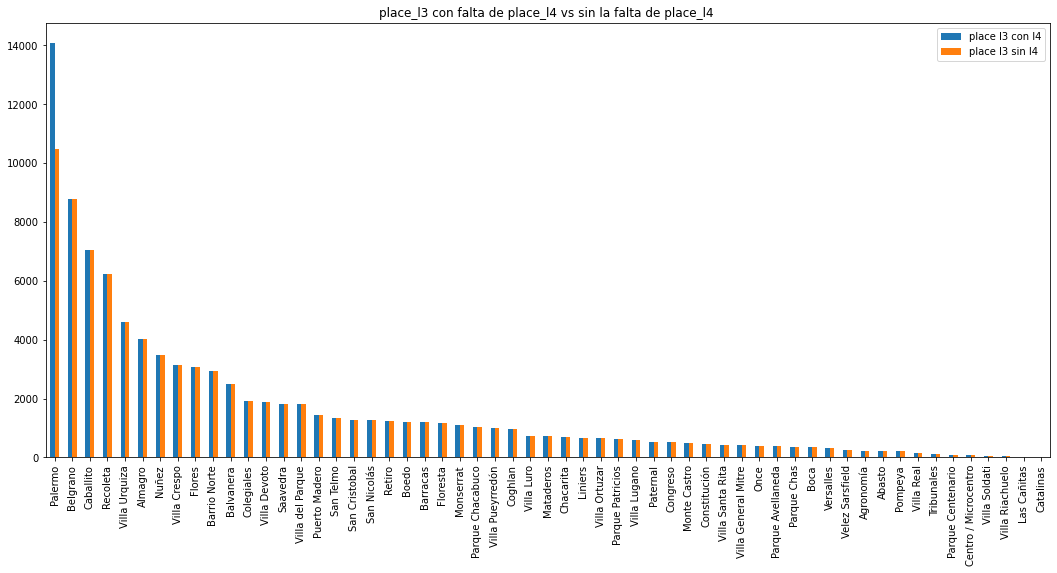

In [79]:
temp = ds_filtrado[ds_filtrado.place_l4.isna()]

plotdata = pd.DataFrame({
    "place l3 con l4":ds_filtrado.place_l3.value_counts(),
    "place l3 sin l4":temp.place_l3.value_counts(),
    }, 
)
plotdata.plot(kind="bar", figsize=(18,8))
plt.title("place_l3 con falta de place_l4 vs sin la falta de place_l4 ")
plt.xlabel = "Place_l3"


Se observa gráficamente que solo en Palermo vemos mas registros que tengan placel4 a comparacion de no tenerlo. Concluimos entonces que para que se tenga un valor no nan en place_l4, place_l3 tiene que ser Palermo. 

Dado que vemos que aunque place_l3 sea palermo hay un gran procentaje donde falta place_l4, el hecho de que place_l3 sea Palermo es una condición necesaria pero no suficiente para observar place_l4 no nan.


In [80]:
ds_filtrado[ds_filtrado['place_l4'].notna()].place_l3.value_counts()

Palermo    3583
Name: place_l3, dtype: int64

Verificamos que los unicos registros que cuentan con place_l4 son registros de Palermo. 

Habiendo verificado que todas estan en palermo podemos tomar la decision de que la columna no nos aporta informacion relevante para el dominio de nuestro problema, por lo tanto la eliminamos en ambos sets. 

In [81]:
para_x_train_x_test_realizar(lambda x: x.drop('place_l4', axis='columns', inplace=True))

##### latitud y longitud

Analizaremos estos dos datos juntos dado que tienen una relación lógica de expresas ubicacion.

Primero analizamos si los registros que tienen nan en latitud son los mismos que tienen nan en longitud (y viceversa).

In [82]:
def mostrar_cant_nans_long_lat(x):
  cond_longitud_nan = x['longitud'].isna()
  cond_latitud_nan = x['latitud'].isna()
  print(f'\tCantidad de nan en longitud: {x[cond_longitud_nan].shape[0]} == Cantidad de nan en latitud: {x[cond_latitud_nan].shape[0]}')
  print('\tCantidad de registros donde hay nan en ambos casos: ',x[cond_longitud_nan & cond_latitud_nan].shape[0])
para_x_train_x_test_realizar(mostrar_cant_nans_long_lat, "cantidad de nans lat y lang")


Realizando cantidad de nans lat y lang sobre x_train:
	Cantidad de nan en longitud: 2472 == Cantidad de nan en latitud: 2472
	Cantidad de registros donde hay nan en ambos casos:  2472
Realizando cantidad de nans lat y lang sobre x_test:
	Cantidad de nan en longitud: 1113 == Cantidad de nan en latitud: 1113
	Cantidad de registros donde hay nan en ambos casos:  1113


Observamos que, en ambos sets, los registros que tienen alguno de los dos datos faltantes, también tiene su par faltante. Con lo cual, tiene sentido analizarlos juntos. 

Ahora analizaremos si los registros con estos datos faltantes corresponden a un barrio en específico, o si tienen alguna relación con la columna de barrio en general. En este caso no dividimos entre train y test siendo que consideramos que la caracteristica de relacionarse con ambas columnas deberia mostrarse en el data set general, en caso de no mostrarse, es innecesario analizarlo por cada data set en especifico. 

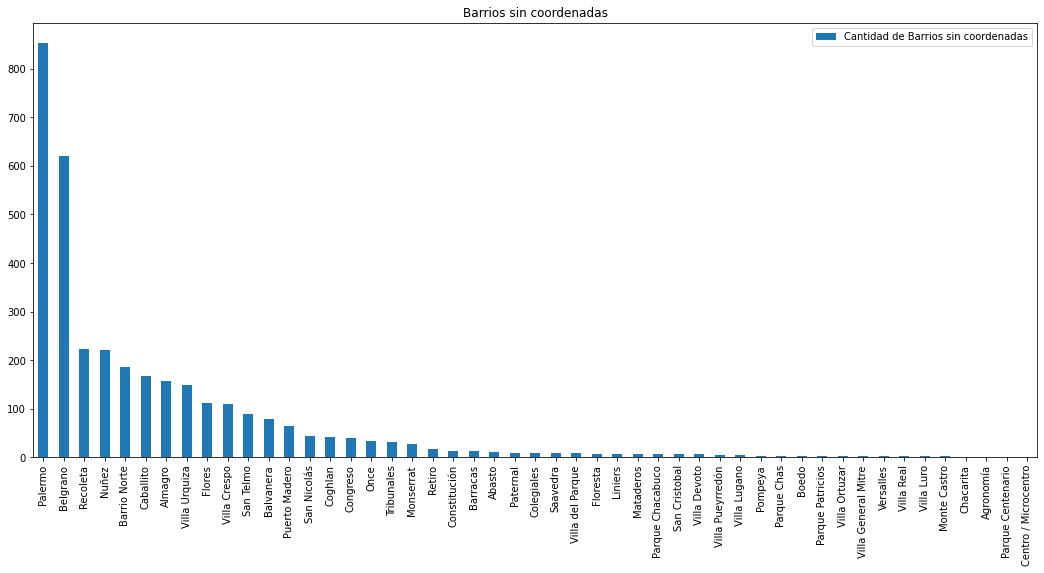

In [83]:
cond_longitud_nan_total = ds_filtrado['longitud'].isna()
cond_latitud_nan_total = ds_filtrado['latitud'].isna()

registros_sin_coord = ds_filtrado[cond_longitud_nan_total & cond_latitud_nan_total]

plotdata = pd.DataFrame({
    "Cantidad de Barrios sin coordenadas": registros_sin_coord.place_l3.value_counts()}
) 
plotdata.plot(kind="bar", figsize=(18,8))
plt.title("Barrios sin coordenadas")
plt.xlabel = "Place_l3"

Observamos que los datos estan bastante distribuidos con respecto al barrio, no encontramos relacion entre los datos faltantes y algun barrio en especifico. 

Consideramos los datos de barrio, latitud y longitud relevantes para saber la ubicacion de la propiedad. 

Buscamos ahora cuantos registros no tienen ningún valor respecto a la ubicación:

In [84]:
def registros_sin_ubi(x):
  cond_barrio_nan = x['place_l3'].isna()
  cond_longitud_nan = x['longitud'].isna()
  cond_latitud_nan = x['latitud'].isna()

  registros_sin_ubi = x[cond_longitud_nan & cond_latitud_nan & cond_barrio_nan]
  print(f"\tPorcentaje de registros sin ninguna referencia sobre la ubicacion: {registros_sin_ubi.shape[0]*100/x.shape[0]}%")

para_x_train_x_test_realizar(registros_sin_ubi, "Porcentajes de registros sin info sobre ubicacion")

Realizando Porcentajes de registros sin info sobre ubicacion sobre x_train:
	Porcentaje de registros sin ninguna referencia sobre la ubicacion: 0.16495544661301761%
Realizando Porcentajes de registros sin info sobre ubicacion sobre x_test:
	Porcentaje de registros sin ninguna referencia sobre la ubicacion: 0.17985611510791366%


Tendría sentido remover estos registros dado que no hay variables con una relación suficientemente fuerte para poder predecir la ubicación a partir de los otros datos. Ademas consideramos que las proporciones son suficientemente bajas como para tomar la decision de eliminarlos. 

In [85]:
def drop_registros_sin_ubi(x):
  cond_barrio_nan = x['place_l3'].isna()
  cond_longitud_nan = x['longitud'].isna()
  cond_latitud_nan = x['latitud'].isna()

  registros_sin_ubi = x[cond_longitud_nan & cond_latitud_nan & cond_barrio_nan]
  x.drop(registros_sin_ubi.index, inplace=True)

In [86]:
para_x_train_x_test_realizar(drop_registros_sin_ubi)

A pesar de haber eliminado parte de los datos faltantes de estas variables, continuaremos con el tratamiento de los restantes en la seccion de imputacion.

##### start_date, end_date, created_on

Teniendo en cuenta el objetivo del TP, queremos predecir el valor de la propiedad *hoy en día*, en base a ciertas features como la zona, la superficie, etc, que son las de mayor relevancia. 

Consideramos que las fechas no nos aportan mucho en nuestro analisis porque no buscamos saber el precio de una propiedad en un determinado año específico. Siendo el rango de fechas encontradas bastante corto, no consideramos que las fechas sean relevantes. 

In [87]:
def drop_dates(x):
  x.drop('start_date', axis='columns', inplace=True)
  x.drop('end_date', axis='columns', inplace=True)
  x.drop('created_on', axis='columns', inplace=True)

para_x_train_x_test_realizar(drop_dates)

#### Imputacion de datos faltantes

#####property_bedrooms


Dado a que la correlacion entre property_bedrooms y property_rooms nos termino resultando bastante alta, buscaremos la cantidad de casos en los que tengamos registros en donde falten ambas variables, ya que no habria forma de obtener ambos datos con precision de una sin la otra debido a su alta correlacion.

In [88]:
def registros_sin_datos_de_rooms(x):
  cond_habitaciones_nan = x['property_bedrooms'].isna()
  cond_ambientes_nan = x['property_rooms'].isna()
  registros_sin_rooms_ni_bedrooms = x[cond_habitaciones_nan & cond_ambientes_nan]
  print(f"\tPorcentaje de registros sin datos tanto en rooms como en bedrooms: {registros_sin_rooms_ni_bedrooms.shape[0]*100/x.shape[0]}%")

para_x_train_x_test_realizar(registros_sin_datos_de_rooms, "Porcentaje de registros sin datos de rooms")

Realizando Porcentaje de registros sin datos de rooms sobre x_train:
	Porcentaje de registros sin datos tanto en rooms como en bedrooms: 0.45553513797310025%
Realizando Porcentaje de registros sin datos de rooms sobre x_test:
	Porcentaje de registros sin datos tanto en rooms como en bedrooms: 0.44324324324324327%


Procedemos a eliminar estos registros.

In [89]:
def drop_registros_sin_datos_de_rooms(x):
  cond_habitaciones_nan = x['property_bedrooms'].isna()
  cond_ambientes_nan = x['property_rooms'].isna()
  registros_sin_rooms_ni_bedrooms = x[cond_habitaciones_nan & cond_ambientes_nan]
  x.drop(registros_sin_rooms_ni_bedrooms.index, inplace=True)

para_x_train_x_test_realizar(drop_registros_sin_datos_de_rooms)

Analizaremos los registros filtrados por property rooms, buscando comparar estos con la cantidad de los mismos con bedrooms faltantes tanto en train como test.  

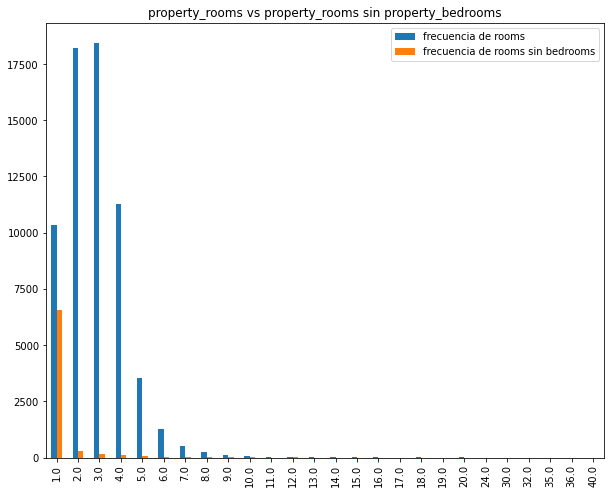

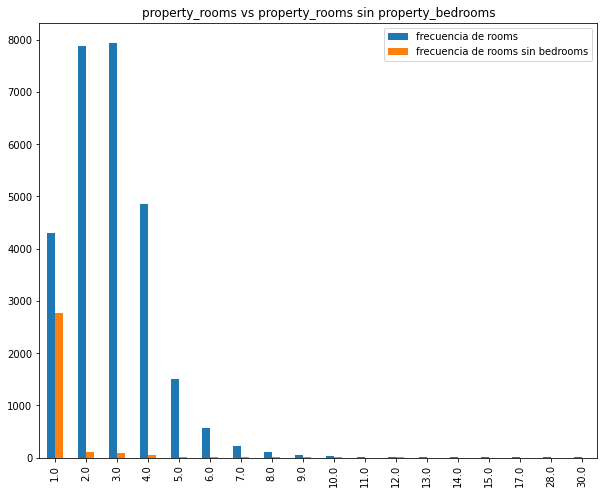

In [90]:
def property_bedrooms_vs_property_rooms(x):
  temp_sin_bedrooms = x[x.property_bedrooms.isna()]

  plotdata = pd.DataFrame({
      "frecuencia de rooms":x.property_rooms.value_counts(),
      "frecuencia de rooms sin bedrooms":temp_sin_bedrooms.property_rooms.value_counts(),
      }, 
  )

  plotdata.plot(kind="bar", figsize=(10,8))
  plt.title("property_rooms vs property_rooms sin property_bedrooms")

para_x_train_x_test_realizar(property_bedrooms_vs_property_rooms)

De ambos graficos se puede analizar que, tanto en el set de train como en el de test, en la vasta mayoria de los casos donde falta el dato sobre la cantidad de habitaciones es mayoritariamente en el caso de que se trate de monoambientes.

In [91]:
print('Cantidad de bedrooms en monoambientes de train:\n', x_train[(x_train['property_rooms']==1)].property_bedrooms.value_counts())
print('Cantidad de bedrooms en monoambientes de test:\n',x_test[(x_test['property_rooms']==1)].property_bedrooms.value_counts())

Cantidad de bedrooms en monoambientes de train:
 1.0    3776
Name: property_bedrooms, dtype: int64
Cantidad de bedrooms en monoambientes de test:
 1.0    1535
Name: property_bedrooms, dtype: int64


Dado que tener más de 1 habitación en un monoambiente es incoherente, y que la vasta mayoría de los monoambientes que no tienen dato faltante en propert_bedrooms tienen su valor en 1, reemplazamos lo registros monoambientes faltantes con 1 (asumiendo el supuesto de que las propiedades analizadas son hogares). 

Para los casos donde no son monoambientes, cuando predigamos la cantidad de habitaciones, reemplazaremos los 0's por 1's de igual manera mediante el mismo razonamiento. 

A continuacion se muestra el porcentaje total de nulos en property_bedrooms en ambos sets.

In [92]:
print('Porcentajes de nulos en property_bedrooms en ambos sets:')
print(f"\tTrain: {x_train['property_bedrooms'].isna().sum()/x_train.shape[0]*100}%")
print(f"\tTest: {x_test['property_bedrooms'].isna().sum()/x_test.shape[0]*100}%")

Porcentajes de nulos en property_bedrooms en ambos sets:
	Train: 11.190742119632663%
	Test: 11.007347884316069%


Analizamos el porcetaje de monoambientes que hay dentro de los registros en donde falta property_bedrooms.

In [93]:
print('Porcentajes de nulos en property_bedrooms en casos de monoambientes ambos sets:')
print(f"\tTrain: {x_train[x_train['property_rooms']==1 & x_train['property_bedrooms'].isna()].shape[0]/x_train.shape[0]*100}%")
print(f"\tTest: {x_train[x_train['property_rooms']==1 & x_train['property_bedrooms'].isna()].shape[0]/x_train.shape[0]*100}%")

Porcentajes de nulos en property_bedrooms en casos de monoambientes ambos sets:
	Train: 10.17932489451477%
	Test: 10.17932489451477%


Observamos que casi la totalidad de faltas en property_bedrooms se da en los casos de monoambientes. Siendo de 11% la proporcion de faltas en property_bedrooms dentro de la totalidad, y de 10% la proporcion de registros, dentro de la totalidad, que son monoambientes con falta de bedrooms. 

Viendo que la mayoria de los faltantes en bedrooms se dan en monoambientes, tomaremos los datos faltantes de bedrooms como un MAR. 

Por lo tanto, para ambos sets, decidimos colocar 1 en los bedroom faltantes de casos de monoambientes, considerando que el ambiente es un cuarto. Mas adelante trataremos los casos de bedrooms faltantes que poseen mas de un ambiente con imputaciones. 

In [94]:
columnas = ['property_rooms','property_bedrooms']

def imputar_bedrooms_en_monoambientes(x):
  cond_monoambiente = x['property_rooms']==1
  cond_bedroom_nan = x['property_bedrooms'].isna()
  x.loc[cond_monoambiente & cond_bedroom_nan, 'property_bedrooms'] = 1

para_x_train_x_test_realizar(imputar_bedrooms_en_monoambientes)

In [95]:
print(f"Porcentaje de faltantes en bedrooms, despues de imputar los monoambientes en train: \n\t{x_train[x_train.property_bedrooms.isna()].shape[0]/x_train.shape[0]*100}%")
print(f"Porcentaje de faltantes en bedrooms, despues de imputar los monoambientes en test: \n\t{x_test[x_test.property_bedrooms.isna()].shape[0]/x_test.shape[0]*100}%")

Porcentaje de faltantes en bedrooms, despues de imputar los monoambientes en train: 
	1.0114172251178952%
Porcentaje de faltantes en bedrooms, despues de imputar los monoambientes en test: 
	0.9990226951894885%


Una vez tratados los casos de monoambientes en los sets de entrenamiento y testo, procedemos a imputar los valores en los casos de mas ambientes. 

Para los casos donde se tiene mas de un ambiente, siendo valores faltantes de tipo MAR, decidimos acorde aplicar el imputador iterativo. 

In [96]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

def imputar_bedrooms_en_rooms_no_monoambientes(x):
  columnas=['property_surface_total','property_surface_covered','property_bedrooms','property_rooms']
  df_eliminar_nans_en_bedrooms_y_rooms = x[columnas].copy()
  lr = LinearRegression()
  imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=20, verbose=0, random_state=2) #imputation_order='roman'
  array_sin_nans_en_bedrooms_y_rooms = imp.fit_transform(df_eliminar_nans_en_bedrooms_y_rooms)
  ds_sin_nans_en_bedrooms_y = pd.DataFrame(array_sin_nans_en_bedrooms_y_rooms, columns = columnas) #imp.fit_transfor devuelve un arrar sin nans en las columnas
  ds_sin_nans_en_bedrooms_y = ds_sin_nans_en_bedrooms_y.round(0)
  x.loc[:,"property_bedrooms"].replace(to_replace=[x['property_bedrooms']],value=[ds_sin_nans_en_bedrooms_y['property_bedrooms']],inplace=True)
  


In [97]:
def imputar_bedrooms(x):
  x_antes_reemplazo = x.copy()
  imputar_bedrooms_en_rooms_no_monoambientes(x)
  plotdata = pd.DataFrame({
      "frecuencia de bedrooms sin imputacion":x_antes_reemplazo.property_bedrooms.value_counts(),
      "frecuencia de bedrooms con imputacion":x.property_bedrooms.value_counts(),
      }, 
  )


  plotdata.plot(kind="bar", figsize=(18,8))
  mostrar_metadata_grafico("distribución de bedrooms por rooms con nans vs sin nans", xlabel="rooms", ylabel="bedrooms")


Realizando imputacion de bedrooms sobre x_train:


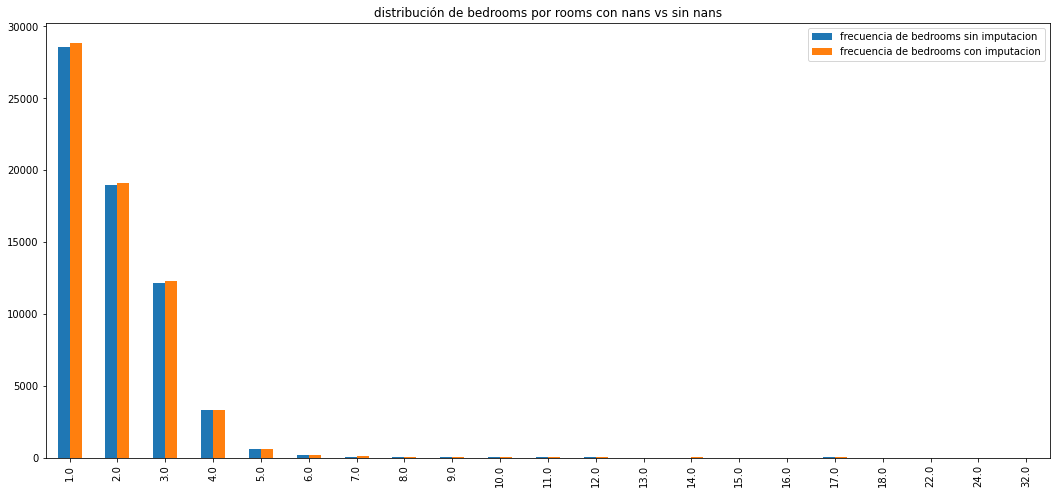

Realizando imputacion de bedrooms sobre x_test:


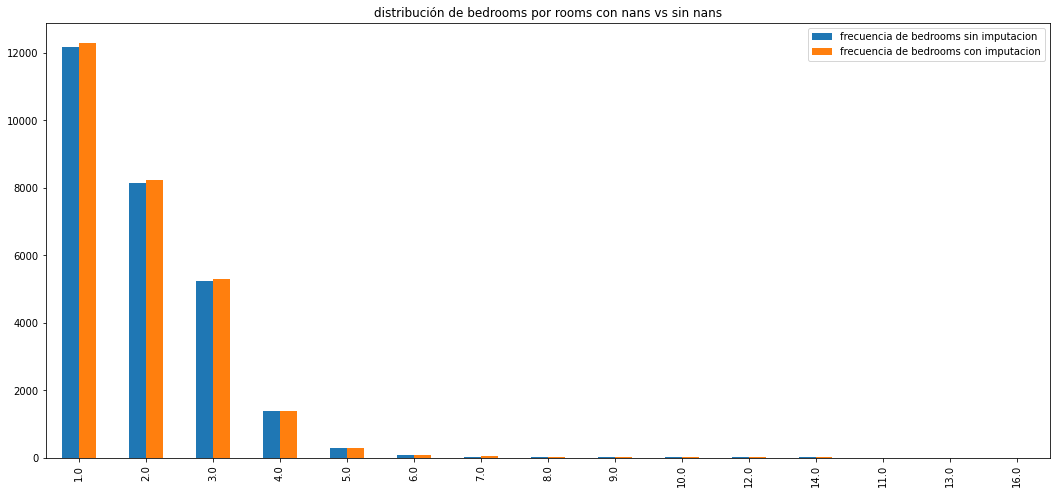

In [98]:
para_x_train_x_test_realizar(imputar_bedrooms, "imputacion de bedrooms")

Como vemos las distribuciones se mantienen, lo cual es un buen indicio de que la imputación fue exitosa al respetar la distribucion previa.

##### Latitud y Longitud

Primero identificamos a todos los puntos de latitud o langitud fuera del mapa:


In [99]:
x_train_backup = x_train.copy()

In [100]:
x_train = x_train_backup.copy()

In [101]:
all_barrios.bounds[0]

-58.531518740591004

In [102]:
min_lat = all_barrios.bounds[1]
max_lat = all_barrios.bounds[3]
min_long = all_barrios.bounds[0]
max_long = all_barrios.bounds[2]

print("Límites de caba")
print(f"Latitud minima: ", min_lat)
print(f"Latitud maxima: ", max_lat)
print(f"Longitud minima: ", min_long)
print(f"Longitud maxima: ", min_long)
print(f" ")

def cantidad_puntos_fuera_caba(x):
  cond_not_na = x.latitud.notna() & x.longitud.notna()
  cond_coord_invalida = ~((x['latitud'] < max_lat) & (x['latitud'] > min_lat) & (x['longitud'] < max_long) & (x['longitud'] > min_long))
  x_invalid_coords = x[cond_coord_invalida & cond_not_na]

  print("\tCantidad de puntos fuera de caba en coordeandas:", len(x_invalid_coords.index))

para_x_train_x_test_realizar(cantidad_puntos_fuera_caba, "conteo de cantidad de puntos fuera de caba")

Límites de caba
Latitud minima:  -34.70529313515961
Latitud maxima:  -34.52648945161265
Longitud minima:  -58.531518740591004
Longitud maxima:  -58.531518740591004
 
Realizando conteo de cantidad de puntos fuera de caba sobre x_train:
	Cantidad de puntos fuera de caba en coordeandas: 133
Realizando conteo de cantidad de puntos fuera de caba sobre x_test:
	Cantidad de puntos fuera de caba en coordeandas: 58


Hay 133 registros que contienen coordenadas fuera de CABA, como son muy pocos los removemos del dataset.

In [103]:
def drop_invalid_coords(x):
  cond_not_na = x.latitud.notna() & x.longitud.notna()
  cond_coord_invalida = ~((x['latitud'] < max_lat) & (x['latitud'] > min_lat) & (x['longitud'] < max_long) & (x['longitud'] > min_long))
  x.drop(x.loc[(cond_coord_invalida & cond_not_na)].index, inplace=True)


In [104]:
para_x_train_x_test_realizar(drop_invalid_coords)

Analizaremos la cantidad de registros sin latitud y longitud. Recordamos que eliminamos los registros que no contenien ningun tipo de datos sobre la ubicacion, por lo tanto si bien estos registros no tienen sus coordenadas, si contienen los datos sobre su respectivo barrio. 


In [105]:
def cantidad_registros_sin_coordenadas(x):
  x_train_invalid_coords = x[x.latitud.isna() & x.longitud.isna()] 
  print(f"\tCantidad de registros sin coordenadas: {len(x_train_invalid_coords)}")

para_x_train_x_test_realizar(cantidad_registros_sin_coordenadas, "conteo de registros sin coordenadas")

Realizando conteo de registros sin coordenadas sobre x_train:
	Cantidad de registros sin coordenadas: 2326
Realizando conteo de registros sin coordenadas sobre x_test:
	Cantidad de registros sin coordenadas: 1045


Dado que es una cantidad considerable, reemplazaremos los nans en latitud y longitud por imputación utilizando la media de latitud y longitud de el barrio respectivo a cada registro.

In [106]:
#Con train
def imputar_coordenadas_por_promedio(x):
  for barrio in x.place_l3[x.place_l3.notna()].unique():
    registros_de_barrio = x.query('place_l3 == @barrio')
    latitud_promedio = registros_de_barrio.latitud.mean()
    longitud_promedio = registros_de_barrio.longitud.mean()
    registros_de_barrio_sin_coord = registros_de_barrio[registros_de_barrio.latitud.isna() & registros_de_barrio.longitud.isna()]
    x.loc[registros_de_barrio_sin_coord.index, ['latitud']] = latitud_promedio
    x.loc[registros_de_barrio_sin_coord.index, ['longitud']]  = longitud_promedio


para_x_train_x_test_realizar(imputar_coordenadas_por_promedio)

Como vemos ya reemplazamos todos los nan de la latitud y longitud de ambos sets. Graficaremos los puntos obtenidos a continuacion, tener en cuenta que no graficamos toda la cantidad, sino que una proporcion.

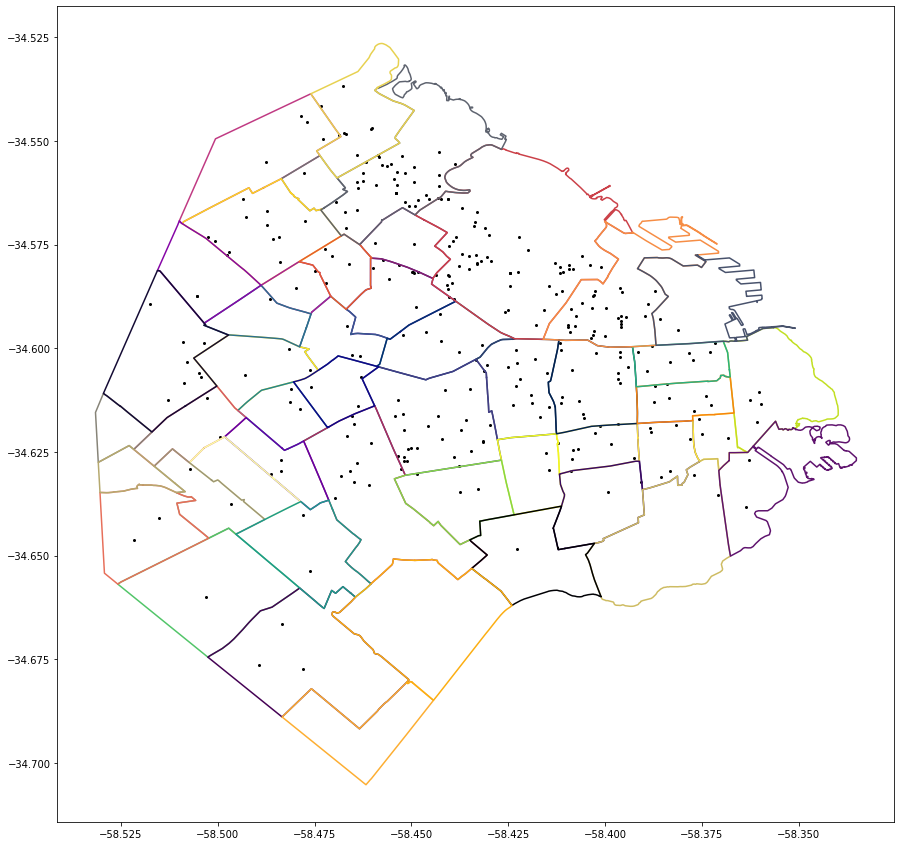

El porcentaje de outsiders dentro de la proporcion pedida de la muestra es: 0.0


In [107]:
graficar_puntos_en_caba(x_train.longitud, x_train.latitud, proporcion=0.005)

#####place_l3

Analizamos la cantidad de registros con nan en place_l3.

In [108]:
print("Cantidad de registros place_l3 nulos en train:", x_train.place_l3.isna().sum())
print("Cantidad de registros place_l3 nulos en test:", x_test.place_l3.isna().sum())

Cantidad de registros place_l3 nulos en train: 30
Cantidad de registros place_l3 nulos en test: 15


Como son una cantidad despreciable a comparacion del dataset entero, decidimos eliminarlos.


In [109]:
def drop_nan_place_l3(x):
  cond = x.place_l3.isna()
  x.drop(x.loc[cond].index, inplace=True)


In [110]:
para_x_train_x_test_realizar(drop_nan_place_l3)

#####property_rooms

Calculamos el porcentaje de valores faltantes de property_rooms en ambos sets.

In [111]:
print(f"Porcentaje de valores faltantes de property_rooms en train: {x_train['property_rooms'].isna().sum()*100/x_train.shape[0]}%")
print(f"Porcentaje de valores faltantes de property_rooms en test: {x_test['property_rooms'].isna().sum()*100/x_test.shape[0]}%")

Porcentaje de valores faltantes de property_rooms en train: 0.5505357614967108%
Porcentaje de valores faltantes de property_rooms en test: 0.5988241271684692%


Debido a la fuerte correlacion observada en la matriz de correlaciones, entre esta variable con property_bedrooms, decidimos utilizar esa columna para el entrenamiento de un metodo de regresion lineal para llenar los datos nan de property_rooms. 

Como venimos haciendo, el analisis lo replicaremos tanto en el set de entrenamiento como en el de testeo. 



In [112]:
# Guardamos un auxiliar de las dos columnas a tratar
ds_aux_train = x_train[['property_rooms', 'property_bedrooms']].copy()
ds_aux_train = ds_aux_train.query('property_rooms  > 0')

ds_aux_test = x_test[['property_rooms', 'property_bedrooms']].copy()
ds_aux_test = ds_aux_test.query('property_rooms  > 0')

Comenzamos con el entrenamiento de

In [113]:
modelo_lineal_rooms = LinearRegression()

#Doy el formato adecuado a las variables dependiente e independiente
bedrooms=ds_aux_train['property_bedrooms'].values.reshape(-1, 1)
rooms=ds_aux_train['property_rooms'].values.reshape(-1, 1)

#Ajusto el modelo
modelo_lineal_rooms.fit(bedrooms, rooms)

#Coeficientes Estimados
intercepcion=round(modelo_lineal_rooms.intercept_[0],2)
coef_bedroom=round(modelo_lineal_rooms.coef_[0][0],2)

#Muestro el modelo
print(f" El modelo lineal simple ajustado es: rooms = {coef_bedroom} * bedrooms  + {intercepcion}")

 El modelo lineal simple ajustado es: rooms = 1.24 * bedrooms  + 0.47


In [114]:
rooms_estim_segun_bedrooms= coef_bedroom * bedrooms + intercepcion
ds_aux_train['rooms_estimadas_bedrooms']= coef_bedroom * bedrooms + intercepcion #Lo agregamos en el dataframe

Siendo que las variables de room son de tipo entera, debemos redondear los resultados.

In [115]:
ds_aux_train = ds_aux_train.round(0) #los resultados deben ser numeros enteros

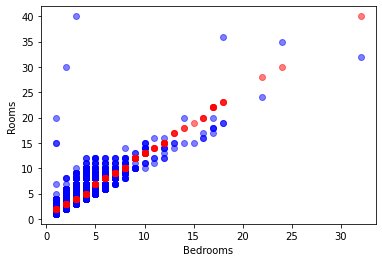

In [116]:
plt=reload(plt)
plt.xlabel("Bedrooms")
plt.ylabel("Rooms")
plt.scatter(x_train['property_bedrooms'],x_train['property_rooms'],color='blue',alpha=0.5)
plt.scatter(ds_aux_train['property_bedrooms'],ds_aux_train['rooms_estimadas_bedrooms'], color='red',alpha=0.5)

Observamos graficamente los valores obtenidos con el modelo, y comparamos los mismos con los puntos ya existentes en el dataset.

In [117]:
ds_antes_de_imputar = x_train.copy()

#ahora calculo los valores de las rooms en base a las bedrooms
bedrooms_con_rooms_nan = x_train[x_train['property_rooms'].isna()]['property_bedrooms']
bedrooms_con_rooms_nan = bedrooms_con_rooms_nan.values.reshape(-1, 1)

#print(bedrooms_con_rooms_nan)
rooms_estimadas_segun_bedrooms = modelo_lineal_rooms.predict(bedrooms_con_rooms_nan) #prediccion de valores
rooms_estimadas_segun_bedrooms = rooms_estimadas_segun_bedrooms.round(0)

ds_antes_de_imputar.loc[ds_antes_de_imputar['property_rooms'].isnull(), 'property_rooms'] = rooms_estimadas_segun_bedrooms

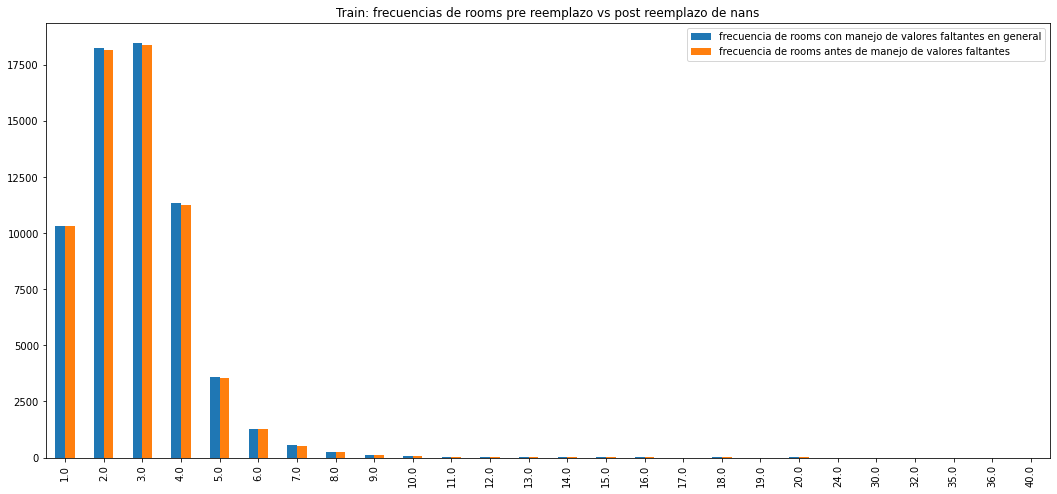

In [118]:
plotdata = pd.DataFrame({
    "frecuencia de rooms con manejo de valores faltantes en general":ds_antes_de_imputar['property_rooms'].value_counts(),
    "frecuencia de rooms antes de manejo de valores faltantes":x_train['property_rooms'].value_counts(),
    }, 
)

plotdata.plot(kind="bar", figsize=(18,8))
plt.title("Train: frecuencias de rooms pre reemplazo vs post reemplazo de nans")
plt.xlabel = "property_rooms"

Vemos como se mantiene la frecuencia relativa antes y despues de imputar. Procedemos a efectivamente llenar los nan dentro del data set de train.

In [119]:
# remplazo de columna property_rooms
x_train.loc[:,"property_rooms"].replace(to_replace=[x_train['property_rooms']],value=[ds_antes_de_imputar['property_rooms']],inplace=True)

Repetimos el proceso con el set de test, utilizando el modelo entrenado con el set de train. 

In [120]:
ds_antes_de_imputar = x_test.copy()

#ahora calculo los valores de las rooms en base a las bedrooms
bedrooms_con_rooms_nan = x_test[x_test['property_rooms'].isna()]['property_bedrooms']
bedrooms_con_rooms_nan = bedrooms_con_rooms_nan.values.reshape(-1, 1)

rooms_estimadas_segun_bedrooms = modelo_lineal_rooms.predict(bedrooms_con_rooms_nan) #prediccion de valores
rooms_estimadas_segun_bedrooms = rooms_estimadas_segun_bedrooms.round(0)

ds_antes_de_imputar.loc[ds_antes_de_imputar['property_rooms'].isnull(), 'property_rooms'] = rooms_estimadas_segun_bedrooms

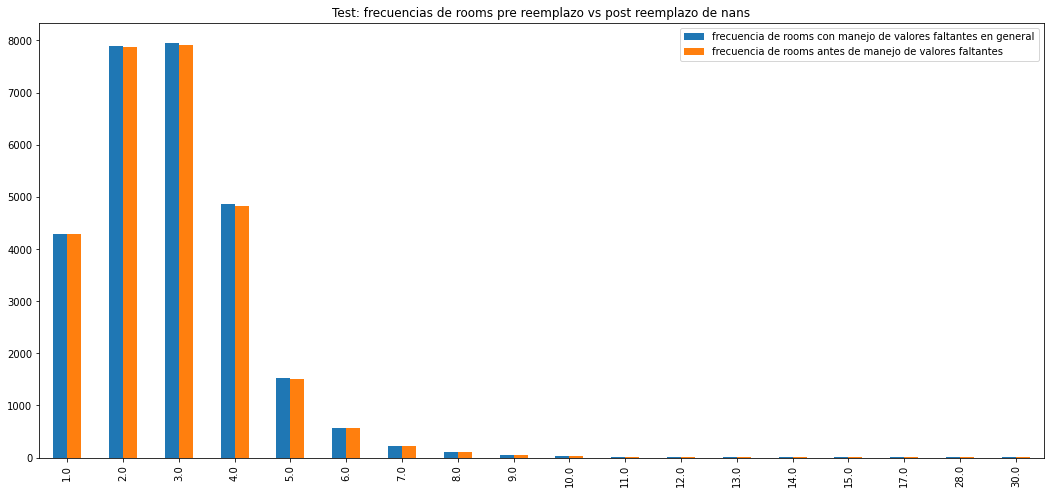

In [121]:
plotdata = pd.DataFrame({
    "frecuencia de rooms con manejo de valores faltantes en general":ds_antes_de_imputar['property_rooms'].value_counts(),
    "frecuencia de rooms antes de manejo de valores faltantes":x_test['property_rooms'].value_counts(),
    }, 
)

plotdata.plot(kind="bar", figsize=(18,8))
plt.title("Test: frecuencias de rooms pre reemplazo vs post reemplazo de nans")
plt.xlabel = "property_rooms"

In [122]:
# remplazo de columna property_rooms
x_test.loc[:,"property_rooms"].replace(to_replace=[x_test['property_rooms']],value=[ds_antes_de_imputar['property_rooms']],inplace=True)

#####property_surface_total

Analizamos la proporcion de registros con property_surface_total faltante. 

In [123]:
print(f"Porcentaje de registros son property_surface_total: {x_train.property_surface_total.isna().sum()/x_train.shape[0]*100}%")

Porcentaje de registros son property_surface_total: 5.0496881852537285%


Dado que property_surface_total y property_surface_covered tienen una alta correlacion, analizamos los casos en los cuales ambas variables tiene valores nan.

In [124]:
cond_superficie_total_nan = ds_filtrado['property_surface_total'].isna()
cond_superfice_cubierta_nan = ds_filtrado['property_surface_covered'].isna()
registros_sin_superficie_cubierta_ni_total = ds_filtrado[cond_superficie_total_nan & cond_superfice_cubierta_nan]
print(f"Cantidad de registros sin informacion en superficie total ni cubierta: {registros_sin_superficie_cubierta_ni_total.shape[0]}")

Cantidad de registros sin informacion en superficie total ni cubierta: 0


Como ningun registro tiene ambas variables con valor en nan, no eliminamos ningun registro. 

Comenzamos el proceso de imputacion de valores en la columna de surface_total utilizando un modelo de regresion lineal, utilizando los datos de surface_covered. Siguiendo la logica utilizada para imputar las rooms. Utilizamos la alta correlacion observada.

Comenzamos entrenando el modelo utilizando el set de entrenamiento.

In [125]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

columnas=['property_surface_total','property_surface_covered','property_rooms']
df_eliminar_nans_en_sup_total_y_cubierta = x_train[columnas].copy()

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=20, verbose=0, random_state=2) #imputation_order='roman'
array_sin_nans_en_sup_total_y_cubierta = imp.fit_transform(df_eliminar_nans_en_sup_total_y_cubierta)

In [126]:
ds_sin_nans_en_sup_total_y_cubierta = pd.DataFrame(array_sin_nans_en_sup_total_y_cubierta, columns = columnas) #imp.fit_transfor devuelve un arrar sin nans en las columnas

In [127]:
print(f"Cantidad de registros con property_surface_total: {x_train.query('property_surface_total > 250').shape[0]}")

Cantidad de registros con property_surface_total: 2852


Decidimos acotar los valores de los registros property_surface_total dado que observamos que con valores mayores a 250 la cantidad de regitros era minima y no se apreciaba completamente el grafico.  

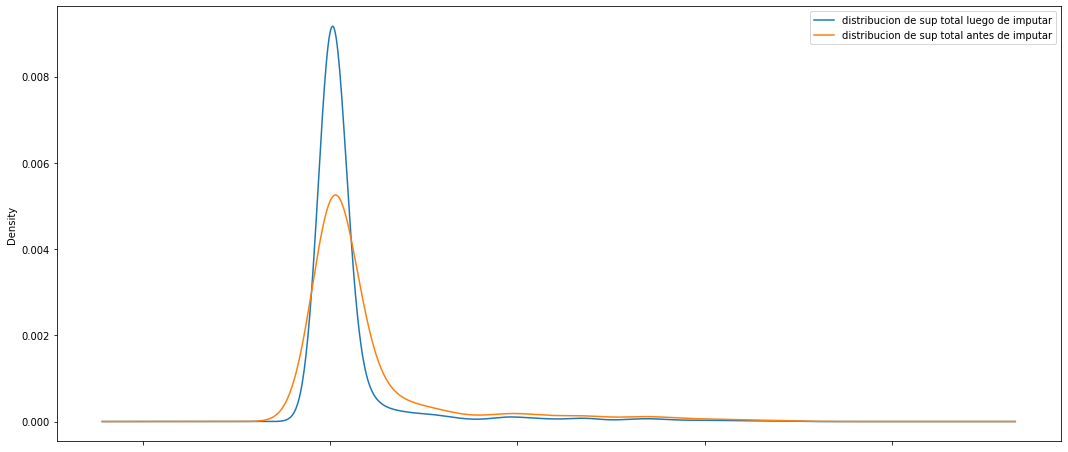

In [128]:
#acotamos los valores para poder visualizar mejor el grafico
ds_sin_nans_acotado = ds_sin_nans_en_sup_total_y_cubierta.query('property_surface_total < 250')
x_train_acotado = x_train.query('property_surface_total < 250')

plotdata = pd.DataFrame({
   "distribucion de sup total luego de imputar":ds_sin_nans_en_sup_total_y_cubierta.property_surface_total.value_counts(),
   "distribucion de sup total antes de imputar":x_train.property_surface_total.value_counts(),
    }, 
)

plot_ = plotdata.plot(kind="kde",  figsize=(18,8))

for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 30 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)


Viendo un mantenimiento en la distribucion antes y depsues de imputar los datos en los datasets auxiliares, procedemos a imputarlos en los datasets reales.

In [129]:
x_train.loc[:,"property_surface_total"].replace(to_replace=[x_train['property_surface_total']],value=[ds_sin_nans_en_sup_total_y_cubierta['property_surface_total']],inplace=True)

Realizaremos el mismo procedimiento para el set de testeo. Predeciremos utilizando el modelo entrenado con el set de training.

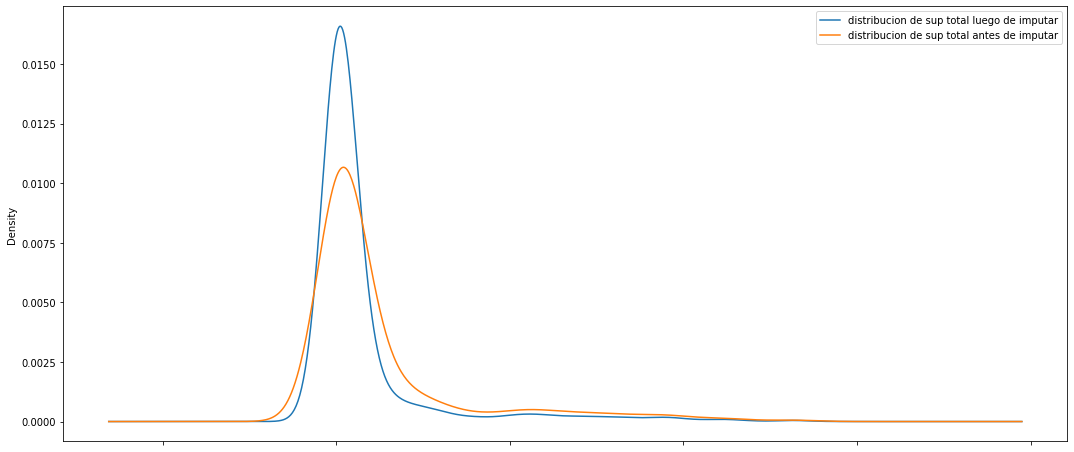

In [130]:
columnas=['property_surface_total','property_surface_covered','property_rooms']
df_eliminar_nans_en_sup_total_y_cubierta_test = x_test[columnas].copy()


array_sin_nans_en_sup_total_y_cubierta_test = imp.transform(df_eliminar_nans_en_sup_total_y_cubierta_test)
ds_sin_nans_en_sup_total_y_cubierta_test = pd.DataFrame(array_sin_nans_en_sup_total_y_cubierta_test, columns = columnas) 


#acotamos los valores para poder visualizar mejor el grafico
x_test_acotado = x_test.query('property_surface_total < 250')

plotdata = pd.DataFrame({
   "distribucion de sup total luego de imputar":ds_sin_nans_en_sup_total_y_cubierta_test.property_surface_total.value_counts(),
   "distribucion de sup total antes de imputar":x_test.property_surface_total.value_counts(),
    }, 
)

plot_ = plotdata.plot(kind="kde",  figsize=(18,8))

for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 30 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)


In [131]:
x_test.loc[:,"property_surface_total"].replace(to_replace=[x_test['property_surface_total']],value=[ds_sin_nans_en_sup_total_y_cubierta_test['property_surface_total']],inplace=True)

#####property_surface_covered

Como property_surface_covered esta fuertemente correlacionado con property_surface_total utilizamos los mismos datos obtenidos en el manejo de valores faltantes de property_surface_total para imputar los datos faltantes de porperty_surface_covered. Para ello utilizamos el dataset generado anteriormente en la seccion property_surface_total.

Comenzamos con la imputacion de la superficie cubierta en train

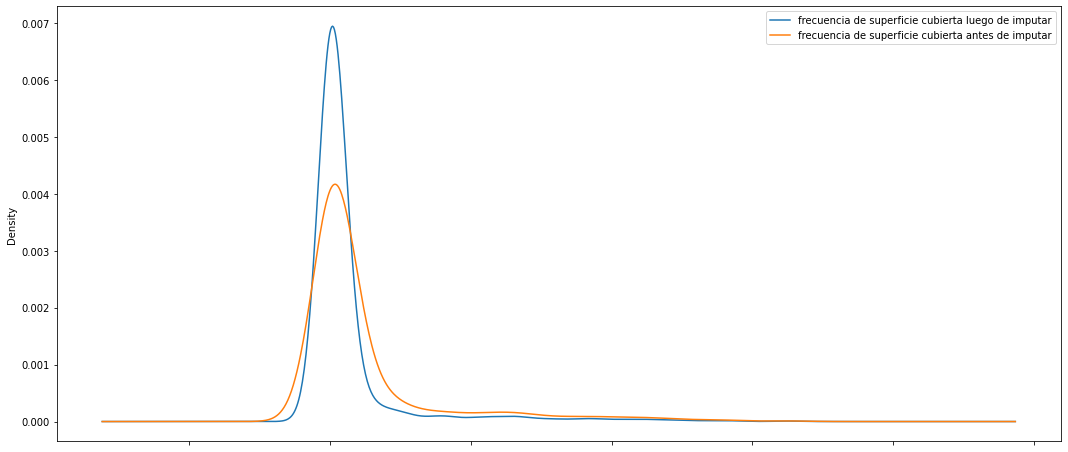

In [132]:
plotdata = pd.DataFrame({
   "frecuencia de superficie cubierta luego de imputar":ds_sin_nans_en_sup_total_y_cubierta.property_surface_covered.value_counts(),
   "frecuencia de superficie cubierta antes de imputar":x_train.property_surface_covered.value_counts(),
    }, 
)

plot_ = plotdata.plot(kind="kde",  figsize=(18,8))

for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 30 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)


In [133]:
x_train.loc[:,"property_surface_covered"].replace(to_replace=[x_train['property_surface_covered']],value=[ds_sin_nans_en_sup_total_y_cubierta['property_surface_covered']],inplace=True)

Realizamos lo mismo con el set de test. 

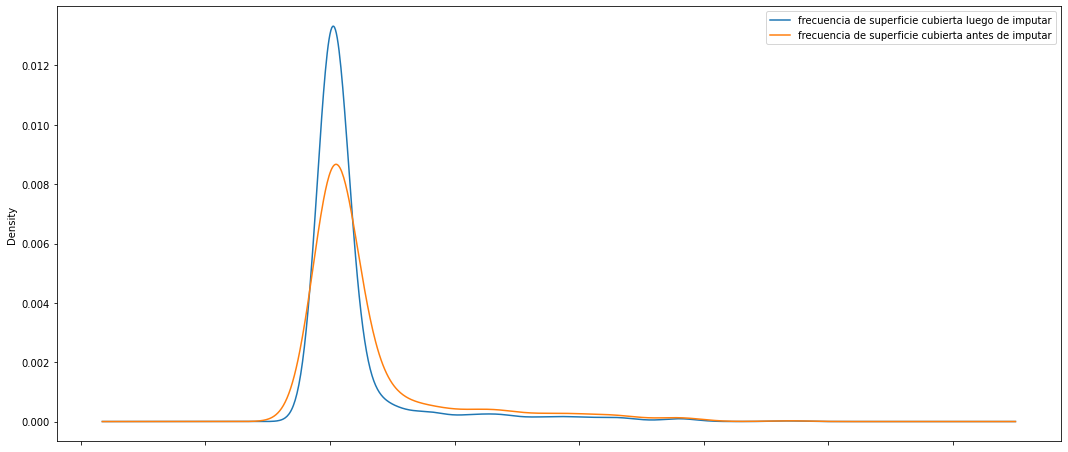

In [134]:
plotdata = pd.DataFrame({
   "frecuencia de superficie cubierta luego de imputar":ds_sin_nans_en_sup_total_y_cubierta_test.property_surface_covered.value_counts(),
   "frecuencia de superficie cubierta antes de imputar":x_test.property_surface_covered.value_counts(),
    }, 
)

plot_ = plotdata.plot(kind="kde",  figsize=(18,8))

for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 30 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)


In [135]:
df_eliminar_nans_en_sup_covered = x_test[columnas].copy()

array_sin_nans_en_sup_covered_test = imp.transform(df_eliminar_nans_en_sup_covered)

ds_sin_nans_en_sup_covered_test = pd.DataFrame(array_sin_nans_en_sup_covered_test, columns = columnas) #imp.fit_transfor devuelve un arrar sin nans en las columnas
ds_sin_nans_en_sup_covered_test = ds_sin_nans_en_sup_covered_test.round(0)

In [136]:
x_test.loc[:,"property_surface_covered"].replace(to_replace=[x_test['property_surface_covered']],value=[ds_sin_nans_en_sup_covered_test['property_surface_covered']],inplace=True)

Analizaremos ahora posibles valores invalidos que se hayan podido generar con las imputaciones.

In [137]:
reg_menos_sup_covered_que_total_train = x_train[x_train['property_surface_total'] < x_train['property_surface_covered']]
print(f"Cantidad de registros con superficie total menor a la cubierta despues de la impotacion en train: {reg_menos_sup_covered_que_total_train.shape[0]}")

Cantidad de registros con superficie total menor a la cubierta despues de la impotacion en train: 462


In [138]:
reg_menos_sup_covered_que_total_test = x_test[x_test['property_surface_total'] < x_test['property_surface_covered']]
print(f"Cantidad de registros con superficie total menor a la cubierta despues de la impotacion en test: {reg_menos_sup_covered_que_total_test.shape[0]}")

Cantidad de registros con superficie total menor a la cubierta despues de la impotacion en test: 179


Luego de realizar las imputaciones correspondientes, observamos que obtuvimos un pequeño grupo, de los datos que antes eran nans, que terminaron con un valor invalido.
Por este motivo decimos eliminarlos de ambos conjuntos train y test. 

In [139]:
x_train.drop(reg_menos_sup_covered_que_total_train.index, inplace=True)
x_test.drop(reg_menos_sup_covered_que_total_test.index, inplace=True)

##Valores Atípicos
---


### Análisis univariados


In [140]:
def mostrar_atipicos_univariados(columna):
  sns.boxplot(y=columna)
  #Cuartiles
  Q1_altura=np.quantile(columna, 0.25)
  Q3_altura=np.quantile(columna, 0.75)

  #Rango intercuartil
  IQR_altura=Q3_altura-Q1_altura

  #calculo outliers moderados:
  out_inf=Q1_altura-1.5*IQR_altura
  out_sup=Q3_altura+1.5*IQR_altura

  print("\tLimite moderado inferior:", out_inf)
  print("\tLimite moderado superior:", out_sup)


  print("\tOutliers por debajo de limite moderado", columna[(columna < out_inf)].size)
  print("\tOutliers por arriba de limite moderado", columna[(columna > out_sup)].size)


  #Limite inferior Outliers
  out_inf=Q1_altura-3*IQR_altura
  out_sup=Q3_altura+3*IQR_altura

  print("\tLimite severo inferior:", out_inf)
  print("\tLimite severo superior:", out_sup)

  print("\tOutliers por debajo de limite severo", columna[(columna < out_inf)].size)
  print("\tOutliers por arriba de limite severo", columna[(columna > out_sup)].size)

####property_price

Valores atipicos en property_price:
	Limite moderado inferior: -115000.0
	Limite moderado superior: 445000.0
	Outliers por debajo de limite moderado 0
	Outliers por arriba de limite moderado 5750
	Limite severo inferior: -325000.0
	Limite severo superior: 655000.0
	Outliers por debajo de limite severo 0
	Outliers por arriba de limite severo 2861


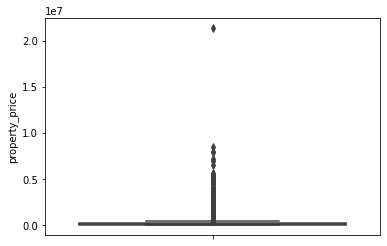

In [141]:
print(f"Valores atipicos en property_price:")
mostrar_atipicos_univariados(x_train.property_price)

Estos resultados tienen sentido dado que no vemos ningún precio por debajo de 0, mientras que podemos observar precios de hogares que se son mucho mas altos que los límites brindados por el método IRQ.

####property_surface_total

Valores atipicos en surface_total: 
	Limite moderado inferior: -46.5
	Limite moderado superior: 197.5
	Outliers por debajo de limite moderado 0
	Outliers por arriba de limite moderado 5186
	Limite severo inferior: -138.0
	Limite severo superior: 289.0
	Outliers por debajo de limite severo 0
	Outliers por arriba de limite severo 2237


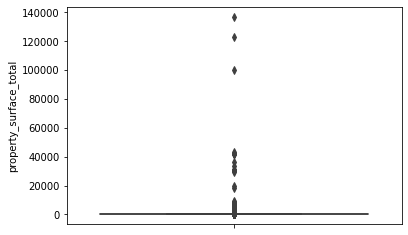

In [142]:
print(f"Valores atipicos en surface_total: ")
mostrar_atipicos_univariados(x_train.property_surface_total)

Estos resultados tienen sentido dado que no vemos ninguna medida de superficie por debajo de 0, mientras que podemos observar superficies totales que son mucho mas altos que los límites brindados por el método IRQ.

####property_surface_covered

Valores atipicos: surface_covered
	Limite moderado inferior: -32.0
	Limite moderado superior: 160.0
	Outliers por debajo de limite moderado 0
	Outliers por arriba de limite moderado 5131
	Limite severo inferior: -104.0
	Limite severo superior: 232.0
	Outliers por debajo de limite severo 0
	Outliers por arriba de limite severo 2298


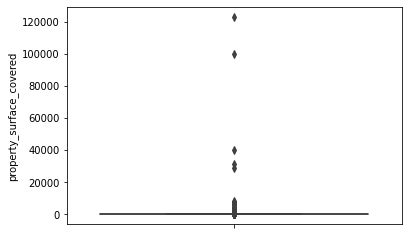

In [143]:
print(f"Valores atipicos: surface_covered")
mostrar_atipicos_univariados(x_train.property_surface_covered)

Estos resultados tienen sentido dado que no vemos ninguna medida de superficie cubierta por debajo de 0, mientras que podemos observar superficies cubiertas que son mucho mas altos que los límites brindados por el método IRQ.


####property_bedrooms

Valores atipicos de bedrooms
	Limite moderado inferior: -2.0
	Limite moderado superior: 6.0
	Outliers por debajo de limite moderado 0
	Outliers por arriba de limite moderado 183
	Limite severo inferior: -5.0
	Limite severo superior: 9.0
	Outliers por debajo de limite severo 0
	Outliers por arriba de limite severo 56


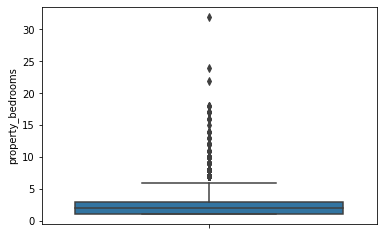

In [144]:
print(f"Valores atipicos de bedrooms")
mostrar_atipicos_univariados(x_train.property_bedrooms)

Estos resultados tienen sentido ya que no hay propiedades con cantidad de habitaciones negativas, a su vez teniendo en cuenta que analizamos unicamente las propiedades que residen en Capital Federal es de esperarse que una propiedad tenga una cantidad de habitaciones menor a 6.

####property_rooms

Valores atipicos de rooms
	Limite moderado inferior: -1.0
	Limite moderado superior: 7.0
	Outliers por debajo de limite moderado 0
	Outliers por arriba de limite moderado 539
	Limite severo inferior: -4.0
	Limite severo superior: 10.0
	Outliers por debajo de limite severo 0
	Outliers por arriba de limite severo 106


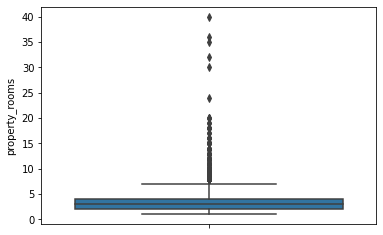

In [145]:
print(f"Valores atipicos de rooms")
mostrar_atipicos_univariados(x_train.property_rooms)

Estos resultados tienen sentido ya que no hay propiedades con cantidad de ambientes negativas, a su vez teniendo en cuenta que analizamos unicamente las propiedades que residen en Capital Federal es de esperarse que una propiedad tenga una cantidad de ambientes menor a 7, ya que como analizamos anteriormente la cantidad de departamentos es superior a la cantidad de casas y ph's.

Como conclusion, en la mayoría de los datos tenemos un rango bastante acotado de valores comunes, y los outliers se alejan en gran medida de ese rango acotado. Por eso es que en los gráficos de boxplot, con suerte se llega a ver el rango común.

### Análisis bivariados


In [146]:
from sklearn.utils.fixes import scipy
def mostrar_atipicos_bivariados(columna_a, columna_b):
  sns.scatterplot(x=columna_a, y=columna_b)

# el umbral es a mano, viendo lo que mas sentido tenga
def analisis_mahalanobis(dataframe, columnas, umbral, cantGraficos = 2, devolver_mahal = False):

  X = dataframe[columnas]
  sample_X = X.sample(frac=0.1, random_state=2)

  mu = sample_X.mean()
  X_diff = X - mu
  X_diff = X_diff.values.T

  cov = np.cov(sample_X.values.T)
  inv_cov = np.linalg.inv(cov)
  W = scipy.linalg.sqrtm(inv_cov)

  Wx = np.matmul(W, X_diff)

  mahal_dists = np.array([np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])])
 
  ds_mahal = dataframe[columnas].copy()
  ds_mahal['mahalanobis'] = mahal_dists

  np.sort(ds_mahal)

  ds_mahal['es_outlier'] = ds_mahal['mahalanobis']>umbral

  if(cantGraficos > 1):
    ds_temp = ds_mahal.copy()
    distancia_menor_a_10 = ds_temp['mahalanobis'] < 15
    ds_temp = ds_temp[distancia_menor_a_10]
    print(ds_temp['es_outlier'].value_counts())
    mostrar_distribuciones_cuantitativas("mahalanobis", ds=ds_temp, figsize=(8, 8), bins=30, espaciado=2)
    if len(columnas) == 2:
      plt.figure(figsize=(8, 8), dpi=80)
      sns.scatterplot(x=ds_mahal[columnas[0]], y=ds_mahal[columnas[1]], hue=ds_mahal['es_outlier'])
      mostrar_metadata_grafico(f'Dispersograma {columnas[0]} vs {columnas[1]}')
  else:
    plt.figure(figsize=(8, 8), dpi=80)
    sns.scatterplot(x=ds_mahal[columnas[0]], y=ds_mahal[columnas[1]], hue=ds_mahal['es_outlier'])
    mostrar_metadata_grafico(f'Dispersograma {columnas[0]} vs {columnas[1]}')

  if(devolver_mahal):
    return ds_mahal 

#### property_rooms vs property_bedrooms

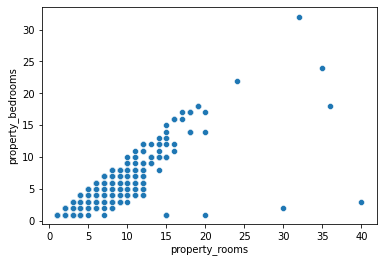

In [147]:
mostrar_atipicos_bivariados(x_train.property_rooms, x_train.property_bedrooms)

False    61737
True      1335
Name: es_outlier, dtype: int64


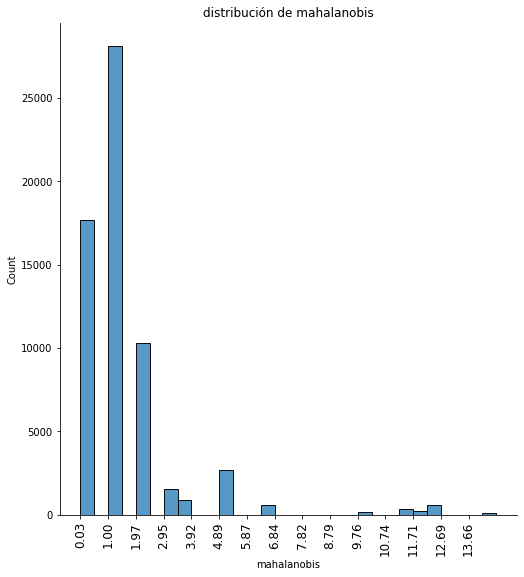

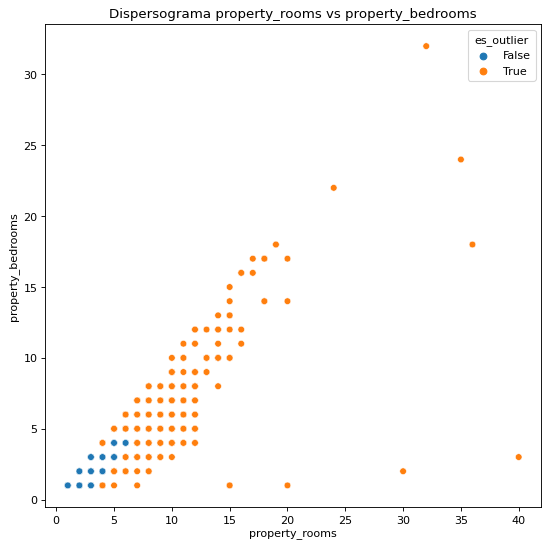

In [148]:
ds_mahal = analisis_mahalanobis(x_train,['property_rooms', 'property_bedrooms'], 7, devolver_mahal=True)

Como podemos observar del grafico de distribución de distancias mahalanobis, vemos que un umbral razonable es 7, dado que a partir de ahí las distancias grandes son anomalías. 

También podemos observar que de aproximadamente 61737 registros totales en el conjunto de training, 1335 salieron como outliers, lo cual es bastante razonable. En el gráfico no parece que sean pocos, pero esto es debido a que la mayoría de los no outliers, se concentran en la esquina inferior izquierda, llevando el valor medio a esa área.

En este caso, proponemos eliminar aquellos outliers que cuentan con una amplia cantidad de ambientes y cuya cantidad de cuartos no es acorde lógicamente a ese número. Para definir los limites haremos una recta en el grafico conseguido.



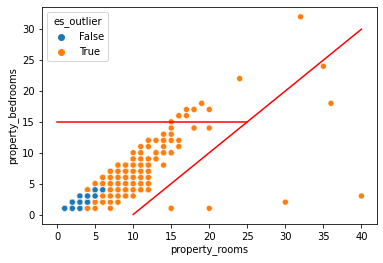

In [149]:
col = ['property_rooms', 'property_bedrooms']
sns.scatterplot(x=ds_mahal[col[0]], y=ds_mahal[col[1]], hue=ds_mahal['es_outlier'])
plt.plot([10,40], [0,30], color='r')
plt.plot([0,25], [15,15], color='r')
plt.show()

Como podemos observar, la recta elegida pasa por los puntos (10,0) y (40,30). Sacando la pendiente M y la ordenada B obtenemos:  

* M = 1
* B = -10

Tambien, consideramos tomar como outliers a los puntos que tiene mas de 15 bedrooms, siendo que nos encontramos en Capital Federal. 

Consideramos esta linea como un buen criterio de eliminacion de outliers.

Proponemos eliminar aquellos outliers para los modelos de train y de test, comenzando por el train.

In [150]:
m = 1
b = -10

cond_menos_bedrooms_que_rooms = x_train['property_bedrooms'] <= m*(x_train['property_rooms']) +b
cond_mas_de_quince_bedrooms = x_train['property_bedrooms'] > 15

reg_menos_bed_que_rooms = x_train[cond_menos_bedrooms_que_rooms]
x_train.drop(reg_menos_bed_que_rooms.index, inplace=True)#elimino

reg_mas_de_quince_bedrooms = x_train[cond_mas_de_quince_bedrooms]
x_train.drop(reg_mas_de_quince_bedrooms.index, inplace=True)#elimino

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


In [151]:
cond_menos_bedrooms_que_rooms = x_test['property_bedrooms'] <= m*(x_test['property_rooms']) + b
cond_mas_de_quince_bedrooms = x_test['property_bedrooms'] > 15

reg_menos_bed_que_rooms = x_test[cond_menos_bedrooms_que_rooms]
x_test.drop(reg_menos_bed_que_rooms.index, inplace=True)#elimino

reg_mas_de_quince_bedrooms = x_test[cond_mas_de_quince_bedrooms]
x_test.drop(reg_mas_de_quince_bedrooms.index, inplace=True)#elimino

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


Se muestra el grafico de puntos actualizado, habiendo eliminado los outliers siguiendo los criterios mencionados anteriormente.

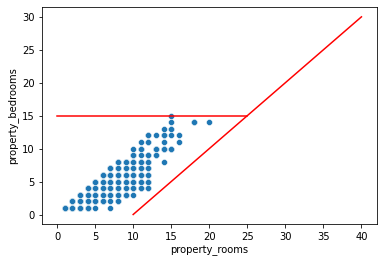

In [152]:
sns.scatterplot(x=x_train['property_rooms'], y=x_train['property_bedrooms'])
plt.plot([10,40], [0,30], color='r')
plt.plot([0,25], [15,15], color='r')
plt.show()

Seguimos el mismo procedimiento con el set de testeo.

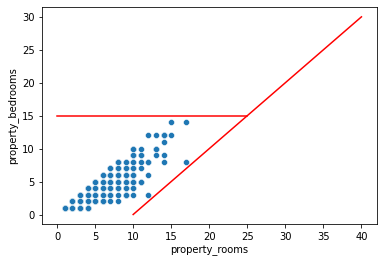

In [153]:
sns.scatterplot(x=x_test[col[0]], y=x_test[col[1]])
plt.plot([10,40], [0,30], color='r')
plt.plot([0,25], [15,15], color='r')
plt.show()

####property_surface_total vs property_surface_covered


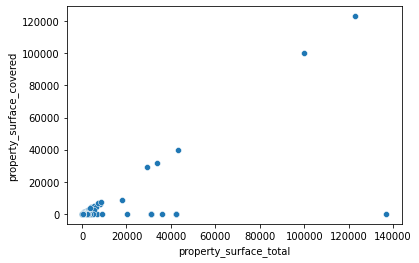

In [154]:
mostrar_atipicos_bivariados(x_train.property_surface_total, x_train.property_surface_covered)

False    56675
True      6191
Name: es_outlier, dtype: int64


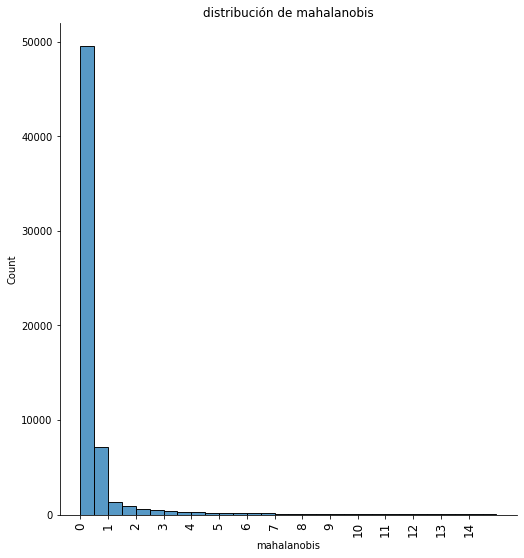

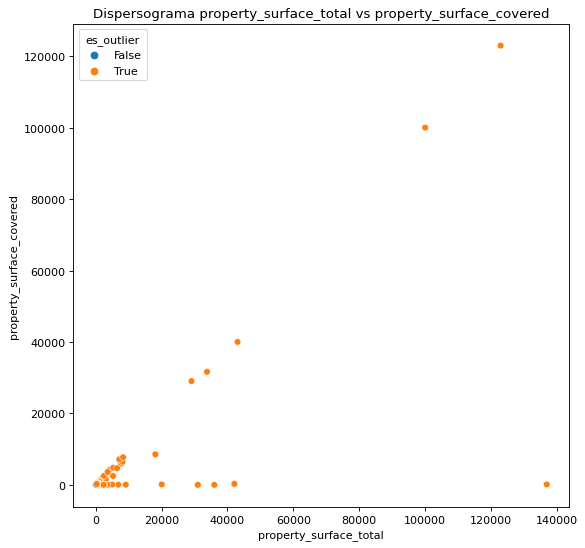

In [155]:
analisis_mahalanobis(x_train,['property_surface_total', 'property_surface_covered'], 1)

En este caso, vemos del grafico de distribución de distancias mahalanobis, que un umbral razonable seria 1, dado que a partir de ahí las distancias grandes comienzan a ser anomalías. 

Como analisis logico nos parece razonable destacar el hecho de que es muy poco probable tener Casa, PH o Departamentos que cuenten con mas de 500 m2 en superficies cubiertas o totales en Capital Federal. Decidimos analizar cuantos casos tienen estas caracteristicas.


In [156]:
cant = x_train[(x_train['property_surface_covered'] > 500) | (x_train['property_surface_total'] > 500)].shape[0]
total = x_train.shape[0]
print(f"Porcentaje de registros con superficie cubierta o total mayor a 500 en train: {cant*100/total}%")

cant = x_test[(x_test['property_surface_covered'] > 500) | (x_test['property_surface_total'] > 500)].shape[0]
total = x_test.shape[0]
print(f"Porcentaje de registros con superficie cubierta o total mayor a 500 en test: {cant*100/total}%")


Porcentaje de registros con superficie cubierta o total mayor a 500 en train: 0.6361642118458164%
Porcentaje de registros con superficie cubierta o total mayor a 500 en test: 0.6064369999634677%


Vemos que la proporcion de datos con esas caracteristicas es muy poca a comparacion con la totalidad de los registros. Decidimos eliminar los datos al considerarlos logicamente invalidos. 

In [157]:
cond_surface_total = x_train['property_surface_total'] > 500
cond_surface_covered = x_train['property_surface_covered'] > 500

reg_combinacion = x_train[cond_surface_total | cond_surface_covered]
reg_combinacion.shape

x_train.drop(reg_combinacion.index, inplace=True)

In [158]:
cond_surface_total = x_test['property_surface_total'] > 500
cond_surface_covered = x_test['property_surface_covered'] > 500

reg_combinacion = x_test[cond_surface_total | cond_surface_covered]
reg_combinacion.shape

x_test.drop(reg_combinacion.index, inplace=True)

Volvemos a analizar los graficos de puntos entre superficie total y cubierta una vez eliminados lo que considerabamos outliers.

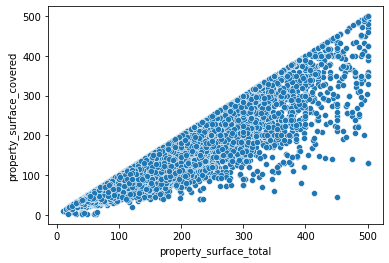

In [159]:
mostrar_atipicos_bivariados(x_train.property_surface_total, x_train.property_surface_covered)

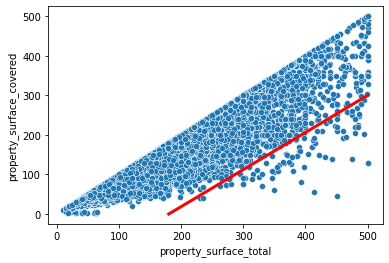

In [160]:
sns.scatterplot(x=x_train['property_surface_total'], y=x_train['property_surface_covered'])
plt.plot([180,500], [0,300], color='r', lw=3)
plt.show()

Volvemos a aplicar la logica de la recta como un limite de outliers siguiendo la correlacion entre ambas variables.

Como podemos observar, la recta elegida pasa por los puntos (180,0), (500,300). Sacando la pendiente M y la ordenada B obtenemos:  

* M = 15/16
* B = -675/4

Tambien, consideramos tomar como outliers a los puntos que tiene mas de 15 bedrooms, siendo que nos encontramos en Capital Federal. 

Consideramos esta linea como un buen criterio de eliminacion de outliers.

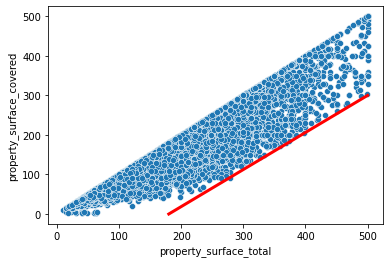

In [161]:
m = 15/16
b = -675/4

cond_mucho_total_poco_covered = x_train['property_surface_covered'] <= m*(x_train['property_surface_total']) + b

reg_mucho_total_poco_covered = x_train[cond_mucho_total_poco_covered]
reg_mucho_total_poco_covered.shape

ds_aux = x_train.drop(reg_mucho_total_poco_covered.index, inplace=False)
mostrar_atipicos_bivariados(ds_aux.property_surface_total, ds_aux.property_surface_covered)
plt.plot([180,500], [0,300], color='r', lw=3)

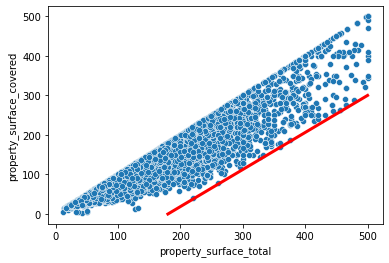

In [162]:
cond_mucho_total_poco_covered = x_test['property_surface_covered'] <= m*(x_test['property_surface_total']) + b

reg_mucho_total_poco_covered = x_test[cond_mucho_total_poco_covered]
reg_mucho_total_poco_covered.shape

ds_aux = x_test.drop(reg_mucho_total_poco_covered.index, inplace=False)
mostrar_atipicos_bivariados(ds_aux.property_surface_total, ds_aux.property_surface_covered)
plt.plot([180,500], [0,300], color='r', lw=3)

Analizaremos ahora la distancia mahalanobis con las columnas de superficie total y cubierta.

False    60467
True      1000
Name: es_outlier, dtype: int64


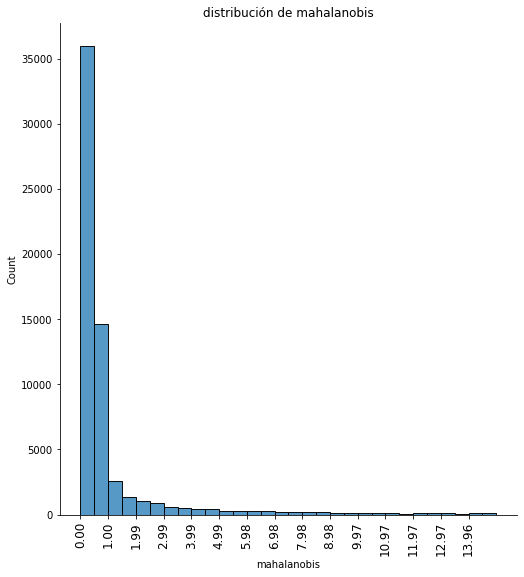

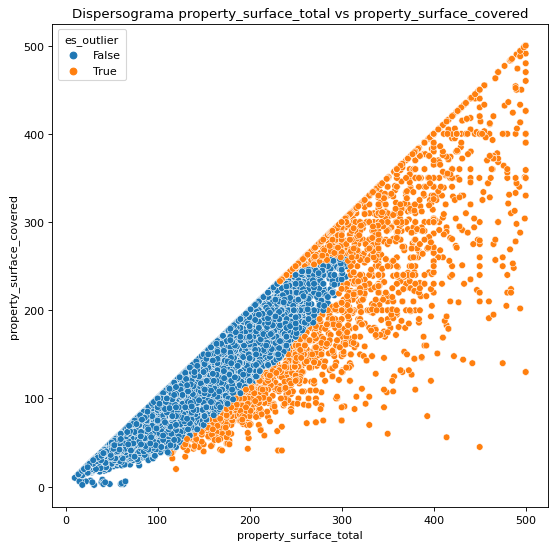

In [163]:
analisis_mahalanobis(x_train,['property_surface_total', 'property_surface_covered'], 9.9)

Si bien por los graficos parecen haber muchos casos outliers, podemos notar que solo 1000 de 60467 lo son. 

Mostramos el grafico con el data set de test tambien.

False    26060
True       438
Name: es_outlier, dtype: int64


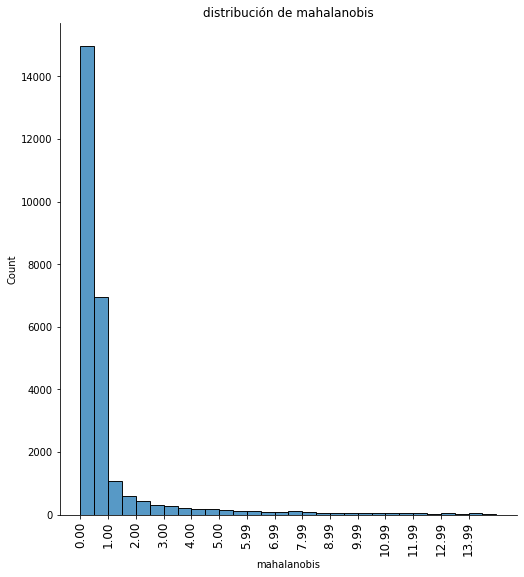

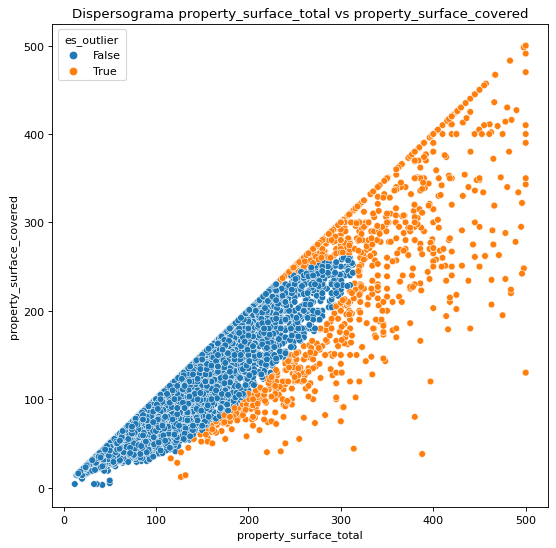

In [164]:
analisis_mahalanobis(x_test,['property_surface_total', 'property_surface_covered'], 9.9)

#### property_surface_covered vs property_rooms

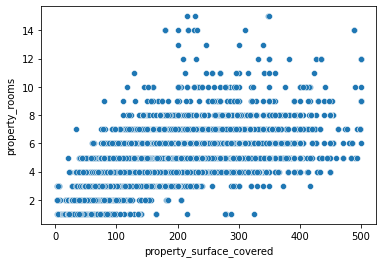

In [165]:
mostrar_atipicos_bivariados(x_train.property_surface_covered, x_train.property_rooms)

No observamos una clara separacion de datos al graficarlos con un grafico de scatter. Procedemos a hacer el analisis de mahalanobis.

False    60772
True      1326
Name: es_outlier, dtype: int64


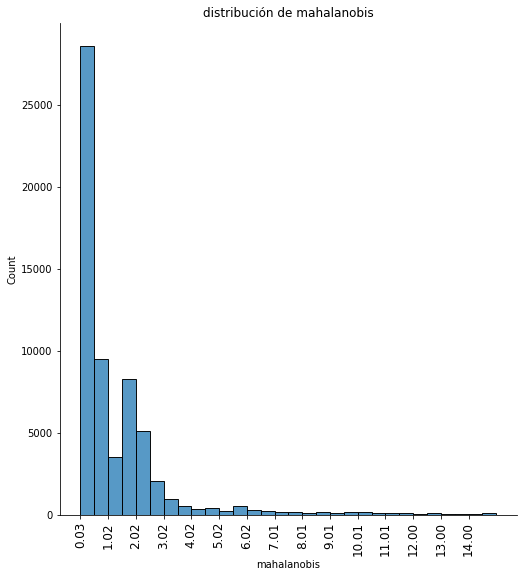

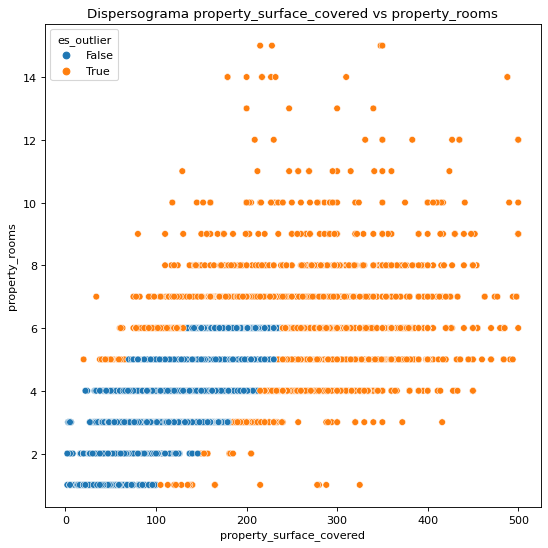

In [166]:
analisis_mahalanobis(x_train, ['property_surface_covered', 'property_rooms'], 7.9)

En este caso, vemos del grafico de distribución de distancias mahalanobis, que un umbral razonable seria 7.9, dado que a partir de ahí las distancias grandes son anomalas. También podemos observar que solo 1326 del conjunto de registros totales de training casos salieron como outliers, del total de los datos, lo cual es bastante razonable, siendo esta una proporcion baja. 

En el gráfico no parece que sean pocos, pero esto es debido a que la mayoría de los no outliers, se concentran en la esquina inferior izquierda, llevando el valor medio a esa área.

####property_price vs property_surface_total

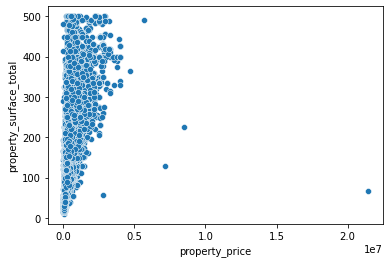

In [167]:
mostrar_atipicos_bivariados(x_train.property_price, x_train.property_surface_total)

False    59375
True      2126
Name: es_outlier, dtype: int64


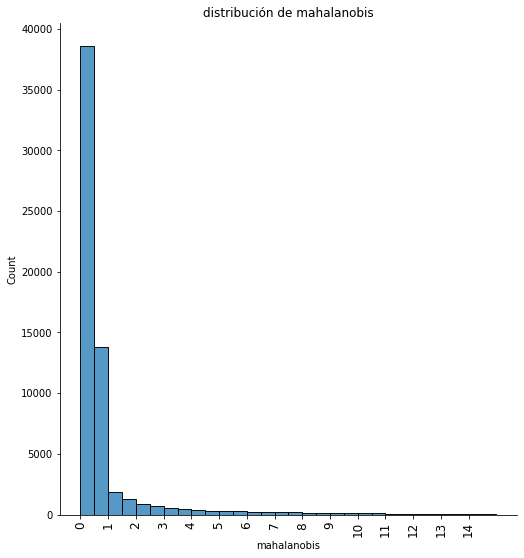

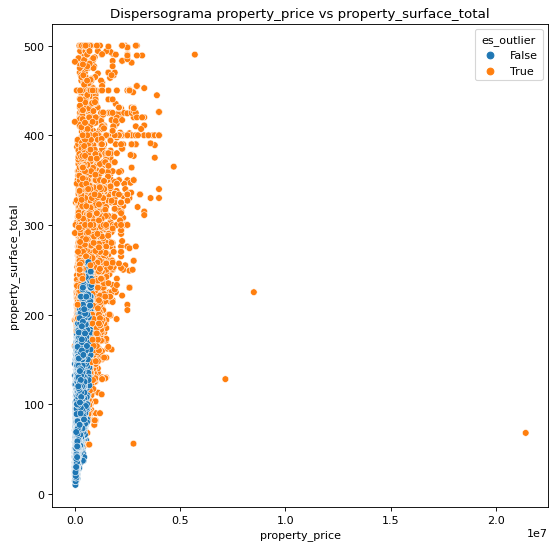

In [168]:
analisis_mahalanobis(x_train, ['property_price', 'property_surface_total'], 6)

En este caso, vemos del grafico de distribución de distancias mahalanobis, que un umbral razonable seria 6, dado que a partir de ahí las distancias grandes son anomalías. También podemos observar que solo 2126 casos salieron como outliers, del total de los datos, lo cual es bastante razonable, siendo esta una proporcion baja. 

En el gráfico no parece que sean pocos, pero esto es debido a que la mayoría de los no outliers, se concentran en la esquina inferior izquierda, llevando el valor medio a esa área.

En este caso, vimos conveniente eliminar aquellos registros que tienen valores de property_price muy poco probables.

Analizamos la cantidad de registros con property_price mayores a 3000000.


In [169]:
cond_property_price = x_train['property_price'] > 3000000

reg_combinacion = x_train[cond_property_price]
print(f"Cantidad de registros con precio mayor a 3000000: {reg_combinacion.shape[0]}")


Cantidad de registros con precio mayor a 3000000: 47


In [170]:
x_train.drop(reg_combinacion.index, inplace=True)

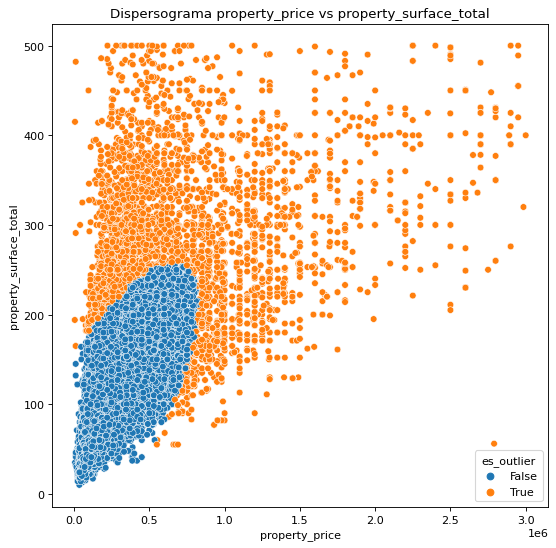

In [171]:
analisis_mahalanobis(x_train, ['property_price', 'property_surface_total'], 6, 1)

Siguiendo con la parte de tratamiento de valores atipicos para el modelo de test:

In [172]:
cond_property_price = x_test['property_price'] > 3000000

reg_combinacion = x_test[cond_property_price]
reg_combinacion.shape

x_test.drop(reg_combinacion.index, inplace=True)

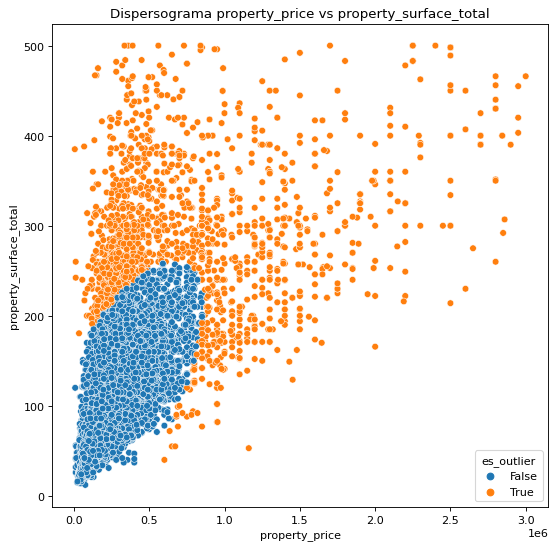

In [173]:
analisis_mahalanobis(x_test, ['property_price', 'property_surface_total'], 6, 1)

##Actualizacion de filas de y_train e y_test

Dado que eliminamos varias filas de los dataset de train y test, como aun contemos la variable 'property_price' en ambos dataset y tambien es la unica variables que esta dentro de los datasets de y_train e y_test, decidimos remplazarlas para que queden solo las filas que no fueron eliminadas. 

In [174]:
y_train = x_train['property_price']
y_test = x_test['property_price']

##Reducción de la dimensionalidad

Para reducir la dimensionalidad del data set, utilizaremos el método PCA, dado que sirve para: 

* Visualización de datos para entender su distribución
detección de patrones inherentes a simple vista

* Reducción del ruido

* Aceleración de los tiempos de entrenamiento de un modelo

* Compresión de la información

* Presentación de resultados


A la hora de relizar el PCA, extraemos todas las variables no categoricas y utilizamos un dataset con las mismas, debido a que PCA no se puede realizar con variables categoricas, con excepcion de convertirlas de alguna manera a variable numerica. De todas formas no es recomendable por lo tanto solo haremos la reduccion de la dimensionalidad con las variables numericas.

In [175]:
x_train_pca = x_train.drop(columns = ['place_l2', 'id', 'place_l3', 'operation', 'property_type', 'property_title', 
                                      'latitud', 'longitud', 'property_currency', 
                                      'property_price'], inplace=False)

columnas_elegidas = x_train_pca.columns.to_list()

x = x_train_pca.loc[:, columnas_elegidas]

std = StandardScaler()

x = std.fit_transform(x)

from sklearn.decomposition import PCA

pca = PCA(n_components = 3) #Luego veremos como determinar la cantidad de componentes
x_transformada = pca.fit_transform(x)


ds_pca = pd.DataFrame(data = x_transformada
             , columns = ['cp_1', 'cp_2', 'cp_3'], index=x_train.index)

print("Columnas elegidas:")
print(columnas_elegidas)
print("\n\nNuevo dataset conseguido:")
ds_pca

Columnas elegidas:
['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered']


Nuevo dataset conseguido:


cp_1      cp_2      cp_3
54155   0.217056  0.047981  0.022129
115091 -1.840979 -0.359576 -0.344914
4930    1.452893 -0.469365  0.510847
81842  -1.260339 -0.228994  0.197088
289106  2.154934 -0.131630 -0.196648
...          ...       ...       ...
425582 -1.402395 -0.088505  0.208687
151913  0.096746  0.168457  0.039815
221544  1.350904  0.663661 -0.130303
362448  0.050359  0.211013  0.026135
446078  4.689452 -1.930589  0.200437

[63367 rows x 3 columns]

In [176]:
varianza_explicada = pca.explained_variance_ratio_
varianza_explicada

array([0.86871462, 0.10089505, 0.01814317])

In [177]:
varianza_explicada.cumsum()

array([0.86871462, 0.96960967, 0.98775284])

Observamos la covarianza entre los 3 componentes conseguidos.

In [178]:
pca.get_covariance()

array([[1.00001578, 0.92562962, 0.78097098, 0.79010635],
       [0.92562962, 1.00001578, 0.74799781, 0.75384341],
       [0.78097098, 0.74799781, 1.00001578, 0.95077238],
       [0.79010635, 0.75384341, 0.95077238, 1.00001578]])

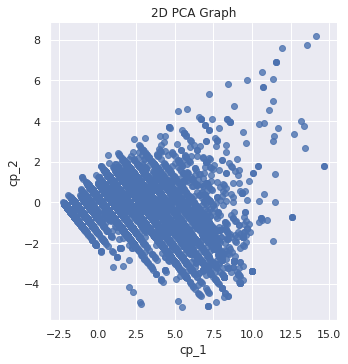

In [179]:
sns.set()
 
sns.lmplot(
   x='cp_1', 
   y='cp_2', 
   data=ds_pca,  
   fit_reg=False, 
   legend=True
   )

plt.title('2D PCA Graph')
plt.show()

Analizamos ahora scree plot.

[0.86871462 0.96960967 0.98775284]


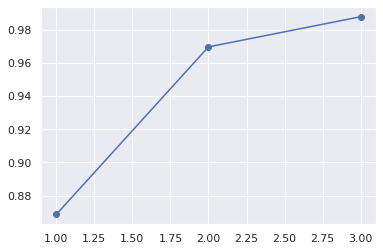

In [180]:
list_x = list(range(1, len(varianza_explicada)+1))

# Grafico varianza explicada y cantidad de componentes principales
plt.figure(figsize=(6, 4))
print(varianza_explicada.cumsum())
plt.plot(list_x, varianza_explicada.cumsum(), '-o')
plt.xlabel = 'Componentes Principales'
plt.ylabel = 'Variabilidad explicada'
plt.show()

Como podemos observar, con tal solo 2 componentes principales, tenemos un 97.5% de la variación total, suficiente para entrenar un modelo con estos componentes en vez de utilizar el dataset entero.

A continuacion, realizaremos el mismo analisis para el modelo de test:

In [181]:
x_test_pca = x_test.drop(columns = ['place_l2', 'id', 'place_l3', 'operation', 'property_type', 
                                    'property_title','latitud','longitud','property_currency', 
                                    'property_price'], inplace=False)

columnas_elegidas = x_test_pca.columns.to_list()

x_2 = x_test_pca.loc[:, columnas_elegidas]

x_2 = std.transform(x_2)

In [182]:
x_test_transformada = pca.transform(x_2)

In [183]:
ds_pca_test = pd.DataFrame(data = x_test_transformada, columns = ['cp_1', 'cp_2', 'cp_3'], index=x_test.index)

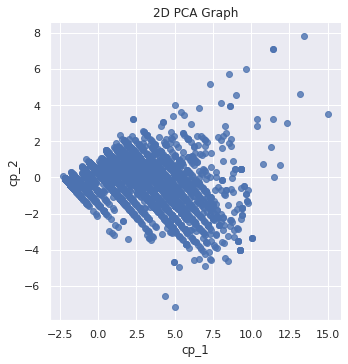

In [184]:
sns.set()

sns.lmplot(
    x='cp_1', 
    y='cp_2', 
    data=ds_pca_test, 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()

Vemos que se respetan las distribuciones de punto tanto en train como test.

#Agrupamiento

###Análisis de la tendencia al Clustering

Procederemos a analizar el agrupamiento mediante el uso de KMeans.

In [185]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans

ds_kmeans = x_train.drop(columns = ['place_l2', 'id', 'place_l3', 'operation', 'property_type', 'property_title', 'property_currency'], inplace=False)

kmeans = KMeans(n_clusters=4, random_state=2)  #Creamos un objeto de la clase KMeans para realizar el agrupamiento

kmeans.fit(ds_kmeans) #Entrenamos el algoritmo para que aprenda cómo agrupar

y_kmeans = kmeans.predict(ds_kmeans)

centers = kmeans.cluster_centers_ #Visualicemos los grupos y el centroide de cada uno

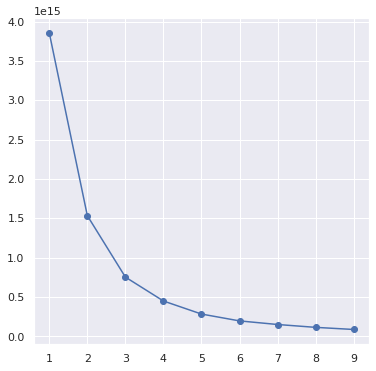

In [186]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(ds_kmeans)
    sse.append(km.inertia_)

# Grafico el SSE por K
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel='Cantidad de clusters'
plt.ylabel='SSE'
plt.show()

Vemos que en 4 clusters la curva que se forma en el gráfico empieza a aplanarse y en 2 clusters se produce un quiebre.

##Análisis de Silhouette

In [187]:
from sklearn.metrics import silhouette_score
#grafico el indice de siluette variando la cantidad de clusters de 2 a 5

list_k = list(range(2, 6))

for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters,random_state=2)
    preds = clusterer.fit_predict(ds_kmeans)

    score = silhouette_score (ds_kmeans, preds)
    print ("For n_clusters = " + str(n_clusters) + " Silhouette score:" + str(score))

For n_clusters = 2 Silhouette score:0.8486483428518299
For n_clusters = 3 Silhouette score:0.7306511911552227
For n_clusters = 4 Silhouette score:0.6816069517413453
For n_clusters = 5 Silhouette score:0.6430428801347959


El indice de silhouette mas grande y cercano a 1 se genera con un numero de clusters igual a 2. Por este motivo, decidimos quedarnos con ese numero de clusters. 

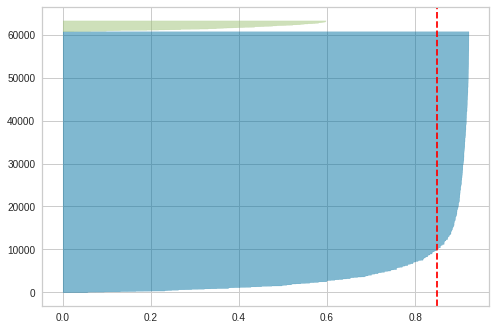

In [188]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(2, random_state=0)

# Visualizamos el gráfico de silueta
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')    # Instancio el visualizador
visualizer.fit(ds_kmeans)
plt.show()

Teniendo en cuenta que el grafico muestra la evaluacion de la densidad y la separecion entre los clusters, vemos que una marcada diferencia de densidad entre un cluster y el otro.

##Análisis de cada grupo

In [189]:
clusterer = KMeans(n_clusters=2,random_state=2)
preds_K2 = clusterer.fit_predict(ds_kmeans)

Analizaremos la agrupacion en graficos de scatter en precio con rooms y con bedrooms.

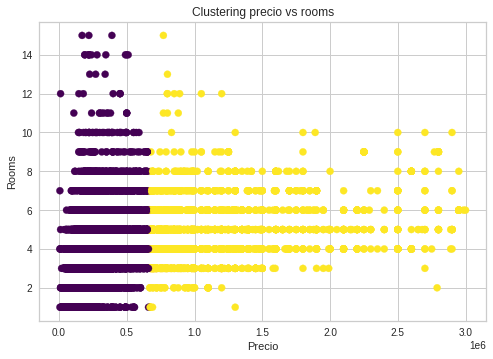

In [190]:
import matplotlib.pyplot as plt



plt=reload(plt)
plt.scatter(ds_kmeans.property_price, ds_kmeans.property_rooms, c=preds_K2, s=50, cmap='viridis')
plt.title("Clustering precio vs rooms")
plt.xlabel("Precio")
plt.ylabel("Rooms")
plt.show()

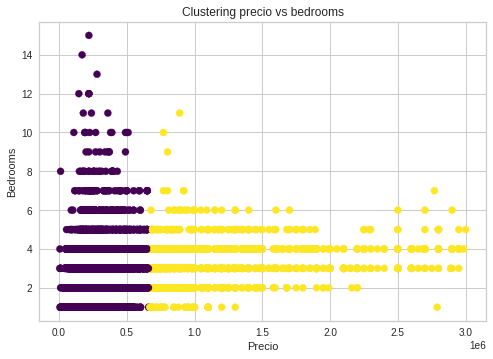

In [191]:
plt.scatter(ds_kmeans.property_price, ds_kmeans.property_bedrooms, c=preds_K2, s=50, cmap='viridis')
plt.title("Clustering precio vs bedrooms")
plt.xlabel("Precio")
plt.ylabel("Bedrooms")
plt.show()

Observamos que en ambos graficos la clusterizacion esta completamente determinada por el precio, es decir que a pesar de aumentar o disminuir la cantidad de habitaciones o de ambientes no cambiara de cluster sino que solo cuando varia el precio. 

Ademas podemos observar que se visualiza la misma division de cluster dependientes del precio.

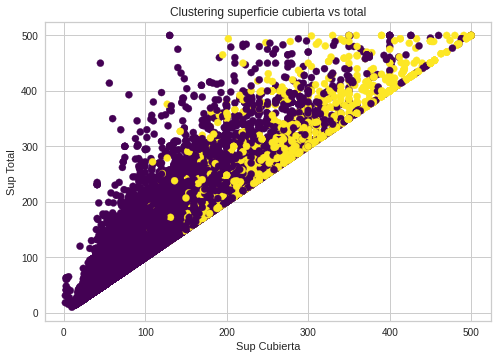

In [192]:
plt.scatter(ds_kmeans.property_surface_covered, ds_kmeans.property_surface_total, c=preds_K2, s=50, cmap='viridis')
plt.title("Clustering superficie cubierta vs total")
plt.xlabel("Sup Cubierta")
plt.ylabel("Sup Total")
plt.show()

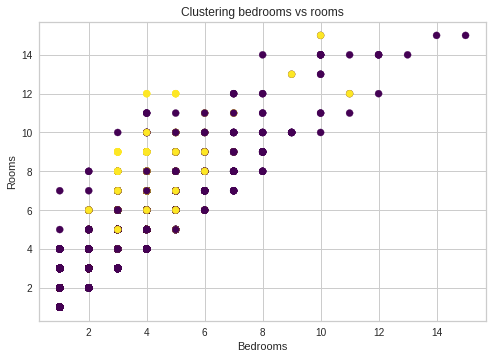

In [193]:
plt.scatter(ds_kmeans.property_bedrooms, ds_kmeans.property_rooms, c=preds_K2, s=50, cmap='viridis')
plt.title("Clustering bedrooms vs rooms")
plt.xlabel("Bedrooms")
plt.ylabel("Rooms")
plt.show()

Reafirmamos que el precio es el factor mas importante a la hora de la clusterizacion y por lo visto es el unico que influye completamente, ya que solo se observa una clusterizacion notoria al utilizar la variable precio.

A pesar de observar una marcada clusterizacion en base a property-price y teniendo en cuenta las anteriores columnas que fueron las que utilizamos para realizar el agrupamiento mediante el metodo de kmeans, podemos concluir en que otros posibles candidatos para el agrupamiento podrian haber sido los siguientes:

* property_rooms: teniendo en cuenta la cantidad de habitaciones se espera que abunde la cantidad de propiedades con 1 o 2 ambientes, al estar ubicados en Capital Federal. Por lo tanto, esto generara que se clusterice entre mayores a 2 ambientes y menores o iguales a 2 ambientes. 

* latitud: teniendo en cuenta la diferencia de precio que se suele generar entre zona este y zona oeste, se puede ver una posible tendencia a la generacion de dos clusters, ya que en el este sabemos que se encuentra la zona mas cara de la Capital Federal (ej. Puerto Madero) y eso puede generar una posible division. 

* longitud: teniendo en cuenta la diferencia de precio que se suele generar entre zona norte y zona sur, se puede ver una posible tendencia a la generacion de dos clusters. 

* property_surface_covered: teniendo en cuenta que una casa o ph tiende a tener mayor cantidad de m^2 que un departamento, se puede llegar a la conclusion de que la superficie cubierta puede dar pie a una posible generacion de clusters. 



##Gráfico de mapa de CABA 

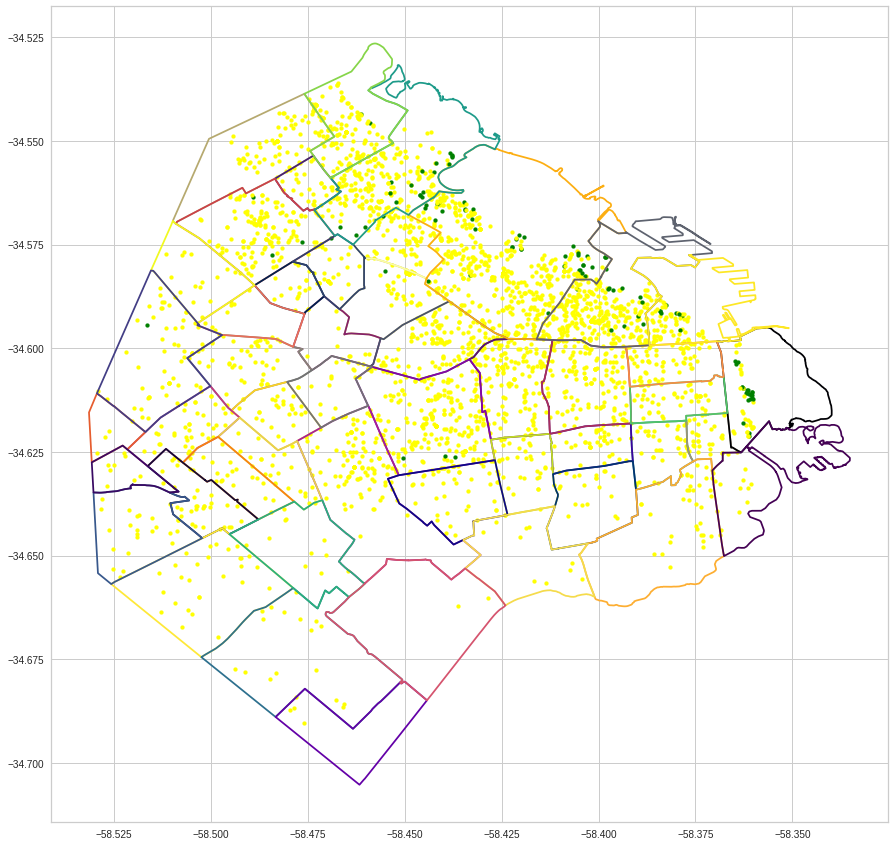

El porcentaje de outsiders dentro de la proporcion pedida de la muestra es: 0.0


In [194]:
graficar_puntos_en_caba(ds_kmeans.longitud, ds_kmeans.latitud, clusters=preds_K2, istamano=False, proporcion=0.05, outsiders=False, tamano_de_punto=15)

A comparacion de los graficos que hicimos teniendo en cuenta el precio, podemos notar que la latitud y longitud en conjunto, no muestran una formacion de clusters a simple vista.

Sin embargo, en los limites del norte y noroeste de Capital Federal podemos ver una tendencia al clustering, pero la consideramos despreciable.

##Análisis con 3 grupos

Volvemos a utilizar Kmean como metodo de clusterizacion.

In [195]:
clusterer_k3 = KMeans(n_clusters=3,random_state=2)
preds_K3 = clusterer_k3.fit_predict(ds_kmeans)

Seguiremos el mismo analisis que hicimos con la agrupacion de 2. Buscaremos las relaciones con el precio.

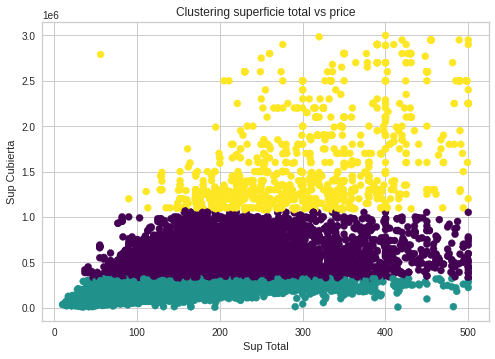

In [196]:
plt.scatter(ds_kmeans.property_surface_total, ds_kmeans.property_price, c=preds_K3, s=50, cmap='viridis')
plt.title("Clustering superficie total vs price")
plt.xlabel("Sup Total")
plt.ylabel("Sup Cubierta")
plt.show()

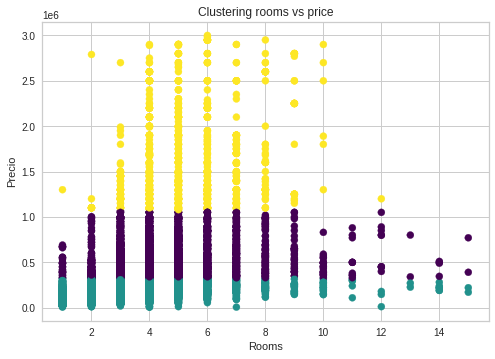

In [197]:
plt.scatter(ds_kmeans.property_rooms, ds_kmeans.property_price, c=preds_K3, s=50, cmap='viridis')
plt.title("Clustering rooms vs price")
plt.xlabel("Rooms")
plt.ylabel("Precio")
plt.show()

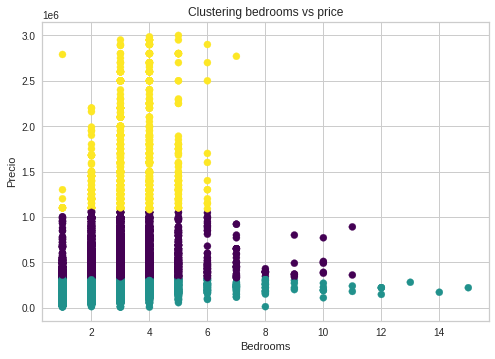

In [198]:
plt.scatter(ds_kmeans.property_bedrooms, ds_kmeans.property_price, c=preds_K3, s=50, cmap='viridis')
plt.title("Clustering bedrooms vs price")
plt.xlabel("Bedrooms")
plt.ylabel("Precio")
plt.show()

Notamos una relacion directa entre los agrupamientos y el avance del precio. 

Sin embargo, al realizar el mismo analisis de superficie cubierta con total y con rooms, no notamos una relacion tan fuerte.

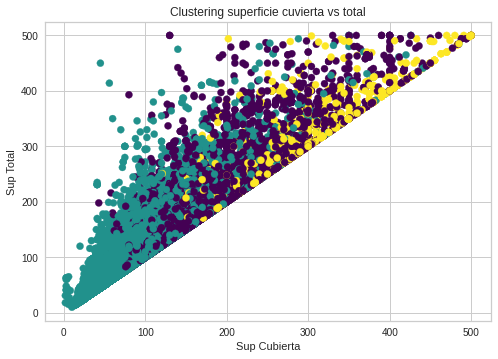

In [199]:
plt.scatter(ds_kmeans.property_surface_covered, ds_kmeans.property_surface_total, c=preds_K3, s=50, cmap='viridis')
plt.title("Clustering superficie cuvierta vs total")
plt.xlabel("Sup Cubierta")
plt.ylabel("Sup Total")
plt.show()

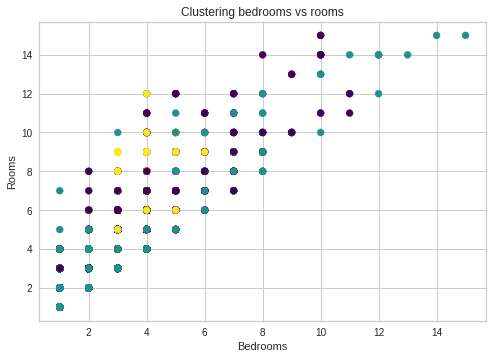

In [200]:
plt.scatter(ds_kmeans.property_bedrooms, ds_kmeans.property_rooms, c=preds_K3, s=50, cmap='viridis')
plt.title("Clustering bedrooms vs rooms")
plt.xlabel("Bedrooms")
plt.ylabel("Rooms")
plt.show()

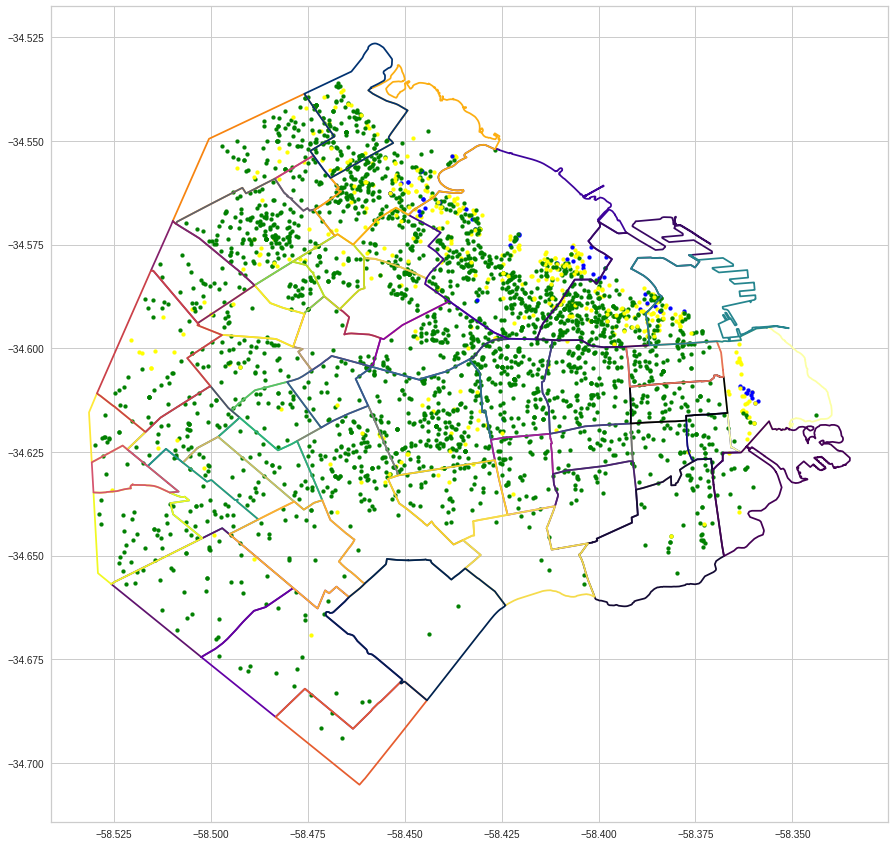

El porcentaje de outsiders dentro de la proporcion pedida de la muestra es: 0.0


In [201]:
graficar_puntos_en_caba(ds_kmeans.longitud, ds_kmeans.latitud, clusters=preds_K3, proporcion=0.05, outsiders=False, tamano_de_punto=15)

Volvemos a notar una agrupacion mas fuerte en la parte limite norte, pero volvemos a considerarla insignificante.

En base a los graficos observados concluimos que, tanto para 2 clusters como 3, el precio es el factor mas importante en clusterizacion y solo la variacion del mismo genera los diferente clusters sin importar tanto los diferentes valores que puedan llegar a tomar las otras variables.

A pesar de observar una marcada clusterizacion en base a property-price y teniendo en cuenta las anteriores columnas que fueron las que utilizamos para realizar el agrupamiento mediante el metodo de kmeans, podemos concluir en que otros posibles candidatos para el agrupamiento podrian haber sido los siguientes:

* property_rooms: si bien se espera que abunde la cantidad de propiedades con 1 o 2 ambientes, al estar ubicados en Capital Federal, podemos encontrar una predominacion de monoambientos lo que puede llegar a generara este grupo se separe de los demas y que los otros dos cluster se dividan en 2,3 ambientes y mas de 3 ambientes. 

* property_surface_covered: teniendo en cuenta que contamos con solo tres tipos de viviendas en el dataset, podemos concluir que una separacion en 3 clusters podria ser en base al tipo de vivienda, es decir casa, ph o departamento. Si bien esta variable no refleja estos 3 datos por separado, sabemos que suele haber una gran relacion entre la diferencia de los metros que abarca una casa con un ph o departamento.


#Clasificación

##Construcción del Target

Primero creamos la columna precio por metro cuadrado, dividiendo el precio por la superficie total para cada fila.

Medidas de resumen para la variable pxm2:
    	Media: 2375.974450423722
    	q1: 1773.0
    	Mediana: 2228.0
    	q3: 2754.0
    	Moda: 0    2500.0
dtype: float64


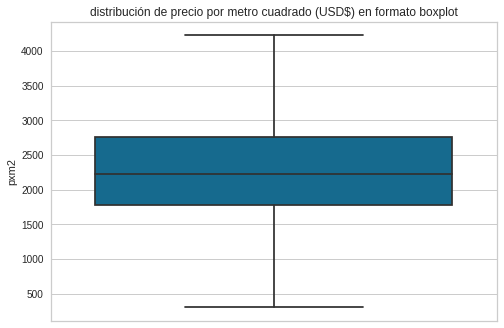

In [202]:
x_train['pxm2'] = (x_train.property_price / x_train.property_surface_total)
x_train['pxm2'] = x_train['pxm2'].round(0)

x_test['pxm2'] = (x_test.property_price / x_test.property_surface_total)
x_test['pxm2'] = x_test['pxm2'].round(0)

medidas_de_resumen = mostrar_medidas_resumen('pxm2', ylabel="precio por metro cuadrado (USD$)", df=x_train)

####Dividir la variable pxm2 en 3 *intervalos*

##### Igual cantidad de observaciones

Dividimos la variable pxm2 en igual cantidad de observaciones.

In [203]:
x_train['tipo_precio_1'] = pd.qcut(x_train['pxm2'], 3, labels=list('ABC'))

La función qcut, en general, divide una variable específica en la cantidad de intervalos solicitada. En este caso, fueron requeridos 3 intervalos (A,B,C). En esta categorización se tiene la premisa de que cualquier registro que tenga una categorización de tipo de precio A, no pueda tener un valor de pxm2 superior a aquellos registros con una categorización de tipo de precio B o C. A su vez, todo registro categorizado con un tipo_de_precio B, no tendrá un valor de pxm2 inferior a uno categorizado con A ni con C. Como consecuencia, los categorizados como C, nunca tendrán valores inferiores en pxm2 a los categorizados como A y B.

En síntesis, se cumple la regla: A < B < C.  

Por este motivo, tomamos la decisión de reemplazar 
* A: low price
* B: medium price 
* C: high price


In [204]:
x_train.loc[:,"tipo_precio_1"].replace(to_replace=['A','B','C'],value=['low_price','medium_price', 'high_price'],inplace=True)

Mostramos la distribucion de la nueva variable creada, tipo_precio_1

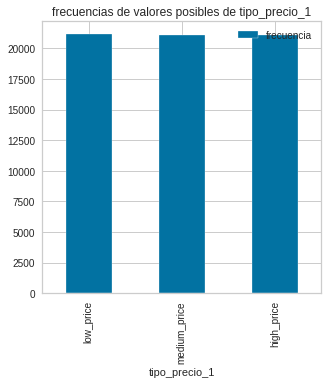

In [205]:
mostrar_frecuencias("tipo_precio_1", 5, 5, x_train)

Vemos que, al dividir la variable pxm2 en tres intervalos con igual cantidad de observaciones y luego creamos la variable tipo_precio_1 con esas mismas categorias, la distribucion es gran medida equitativa.

#####1: 25% de las observaciones, 2: 50% siguiente, 3: 25% restante

Tomamos las medidas calculadas anteriormente de q1, q2 (mediana) y q3 para pxm2

Medidas de resumen para la variable pxm2:
    	Media: 2375.974450423722
    	q1: 1773.0
    	Mediana: 2228.0
    	q3: 2754.0
    	Moda: 0    2500.0
dtype: float64


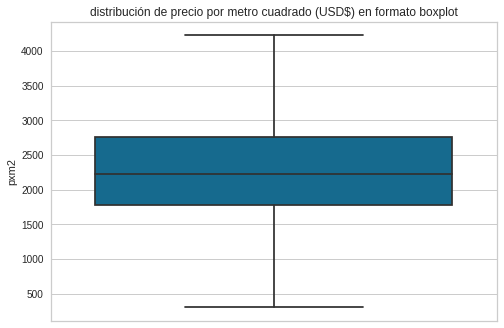

In [206]:
medidas_de_resumen = mostrar_medidas_resumen('pxm2', ylabel="precio por metro cuadrado (USD$)", df=x_train)
q1 = medidas_de_resumen[0]
q2 = medidas_de_resumen[1]
q3 = medidas_de_resumen[2]

In [207]:
total_filas = x_train.shape[0]
print(f"Porcentaje de pxm2 menores al q1: {x_train[x_train.pxm2 < q1].shape[0]*100/ total_filas}%")
print(f"Porcentaje de pxm2 entre q1 y q3: {x_train[(x_train.pxm2 < q3) & (x_train.pxm2 > q1)].shape[0]*100 / total_filas}%")
print(f"Porcentaje de pxm2 mayores al q3: {x_train[x_train.pxm2 > q3].shape[0]*100 / total_filas}%")

Porcentaje de pxm2 menores al q1: 24.995660201682263%
Porcentaje de pxm2 entre q1 y q3: 49.953445799864284%
Porcentaje de pxm2 mayores al q3: 24.984613442328026%


Podemos ver que mantienen los porcentajes que se solicitan (25%, 50% y 25%)

Luego, categorizamos la variable pxm2 segun los intervalos calculados y la asignamos a la columna "tipo_precio_2".

In [208]:
def categorise(row, q1, q2, q3):  
    if row['pxm2'] <= q1:
        return 'low_price'
    elif row['pxm2'] > q1 and row['pxm2'] <= q3:
        return 'medium_price'
    elif row['pxm2'] > q3:
        return 'high_price'

In [209]:
x_train['tipo_precio_2'] = x_train.apply(lambda row: categorise(row, q1, q2, q3), axis=1)

Mostramos la distribucion de la nueva variable creada, tipo_precio_2.

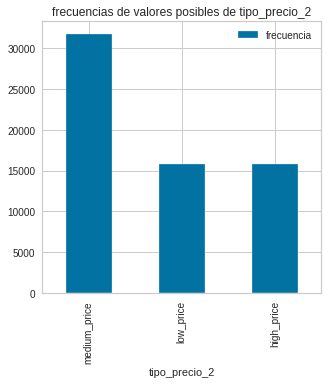

In [210]:
mostrar_frecuencias("tipo_precio_2", 5, 5, x_train)

Como utilizamos los q1 y q3 como limites de los intervalos para la categoria de tipo de precio, reconocemos que medium_price entonces queda con una frecuencia del 50% en el dataset.

###Pxm2 relativa a cada tipo de propiedad, intervalos cuartilicos.

Filtraremos por cada tipo de propiedad y luego dividiremos cada uno de estos filtrados como lo hicimos en el punto anterior. Primero filtramos por casa. 

#### Casa

In [211]:
filtrado_casa = x_train[x_train['property_type'] == 'Casa']
total_filas = filtrado_casa.shape[0]
print(f"Cantidad de registros de Casa: {total_filas}")

Cantidad de registros de Casa: 2439


Medidas de resumen para la variable pxm2:
    	Media: 1577.6740467404675
    	q1: 1109.5
    	Mediana: 1463.0
    	q3: 1879.5
    	Moda: 0     900.0
1    1636.0
2    1753.0
dtype: float64


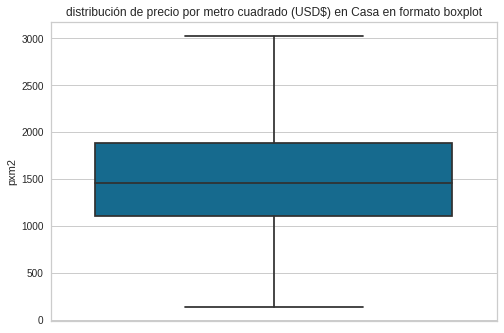

In [212]:
medidas_de_resumen = mostrar_medidas_resumen('pxm2', ylabel="precio por metro cuadrado (USD$) en Casa", df=filtrado_casa)
q1_casa = medidas_de_resumen[0]
q2_casa = medidas_de_resumen[1]
q3_casa = medidas_de_resumen[2]

Luego, categorizamos la variable pxm2 segun los intervalos calculados

In [213]:
filtrado_casa['tipo_precio_casa'] = filtrado_casa.apply(lambda row: categorise(row, q1_casa, q2_casa, q3_casa), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Mostramos la distribucion del precio por metro cuadrado para las casas

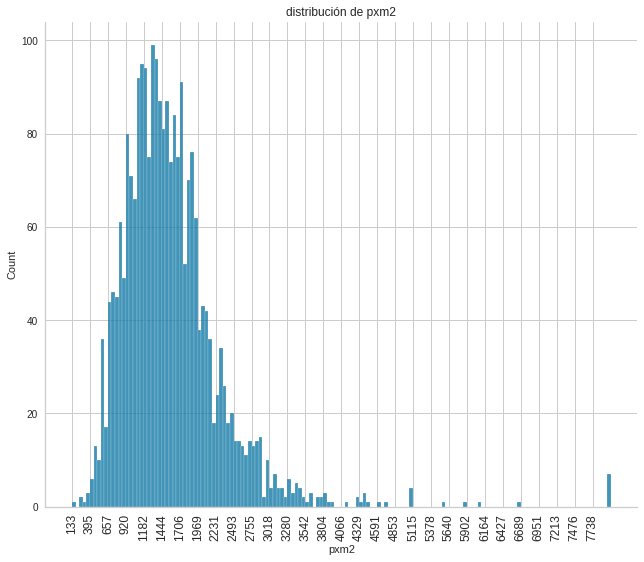

In [214]:
mostrar_distribuciones_cuantitativas("pxm2", ds=filtrado_casa, figsize=(10, 8), bins=150, espaciado=5)

Mostramos la distribucion de la nueva variable creada, tipo_precio_casa

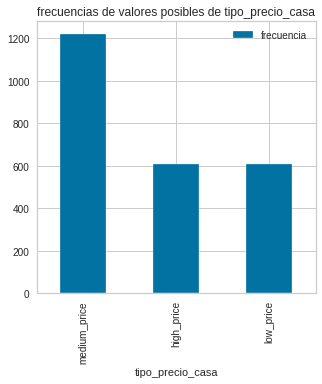

In [215]:
mostrar_frecuencias("tipo_precio_casa", 5, 5, filtrado_casa)

####Departamento

Luego filtramos por departamento

In [216]:
filtrado_depto = x_train[x_train['property_type'] == 'Departamento']
total_filas = filtrado_depto.shape[0]
print(f"Cantidad de registros de Departamento: {total_filas}")

Cantidad de registros de Departamento: 54639


Medidas de resumen para la variable pxm2:
    	Media: 2499.2370101941838
    	q1: 1904.0
    	Mediana: 2333.0
    	q3: 2846.0
    	Moda: 0    2500.0
dtype: float64


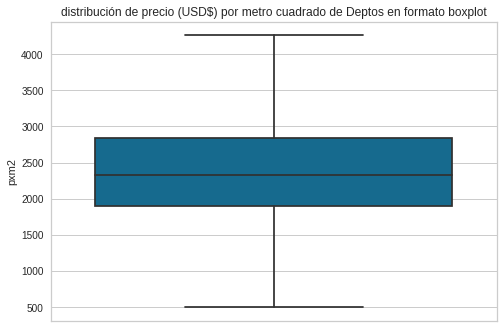

In [217]:
medidas_de_resumen = mostrar_medidas_resumen('pxm2', ylabel="precio (USD$) por metro cuadrado de Deptos", df=filtrado_depto)
q1_depto = medidas_de_resumen[0]
q2_depto = medidas_de_resumen[1]
q3_depto = medidas_de_resumen[2]

Luego, categorizamos la variable pxm2 segun los intervalos calculados

In [218]:
filtrado_depto['tipo_precio_depto'] = x_train.apply(lambda row: categorise(row, q1_depto, q2_depto, q3_depto), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Mostramos la distribucion del precio por metro cuadrado para los departamentos

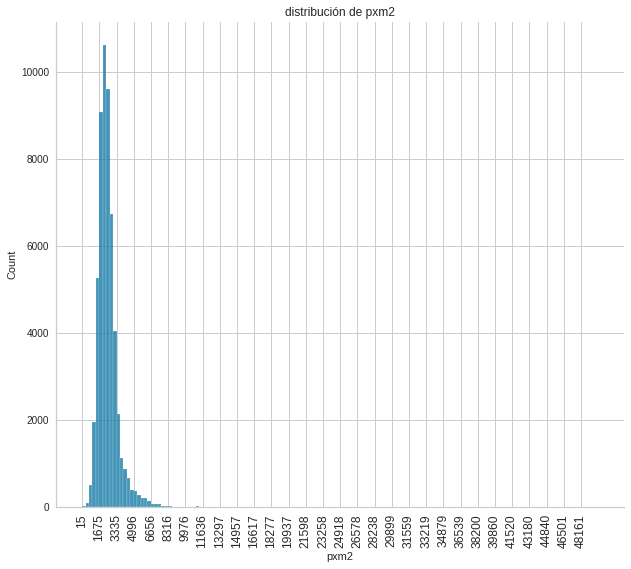

In [219]:
mostrar_distribuciones_cuantitativas("pxm2", ds=filtrado_depto, figsize=(10, 8), bins=150, espaciado=5)

Mostramos la distribucion de la nueva variable creada, tipo_precio_departamento

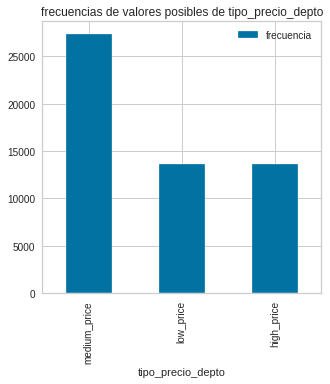

In [220]:
mostrar_frecuencias("tipo_precio_depto", 5, 5, filtrado_depto)

####PH

Luego filtramos por ph

In [221]:
filtrado_ph = x_train[x_train['property_type'] == 'PH']
total_filas = filtrado_ph.shape[0]
print(f"Cantidad de registros de PH: {total_filas}")

Cantidad de registros de PH: 6289


Medidas de resumen para la variable pxm2:
    	Media: 1614.6629034822706
    	q1: 1243.0
    	Mediana: 1565.0
    	q3: 1935.0
    	Moda: 0    1667.0
dtype: float64


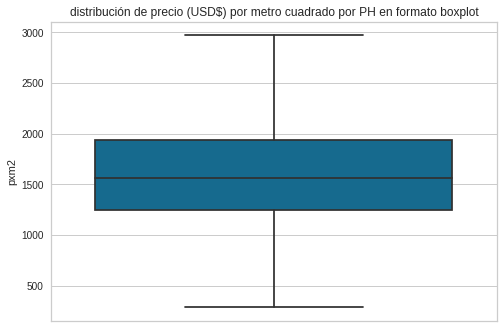

In [222]:
medidas_de_resumen = mostrar_medidas_resumen('pxm2', ylabel="precio (USD$) por metro cuadrado por PH", df=filtrado_ph)
q1_ph = medidas_de_resumen[0]
q2_ph = medidas_de_resumen[1]
q3_ph = medidas_de_resumen[2]

Luego, categorizamos la variable pxm2 segun los intervalos calculados

In [223]:
filtrado_ph['tipo_precio_ph'] = x_train.apply(lambda row: categorise(row, q1_ph, q2_ph, q3_ph), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Mostramos la distribucion del precio por metro cuadrado para los ph's:

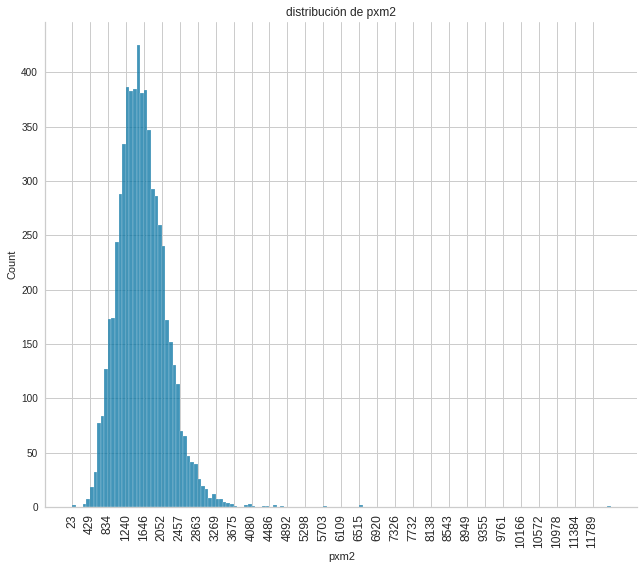

In [224]:
mostrar_distribuciones_cuantitativas("pxm2", ds=filtrado_ph, figsize=(10, 8), bins=150, espaciado=5)

Mostramos la distribucion de la nueva variable creada, tipo_precio_ph

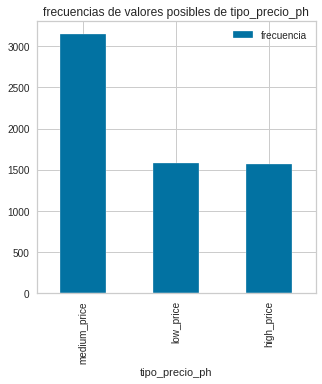

In [225]:
mostrar_frecuencias("tipo_precio_ph", 5, 5, filtrado_ph)

Una vez habiendo hecho la separación por tipo de propiedad y realizado la clasificación de precios correspondiente, procedemos a concatenar los filtrados de casa, departamento y ph, para generar un tipo_precio genérico.

Sumaremos esta columna en los data sets de entrenamiento y testeo, tanto de los generales como de los de PCA.

In [226]:
ds_concatenado = pd.concat([filtrado_ph.tipo_precio_ph, filtrado_casa.tipo_precio_casa, filtrado_depto.tipo_precio_depto])
ds_concatenado = ds_concatenado.sort_index()

# Ordenamos y_train para que coincidan los indices tanto en x_train como y_train
x_train = x_train.sort_index()
y_train = y_train.sort_index()

# Debemos ordenar los indices de los sets de pca para seguir la misma logica 
ds_pca = ds_pca.sort_index()

x_train['tipo_precio_generico'] = ds_concatenado

In [227]:
#Repetimos el proceso con los sets de test 
filtrado_test_casa = x_test[x_test['property_type'] == 'Casa']
filtrado_test_casa['tipo_precio_casa'] = x_test.apply(lambda row: categorise(row, q1_casa, q2_casa, q3_casa), axis=1)

filtrado_test_depto = x_test[x_test['property_type'] == 'Departamento']
filtrado_test_depto['tipo_precio_depto'] = x_test.apply(lambda row: categorise(row, q1_depto, q2_depto, q3_depto), axis=1)

filtrado_test_ph = x_test[x_test['property_type'] == 'PH']
filtrado_test_ph['tipo_precio_ph'] = x_test.apply(lambda row: categorise(row, q1_ph, q2_ph, q3_ph), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [228]:
ds_test_concatenado = pd.concat([filtrado_test_ph.tipo_precio_ph, filtrado_test_casa.tipo_precio_casa, filtrado_test_depto.tipo_precio_depto])
ds_test_concatenado = ds_test_concatenado.sort_index()

# Ordenamos y_test para que coincidan los indices tanto en x_test como y_test
x_test = x_test.sort_index()
y_test = y_test.sort_index()

# Debemos ordenar los indices de los sets de pca para seguir la misma logica 
ds_pca_test = ds_pca_test.sort_index()

x_test['tipo_precio_generico'] = ds_test_concatenado

###Selección de una de las alternativas 

Consideramos que, teniendo en cuenta que analizamos barrios dentro de la Capital Federal, la mejor alternativa a la hora de clasificar por un tipo de precio, sería la de clasificar por tipo de propiedad y luego hacer una separacion de precio por metro cuadrado. Esto es debido a que hay factores que pueden influir a la hora de la tasación de la propiedad, y el tipo de vivienda es una de ellas. 

Algunos de los factores más significativos podrían ser el hecho de que un departamento suele contar con servicios de mantenimiento y seguridad comunes a todo el edificio (expensas), lo cual genera un incremento del precio. Estos servicios en las casas o phs no son muy comunes, lo cual hace a las viviendas más inseguras y decrementa su precio. 

Por otro lado, las casas o phs generalmente tienen mayor cantidad de metros cuadrados que un departamento, y esto es un factor importante a la hora de considerar el precio de la propiedad. 

A su vez, es más frecuente que se tenga en las casas un espacio al aire libre más grende que en los demás tipos de propiedades. Esto podría llegar a incrementar el precio de las mismas. 



###Comparacion de la alternativa seleccionada con la división en 3 grupos obtenida utilizando agrupamiento por K Means

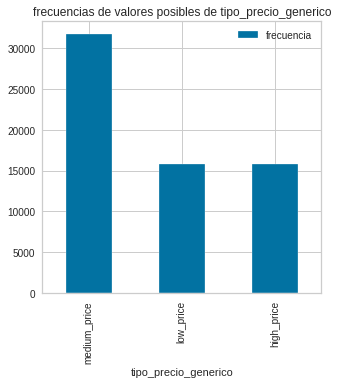

In [229]:
mostrar_frecuencias("tipo_precio_generico", 5, 5, x_train)

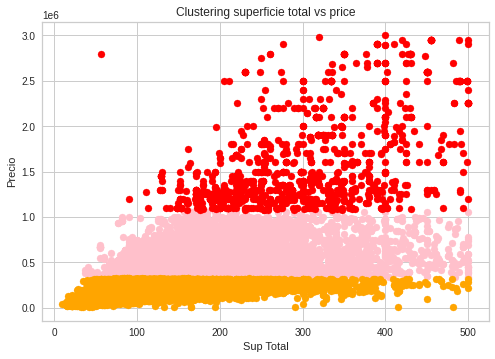

In [230]:
plt=reload(plt)

preds_k3 = clusterer_k3.fit_predict(ds_kmeans)
ds_kmeans["preds_k3"]=preds_k3

k3_0=ds_kmeans[ds_kmeans["preds_k3"] == 0]
k3_1=ds_kmeans[ds_kmeans["preds_k3"] == 1]
k3_2=ds_kmeans[ds_kmeans["preds_k3"] == 2]

plt.scatter(k3_0.property_surface_total, k3_0.property_price, color='pink')
plt.scatter(k3_1.property_surface_total, k3_1.property_price, color='orange')
plt.scatter(k3_2.property_surface_total, k3_2.property_price, color='red')
plt.title("Clustering superficie total vs price")
plt.xlabel("Sup Total")
plt.ylabel("Precio")
plt.show()

Se observan los grupos obtenidos por Kmeans, y se distinguen por los siguientes colores segun el numero de cluster obtenido:
* 0: Rosa.
* 1: Naranja.
* 2: Rojo.


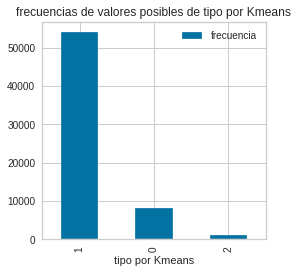

In [231]:
mostrar_frecuencias("tipo por Kmeans", df=pd.DataFrame(preds_k3, columns=["tipo por Kmeans"]))

Observamos como el cluster 1 (Naranja) tiene mayor frecuencia.

En primer lugar analizaremos el caso de la alternativa seleccionada anteriormente, donde se generó la nueva variable tipo_precio_generico a partir de la generación de tres variables de precio: tipo_precio_casa, tipo_precio_ph y tipo_precio_depto (que fueron generadas a partir de una filtración del dataset por tipo de propiedad trabajando con la variable pxm2). 

Podemos ver que en el caso medium_price hay una mayor predominancia de propiedades con un precio dentro del rango de q1 y q3. 

Por otro lado, tanto low_price como high_price se distruyen equitativamente. 

Esto tiene sentido debido a que la separación de los intervalos fue de 25%, 50%, 25% luego de haber realizado el filtrado por tipo de propiedad. 

Por otro lado en cuanto a la división en 3 grupos obtenida utilizando el agrupamiento por KMeans, vemos que la mayor predominancia se da en el cluster 1 (Naranja). Viendo el grafico, podemos notar que esos tienen los precios mas bajos. Podemos, entonces, concluir en que la mayor predominancia se da en propiedades con un tipo de precio bajo (low_price) y esto no sucede en la alternativa elegida, debido a que predominan las propiedades con un precio medio (medium_price).

En segundo lugar, teniendo en cuenta la distribución de los puntos observada en el gráfico de Kmeans para los grupos superior e inferior, si bien parece que el grupo superior abarca una mayor cantidad de puntos, en el grupo inferior se puede notar que hay una mayor densidad. Lo cual genera que esta última distribución presenta una mayor cantidad de muestras. Esta conclusión no solo se verifica en el gráfico de kmeans sino también en el gráfico de barras.

Por estas razones, se verifica que nuestro target sigue en gran parte los criterios de agrupacion por Kmeans, por lo que podemos definir a la variable tipo_precio_generico como un buen target.

### Mapa CABA por tipo de precio

Procedemos a graficar los distintos tipos de precio en el mapa de CABA. 

In [232]:
#Hacemos numerica la variable para poder diferenciar los clusters al colorear el mapa
cleanup_nums = {"tipo_precio_generico":     {"low_price": 0, "medium_price": 1, "high_price": 2}}
ds_precio_generico_aux = x_train.replace(cleanup_nums)

Graficamos los puntos segun las predicciones de Kmeans. Los colores no tienen significado, simplemente se asignan de la siguiente forma segun el cluster recibido: 
Decidimos graficar las propiedades de la siguiente forma:
* 0: Amarillo.
* 1: Verde.
* 2: Azules.

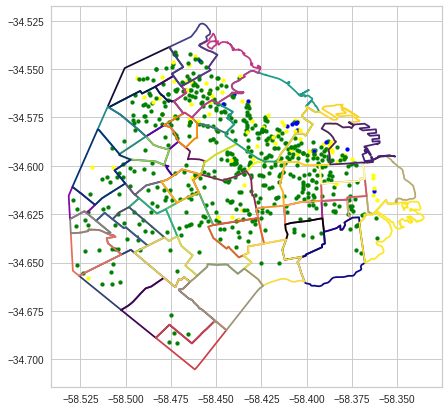

El porcentaje de outsiders dentro de la proporcion pedida de la muestra es: 0.0


In [233]:
graficar_puntos_en_caba(ds_kmeans.longitud, ds_kmeans.latitud, clusters=preds_k3, proporcion=0.01, outsiders=False, tamano_de_punto=15, istamano=True, tamano=(7,7))

Notamos los puntos azules en el norte. Son azules, y conociendo el codigo de la funcion, sabemos que los azules son aquellos que la funcion recibe con un valor de cluster de 2. 

Graficamos los puntos segun nuestra categorizacion.
Los colores siguen la misma logica segun el numero recibidio, pero por la asignacion hecha anteriormente sabemos que:
* 0: Bajo: Amarillo.
* 1: Medio: Verde.
* 2: Alto: Azules.

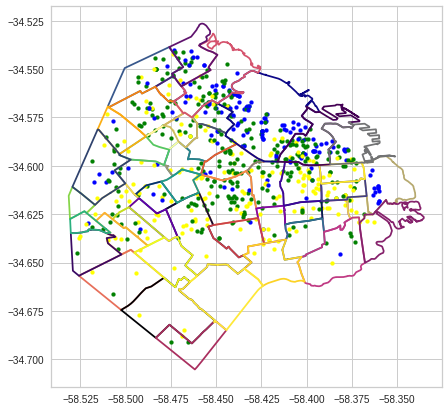

El porcentaje de outsiders dentro de la proporcion pedida de la muestra es: 0.0


In [234]:
graficar_puntos_en_caba(ds_precio_generico_aux.longitud, ds_precio_generico_aux.latitud, clusters=ds_precio_generico_aux.tipo_precio_generico, proporcion=0.01, outsiders=False, tamano_de_punto=15, istamano=True, tamano=(7,7))

Tenemos dos gráficos: el primero son las predicciones de kmeans. Mientras que el segundo es el mapa de la Capital Federal con una formación de clusters a partir del tipo de precio de una propiedad. 

Vemos que, haciendo una comparación entre ambos, se puede notar una relación entre las propiedades que se encuentran al este y noreste de Capital Federal. Cuando observamos estas propiedades en el segundo grafico, vemos que estas son las azules, las cuales representan los precios altos. 

Observando el primer grafico, vemos tambien una clusterizacion en el norte y noreste, la cual Kmeans predijo como 2 (por eso se representan azules). 

Por esta relacion podemos tambien concluir que el cluster 2 predicho por kmeans podria tener una relacion con nuestro metodo de categorizacion segun precio alto.





##Entrenamiento y Predicción

En principio, hacemos one hot encoding para poder transformar las variables categóricas a variables dummies. Esto únicamente lo vamos a hacer con property_type, ya que no debemos utilizar las variables relacionadas a precio y porque las demás variables no aportan información relevante ya que algunas tienen muchas categorías (por ejemplo, place_l3) y otras solo una (por ejemplo, property_currency)

In [235]:
#One hot encoding para variables categoricas
train_con_dummi = pd.get_dummies(x_train, columns=["property_type"], drop_first=False)
test_con_dummi = pd.get_dummies(x_test, columns=["property_type"], drop_first=False)

In [236]:
x_train_target = train_con_dummi.drop(columns = ['place_l2', 'id', 'place_l3', 'operation', 'property_title', 'property_currency', 'tipo_precio_1', 'tipo_precio_2', 'tipo_precio_generico', 'property_price', 'pxm2'], inplace=False)
x_test_target = test_con_dummi.drop(columns = ['place_l2', 'id', 'place_l3', 'operation', 'property_title', 'property_currency', 'property_price','tipo_precio_generico', 'pxm2'], inplace=False)

In [237]:
y_train_target = train_con_dummi['tipo_precio_generico'].copy()
y_test_target = test_con_dummi['tipo_precio_generico'].copy()

Para formar todos los arboles (modelo 1, 2 y 3) , utilizamos la métrica f1_score debido a que se utiliza para combinar las medidas de precision y recall en un sólo valor. Esto es práctico porque hace más fácil el poder comparar el rendimiento combinado de la precisión y la exhaustividad entre varias soluciones.

En cuanto los folds utilizados, usaremos 5, para todos los modelos, ya que un número alto de folds generaría un tiempo muy alto de consumo y sería muy costoso computacionalmente. Por otro lado, tener un número de folds bajo generaría un error de predicción muy similar la mayoría del tiempo, lo cual puede ser útil. Es por esta razón que consideramos incluir un número de folds intermedio para poder balancear ambos casos mencionados. 

In [238]:
from sklearn import tree
from sklearn.tree import export_text
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score
from sklearn.tree import export_graphviz
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

In [239]:
def cross_validation_tree_train(params_grid=None,folds=5, base_tree=None, scorer_fn=None, n=10, x_ds=x_train_target, y_ds=y_train_target): 
  #Conjunto de parámetros que quiero usar
  if(params_grid == None):
    params_grid = {'criterion':['gini','entropy'],
                  'ccp_alpha':np.linspace(0,0.05,n), 
                  'max_depth':list(range(1,10))},

  #Kfold estratificado
  kfoldcv = StratifiedKFold(n_splits=folds, shuffle=True, random_state=2)#preguntar si el shuffle rompe algo

  #Random Search Cross Validation
  randomcv = RandomizedSearchCV(estimator=base_tree,
                                param_distributions = params_grid,
                                scoring=scorer_fn,
                                cv=kfoldcv,
                                n_iter=n,
                                return_train_score= True,
                                random_state=2) 

  #Busco los hiperparamtros que optimizan F1 Score
  randomcv.fit(x_ds, y_ds)

  return randomcv

In [240]:
def encontrar_mejor_metrica_de_cv(randomcv):  
  #creo una lista que contiene todas las metricas obtenidas en todos los spits de cv
  metricas_totales = []
  metricas_totales.extend(randomcv.cv_results_['split0_test_score'])
  metricas_totales.extend(randomcv.cv_results_['split1_test_score'])
  metricas_totales.extend(randomcv.cv_results_['split2_test_score'])
  metricas_totales.extend(randomcv.cv_results_['split3_test_score'])
  metricas_totales.extend(randomcv.cv_results_['split4_test_score'])

  print('La mejor metrica obtenida mediante cv en train es de:',max(metricas_totales))

  return metricas_totales,max(metricas_totales)

In [241]:
import collections
def identificar_clasificacion(y_pred, tabla):
  counts = collections.Counter(y_pred)
  
  claves = list(counts.keys())
  claves[0]

  clase_0 = tabla[0][0]+tabla[1][0]+tabla[2][0]
  clase_1 = tabla[0][1]+tabla[1][1]+tabla[2][1]
  clase_2 = tabla[0][2]+tabla[1][2]+tabla[2][2]

  # for i in range(len(claves)):  
  #   if(counts[claves[i]] == clase_0):
  #     print(f'La clase {claves[i]} es: 0 ')
  #   elif(counts[claves[i]] == clase_1):
  #     print(f'La clase {claves[i]} es: 1 ')
  #   else:  
  #     print(f'La clase {claves[i]} es: 2 ')

  lista = ['a', 'b', 'c']

  for i in range(len(claves)):  
    if(counts[claves[i]] == clase_0):
      lista[0] = claves[i]
    elif(counts[claves[i]] == clase_1):
      lista[1] = claves[i]
    else:
      lista[2] = claves[i]

  return lista


In [242]:
def mostrar_resultados_cv(params, score, arbol):
  print(f"Para {arbol}")
  print(f"\tMejores parametros: \n\t\t{params}")
  print(f"\Best Score: \n\t\t{score}")

###Modelo 1: Arbol de Decisión

#### Con DataSet General

In [243]:
#Clasificador
dt = DecisionTreeClassifier()

#Metrica
dt_scorer_fn = make_scorer(sk.metrics.f1_score, average = 'macro')

dt_randomcv = cross_validation_tree_train(base_tree=dt, scorer_fn=dt_scorer_fn)

In [244]:
mostrar_resultados_cv(dt_randomcv.best_params_, dt_randomcv.best_score_, "Arbol de Decision")

Para Arbol de Decision
	Mejores parametros: 
		{'max_depth': 5, 'criterion': 'entropy', 'ccp_alpha': 0.0}
\Best Score: 
		0.5437750568101953


In [245]:
dt_metricas, dt_mejor_metrica = encontrar_mejor_metrica_de_cv(dt_randomcv) 

La mejor metrica obtenida mediante cv en train es de: 0.5500575769747108


Al hacer CV con el conjunto de train obtuvimos el best_score_. Este es la media a todas mejores métricas obtenidas en cada uno de los splits para todos los juegos de hiper parámetros con distintas particiones del dataset de train en Cross Validation. Sin embargo, hay métricas en los splits individuales que, como vimos, son mejores.


In [246]:
#Creo el árbol con los mejores hiperparámetros
dt=DecisionTreeClassifier(random_state=2).set_params(**dt_randomcv.best_params_)

#Entreno el arbol en todo el set
dt.fit(x_train_target,y_train_target)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2)

Luego de crear el arbol con los mejores hiperparámetros, mostramos el arbol generado en un gráfico

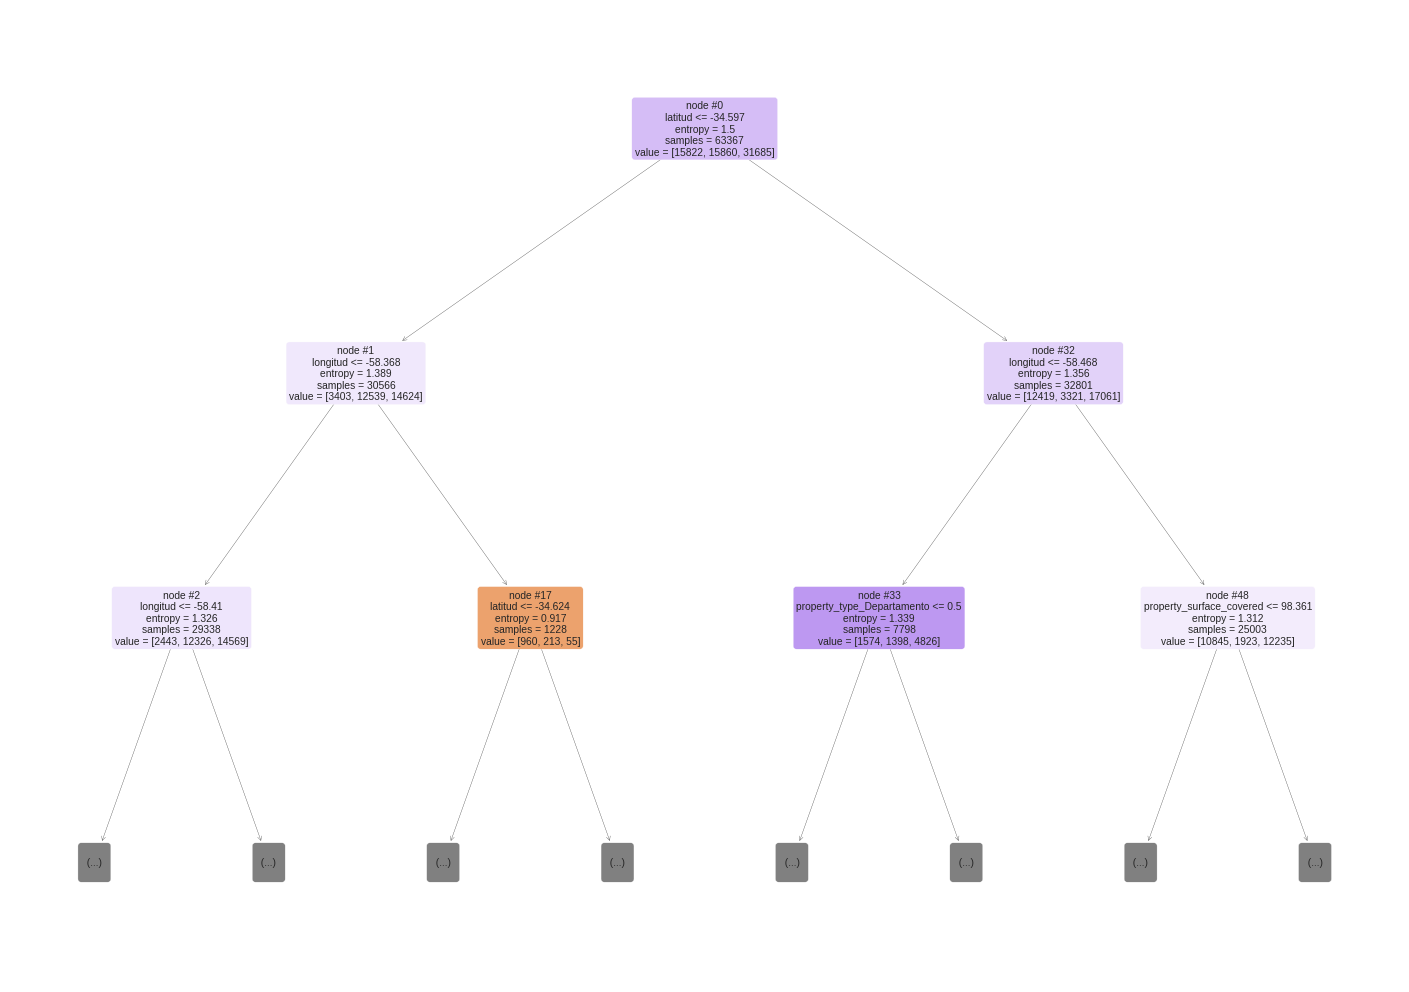

In [247]:
plt.figure(figsize=(25,18))
dt_tree_plot_completo=tree.plot_tree(dt,max_depth=2,feature_names=x_train_target.columns.to_list(),filled=True,rounded=True, node_ids=True)
plt.show(dt_tree_plot_completo)

Analizaremos las bifurcaciones del arbol acompañandonos con el mapa que sigue a este analisis. 

Como podemos observar, de los atributos seleccionados se muestran en el árbol latitud, longitud y property_type_departamento. De esta forma, podemos deducir que las ramificaciones son producto de:

* La primer bifurcación haría referencia a una separación norte-sur (al tratarse de la latitud, que si bien va de este a oeste, se traza una linea que divide de norte a sur), dado que las propiedades que se encuentran en los barrios que estan en el norte suelen ser mas costosas. Esto podría generar una separación a la hora de decidir el tipo de precio de la propiedad. Debido a esta razón se traza la línea roja y se divide en secciones A y B.

* Siguiendo las ramificaciones, si nos ubicamos en la parte izquierda del árbol en el segundo nivel vemos que se genera otra particion representada por la linea verde. Sabiendo que en la sección 1 se encuentra puerto madero, que es uno de los barrios mas caros de la Capital federal, tiene sentido que se genere esta separacion.

* Siguiendo las separaciones, en la parte izquierda del arbol del tercer nivel se genera otra separación, representada por la linea violeta. Vemos que acá hay dos secciones: 2.1 y 2.2 Luego se continua con una nueva bifurcación.

* Ahora, posicionandonos en el sector derecho del arbol en el tercer nivel, vemos que se genera una separacion representada por la linea negra (latitud), donde se dividen dos sectores con diferencias en los precios de las propiedades representativa. En el sector de arriba vamos a tener el barrio de puerto madero, que es uno de los barrios con propiedades más costosas de la Capital Federal. Podemos ver la división en las secciones 1.1 y 1.2.

* Por otro lado, tenemos la bifurcación del primer nivel del lado derecho. En este caso vamos a ver una diferencias de precios en las propiedades de los barrios que estan del lado derecho y del lado izquierdo de la linea celeste. Aquí se pueden apreciar las secciones 3 y 4.

* Por último, tendremos una nueva bifurcación en el segundo nivel del lado derecho. Para el caso la sección 3 esta nueva bifurcación va a estar dada por property_type_departamento, lo cual es de esperarse debido a que en la Capital Federal predominan los departamentos, en lugar de las casa o phs. 

* Para el caso de la sección 4, la nueva bifurcación va a estar dada nuevamente por latitud lo cual explica las diferencias de valor entre las propiedades que se encuentran más al sur y mas al norte de la Capital Federal. Así es como se generan las secciones 4.1 y 4.2.

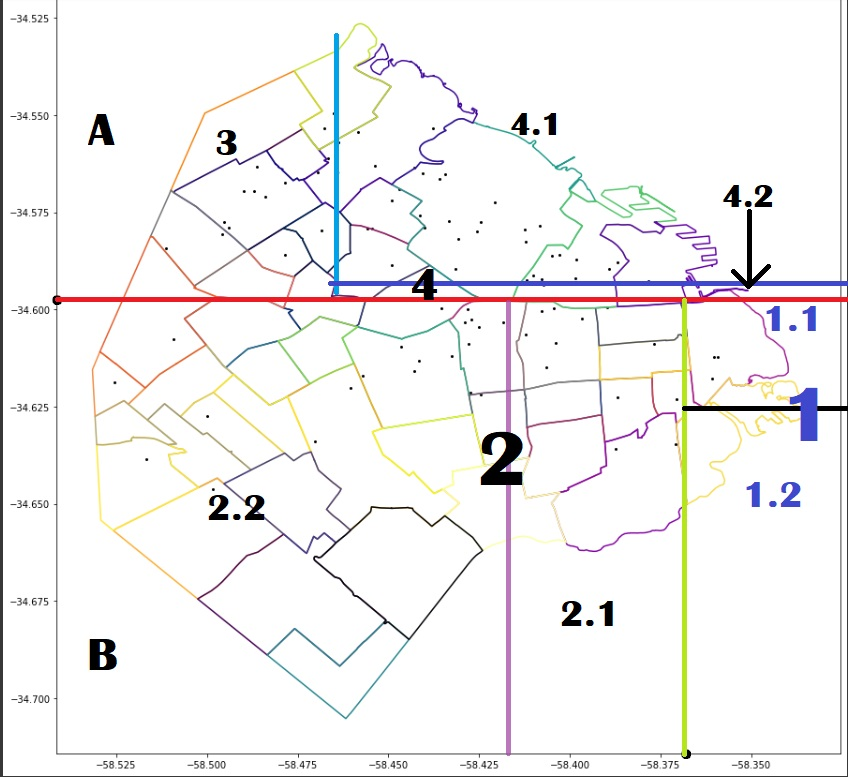

Procedemos a evaluar la performance del árbol en el conjunto de evaluación, describiendo las métricas y mostrando la matriz de confusión

In [248]:
dt_y_pred = dt.predict(x_test_target)#test

[Text(51.0, 0.5, 'True'), Text(0.5, 28.5, 'Predicted')]

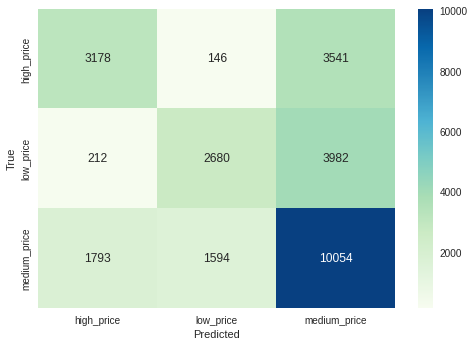

In [249]:
#Creo la matriz de confusión
dt_tabla=confusion_matrix(y_test_target, dt_y_pred)

dt_columnas=identificar_clasificacion(dt_y_pred,dt_tabla)
#Grafico la matriz de confusión
sns.heatmap(dt_tabla,cmap='GnBu',annot=True,fmt='g', yticklabels = dt_columnas, xticklabels = dt_columnas).set(xlabel="Predicted", ylabel="True")

Observamos que se encuentran mas casos en los que se acierte el tipo de precio medium_price (2). Lo cual tiene sentido, recordando que es el tipo de precio que tenia mayor frecuencia en el data set de entrenamiento, por lo que cuenta con mas informacion para predecir, y aparte son mas casos tambien en el data set de test, por lo que inevitablemente habran mas casos estudiados. 

In [250]:
#Calculo las métricas en el conjunto de evaluación
dt_accuracy=accuracy_score(y_test_target,dt_y_pred)
dt_recall=recall_score(y_test_target,dt_y_pred, average='macro')
dt_f1=f1_score(y_test_target,dt_y_pred, average='macro')

print("Accuracy: "+str(dt_accuracy))
print("Recall: "+str(dt_recall))
print("f1 score: "+str(dt_f1))


Accuracy: 0.5854304635761589
Recall: 0.5336042022370867
f1 score: 0.55013782168111


Procedemos a realizar la comparacion de la performance del arbol en el conjunto de evaluacion vs en el conjunto de entrenamiento. 

In [251]:
print("Arbol de Decision: Mejor metrica en train:",dt_mejor_metrica) #mejor metrica del train
print("Arbol de Decision: Metrica en test:",dt_f1) #metrica del test 
print("Arbol de Decision: Diferencia test - train:",(dt_mejor_metrica-dt_f1)) #metrica del test 

Arbol de Decision: Mejor metrica en train: 0.5500575769747108
Arbol de Decision: Metrica en test: 0.55013782168111
Arbol de Decision: Diferencia test - train: -8.024470639922399e-05


#### Con DataSet Reducido por PCA

In [252]:
#Clasificador
dt_pca = DecisionTreeClassifier()

#Metrica
dt_scorer_fn_pca = make_scorer(sk.metrics.f1_score, average = 'macro')

# randomcv = cross_validation_tree_train(base_tree=base_tree, scorer_fn=scorer_fn, x_ds=ds_pca, y_ds=y_train_target)
dt_randomcv_pca = cross_validation_tree_train(base_tree=dt_pca, scorer_fn=dt_scorer_fn_pca, x_ds=ds_pca, y_ds=y_train_target)


In [253]:
mostrar_resultados_cv(dt_randomcv_pca.best_params_, dt_randomcv_pca.best_score_, "Arbol de Decision con PCA")

Para Arbol de Decision con PCA
	Mejores parametros: 
		{'max_depth': 5, 'criterion': 'entropy', 'ccp_alpha': 0.0}
\Best Score: 
		0.3297337508524875


In [254]:
dt_metricas_pca, dt_mejor_metrica_pca = encontrar_mejor_metrica_de_cv(dt_randomcv_pca) 

La mejor metrica obtenida mediante cv en train es de: 0.35183660834933245


In [255]:
#Creo el árbol con los mejores hiperparámetros
dt_pca=DecisionTreeClassifier(random_state=2).set_params(**dt_randomcv_pca.best_params_)

#Entreno el arbol en todo el set
dt_pca.fit(ds_pca,y_train_target)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2)

Luego de crear el arbol con los mejores hiperparámetros, mostramos el arbol generado en un gráfico

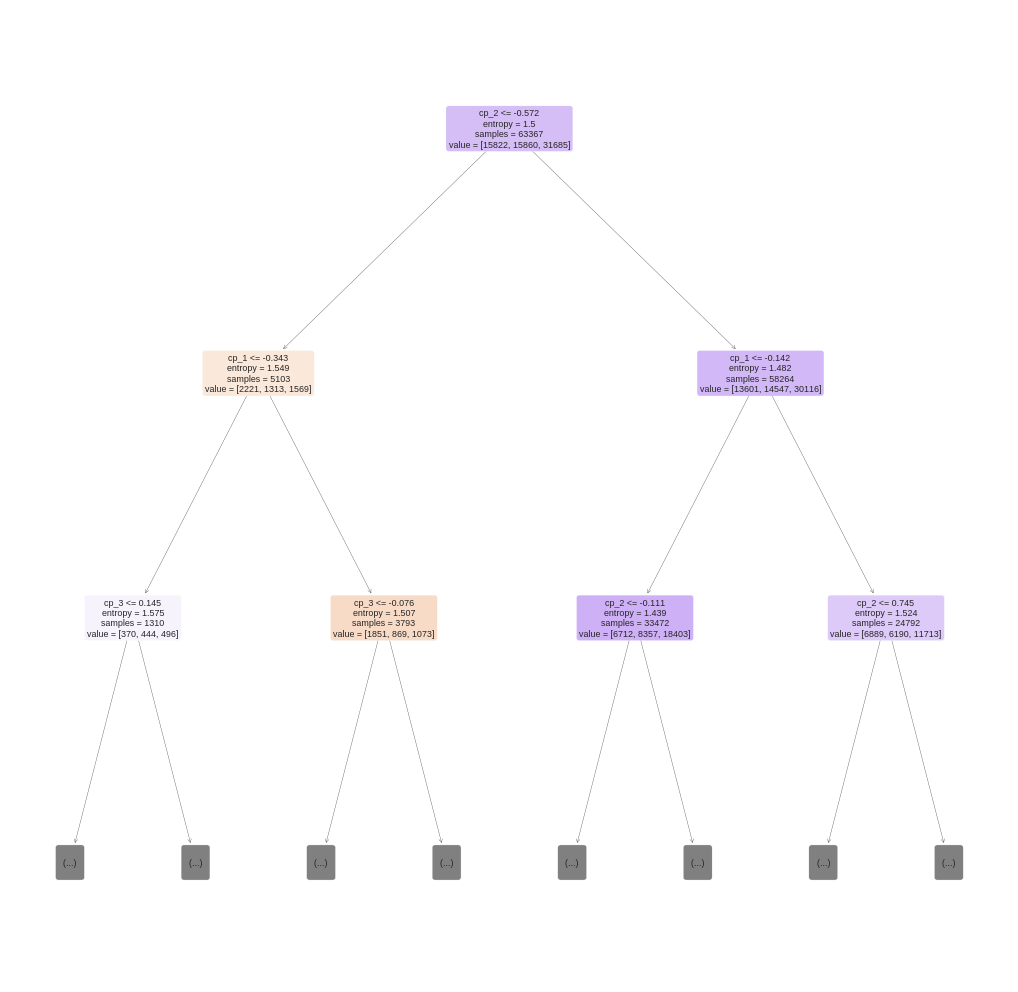

In [256]:
plt.figure(figsize=(18,18))
dt_tree_plot_completo_pca=tree.plot_tree(dt_pca,max_depth=2,feature_names=ds_pca.columns.to_list(),filled=True,rounded=True)
plt.show(dt_tree_plot_completo_pca)

In [257]:
dt_y_pred_pca = dt_pca.predict(ds_pca_test)#test

[Text(51.0, 0.5, 'True'), Text(0.5, 28.5, 'Predicted')]

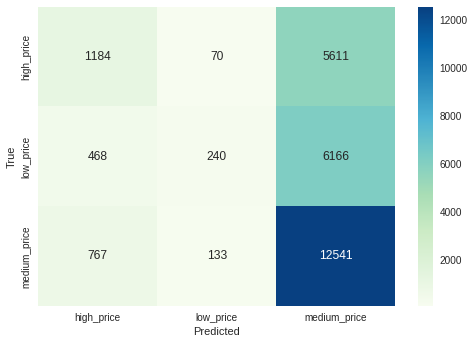

In [258]:
#Creo la matriz de confusión
dt_tabla_pca=confusion_matrix(y_test_target, dt_y_pred_pca)

dt_columnas_pca=identificar_clasificacion(dt_y_pred_pca,dt_tabla_pca)
#Grafico la matriz de confusión
sns.heatmap(dt_tabla_pca,cmap='GnBu',annot=True,fmt='g', yticklabels = dt_columnas_pca, xticklabels = dt_columnas_pca).set(xlabel="Predicted", ylabel="True")

In [259]:
#Calculo las métricas en el conjunto de evaluación
dt_accuracy_pca=accuracy_score(y_test_target ,dt_y_pred_pca)
dt_recall_pca=recall_score(y_test_target, dt_y_pred_pca, average='macro')
dt_f1_pca=f1_score(y_test_target, dt_y_pred_pca, average='macro')

print("Accuracy: "+str(dt_accuracy_pca))
print("Recall: "+str(dt_recall_pca))
print("f1 score: "+str(dt_f1_pca))

Accuracy: 0.5137969094922737
Recall: 0.3801413038651342
f1 score: 0.3283095340702484


Procedemos a realizar la comparacion de la performance del arbol en el conjunto de evaluacion vs en el conjunto de entrenamiento. 

In [260]:
print("Arbol de Decision PCA: Mejor metrica en train:",dt_mejor_metrica_pca) #mejor metrica del train
print("Arbol de Decision PCA: Metrica en test:",dt_f1_pca) #metrica del test 
print("Arbol de Decision PCA: Diferencia test - train:",(dt_mejor_metrica_pca-dt_f1_pca)) #metrica del test 

Arbol de Decision PCA: Mejor metrica en train: 0.35183660834933245
Arbol de Decision PCA: Metrica en test: 0.3283095340702484
Arbol de Decision PCA: Diferencia test - train: 0.02352707427908407


Comparamos las matericas obtenidas con el data set general, y el data set reducido por PCA:

In [261]:
print("Data Set General:")
print("\tMejor metrica en train con ds general:",dt_mejor_metrica) #mejor metrica del train
print("\tMetrica en test con ds general:",dt_f1) #metrica del test 

print("\nData Set PCA:")
print("\tMejor metrica en train con ds pca:",dt_mejor_metrica_pca) #mejor metrica del train
print("\tMetrica en test con ds pca:",dt_f1_pca) #metrica del test 

Data Set General:
	Mejor metrica en train con ds general: 0.5500575769747108
	Metrica en test con ds general: 0.55013782168111

Data Set PCA:
	Mejor metrica en train con ds pca: 0.35183660834933245
	Metrica en test con ds pca: 0.3283095340702484


Obtuvimos mejores metricas con el data set general que por el de PCA, lo cual tiene sentido siendo que siempre con PCA se termina perdiendo informacion al ser registros con informacion reducida.

###Modelo 2: Random Forest

#### Con DataSet General

In [262]:
from sklearn.ensemble import RandomForestClassifier

#Clasificador
rmf = RandomForestClassifier()

#Metrica
rmf_scorer_fn = make_scorer(sk.metrics.f1_score, average = 'macro') 

rmf_randomcv = cross_validation_tree_train(base_tree=rmf, scorer_fn=rmf_scorer_fn)

In [263]:
mostrar_resultados_cv(rmf_randomcv.best_params_, rmf_randomcv.best_score_, "Random Forest con el General")

Para Random Forest con el General
	Mejores parametros: 
		{'max_depth': 5, 'criterion': 'entropy', 'ccp_alpha': 0.0}
\Best Score: 
		0.4995382943321963


In [264]:
rmf_metricas, rmf_mejor_metrica = encontrar_mejor_metrica_de_cv(rmf_randomcv) 

La mejor metrica obtenida mediante cv en train es de: 0.5136680126717534


Como paso siguiente, realizaremos el análisis de la importancia de los atributos:


In [265]:
rmf_best_est = rmf_randomcv.best_estimator_
rmf_feat_imps = rmf_best_est.feature_importances_
rmf_importancia_pred_tupla = sorted(zip(rmf_feat_imps, x_train_target.columns.values), reverse=True)
print("Importancias segun feature:")
sorted(zip(rmf_feat_imps, x_train_target.columns.values), reverse=True)

Importancias segun feature:


[(0.60771710410281, 'latitud'),
 (0.195200742907327, 'longitud'),
 (0.06948575555721365, 'property_surface_covered'),
 (0.051227274607364044, 'property_surface_total'),
 (0.03541167879014002, 'property_type_Departamento'),
 (0.02137304246867345, 'property_type_PH'),
 (0.00974146939858018, 'property_rooms'),
 (0.006531215284312036, 'property_bedrooms'),
 (0.0033117168835796055, 'property_type_Casa')]

In [266]:
rmf_importancia_predictores = pd.DataFrame({'predictor': [rmf_importancia_pred_tupla[0][1]], 'latitud': rmf_importancia_pred_tupla[0][0]})
for i in range(1,len(rmf_importancia_pred_tupla)):
  rmf_importancia_predictores[[rmf_importancia_pred_tupla[i][1]]] = rmf_importancia_pred_tupla[i][0]

rmf_importancia_predictores.drop('predictor', axis='columns', inplace=True)

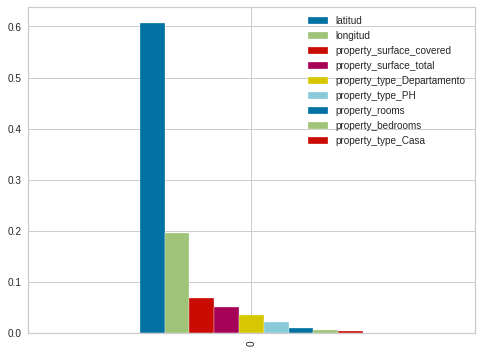

In [267]:
# Graficamos la importancia de los atributos
rmf_importancia_predictores.plot(kind='bar', figsize=(8,6))

Como podemos observar, el atributo latitud es el que mayor importancia tiene. Esto tendria sentido dado que, la latitud permite separar entre regiones norte y sur. Segun sabemos, una propiedad suele tener un precio mas elevado a medida que se encuentra mas al norte.

En segundo lugar tenemos a la longitud, la cual siguiendo la logica anterior, nos permite dividir entre este y oeste. Teniendo en cuenta que el centro de la capital, junto con el barrio mas caro de la misma, se encuentran al este, asumimos que en esta zona hay una mayor cantidad de departamentos y a su vez precios mas elevados, en comparacion al resto. Por este motivo se utiliza este criterio para la categorizacion del tipo de precio.

Con respecto a los otros atributos, vemos que su importancia es lo suficientemente baja, en comparacion a los anteriores, como para considerarlos.

Mostramos la conformación final de uno de los árboles generados

In [268]:
#Creo el árbol con los mejores hiperparámetros
rmf=RandomForestClassifier(random_state=2).set_params(**rmf_randomcv.best_params_)

#Entreno el arbol en todo el set
rmf = rmf.fit(X = x_train_target, y = y_train_target)

In [269]:
rmf_y_pred = rmf.predict(x_test_target)

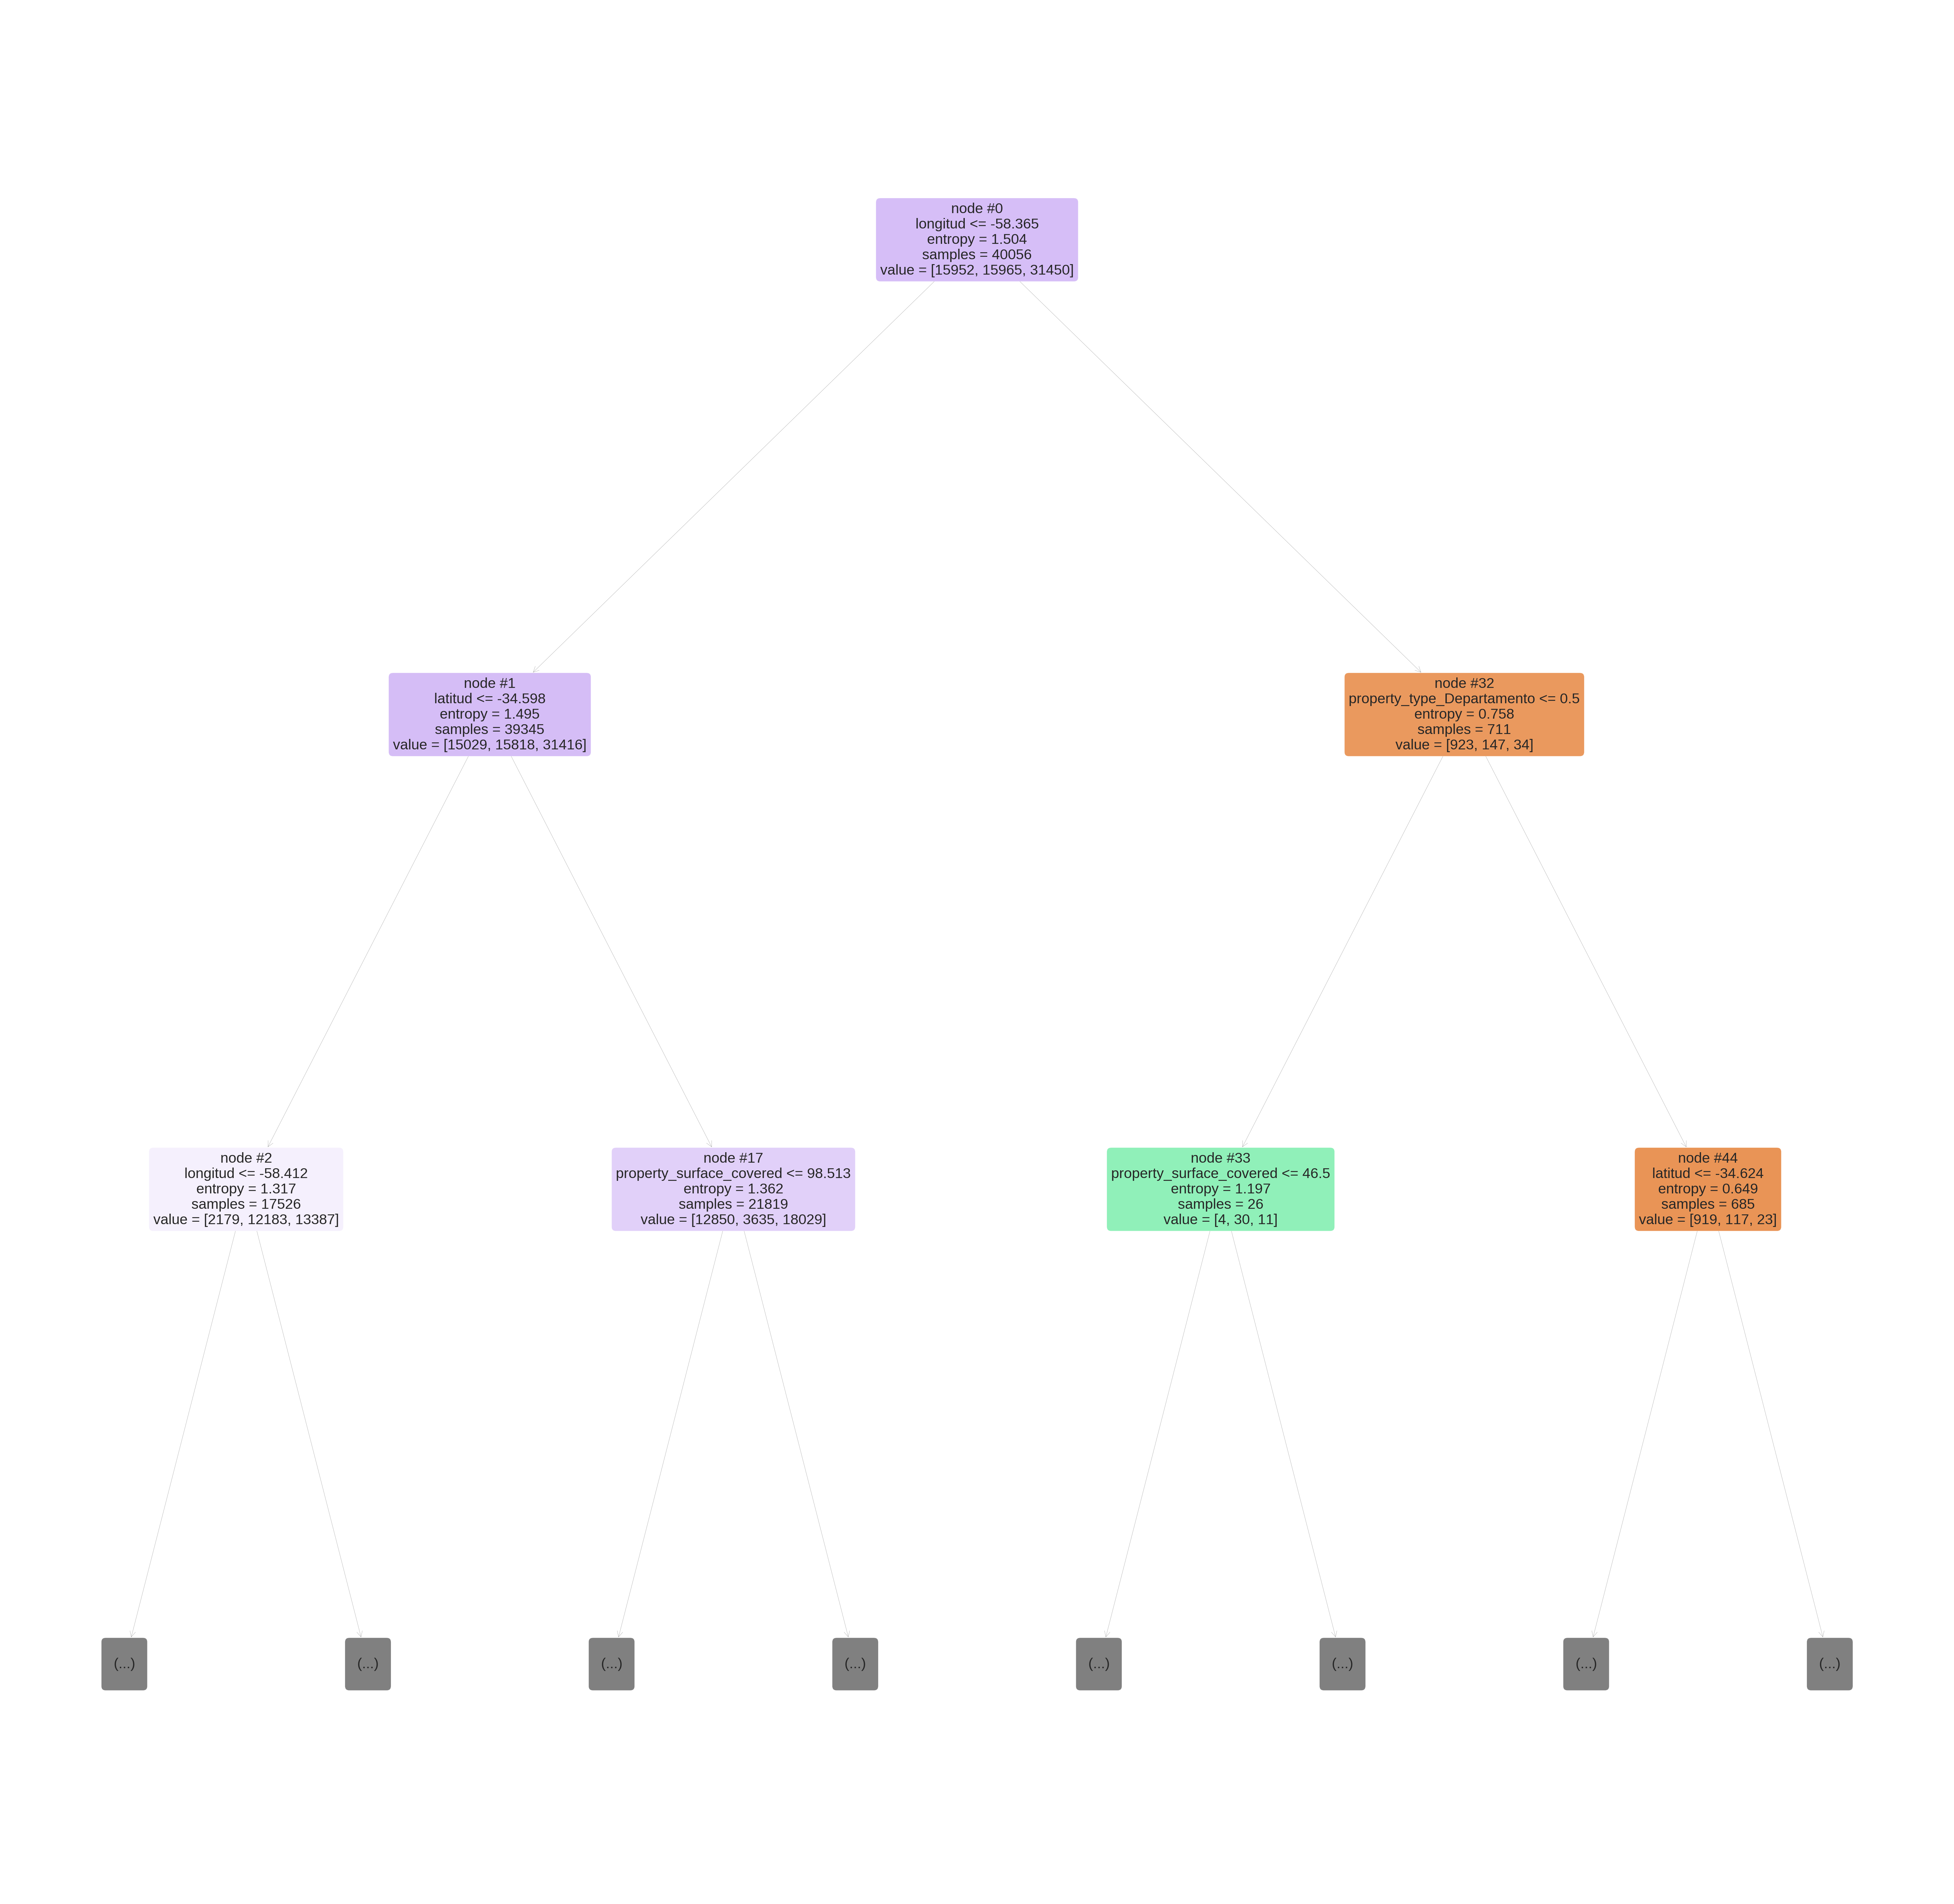

In [270]:
rmf_estimator = rmf.estimators_[1]
plt.figure(figsize=(100,100))
rmf_arbol_unico = tree.plot_tree(rmf_estimator, max_depth=2, feature_names=x_train_target.columns.to_list(), filled=True, rounded=True, node_ids=True)
plt.show(rmf_arbol_unico)

Analizaremos las bifurcaciones del árbol acompañándonos con el mapa que sigue a este análisis. 

Como podemos observar, de los atributos seleccionados se muestran en el árbol latitud, longitud, property_surface_covered y property_type_departamento, . De esta forma, podemos deducir que las ramificaciones son producto de:

* La primer bifurcación haría referencia a una separación este-oeste (al tratarse de la longitud, que si bien va de norte a sur, se traza una línea que divide de este a oeste)(graficada abajo con linea roja), dado que justo en el lugar donde se divide, se encuentra el barrio con las propiedades más costosas de la Capital Federal (Puerto Madero), esto podría ser la razón por la cual se traza la línea roja y se divide en secciones A y B.

* Siguiendo las ramificaciones, nos ubicamos en la parte izquierda del árbol en el segundo nivel. Vemos que se genera otra partición representada por la línea negra. Se genera así la sección 1 la cual se encuentra en la zona norte de la capital y la sección 2 se encuentra en la zona sur. Teniendo en cuenta que suele suceder que el valor de una propiedad incrementa a medida que esta se encuentra ubicada más al norte, podría ser la principal razón por la que se genera la ramificación en dicho punto.


* Siguiendo las separaciones, en la parte izquierda del árbol del tercer nivel se genera otra separación, representada por la línea azul. Vemos que acá hay dos secciones: 2.1 y 2.2 . Teniendo en cuenta que en la sección 2.1 se encuentran las zonas céntricas de la capital, que si bien no están compuestas por los barrios más caros, podría ser que haya una gran cantidad de departamentos en venta por esas zonas lo cual podría ser causante de dicha división. Por otro lado, en la región 2.2, se encuentra un sector de la Capital Federal donde predominan las casas, por lo tanto esto generaria que haya una menor densidad de propiedades en venta en comparación con la región 2.1, donde sabemos que predominan los departamentos. Siendo que una casa ocupa el espacio por sí misma, y si en ese espacio hubiera un edificio, el mismo podría representar a múltiples departamentos.

* Encontrándonos en el nodo 17 vemos que el criterio de división se basa en property_surface_covered = 100. Consideramos que esto tiene sentido ya que, siguiendo lo analizado anteriormente, consideramos que el norte tiene los precios más caros. Por lo visto, el árbol decide tomar en cuenta la superficie cubierta para categorizar el precio. Siendo que cuanto mayor superficie, más se incrementa el precio (como vimos en el análisis de correlaciones), esta división tiene sentido.

* Por otro lado, volviendo al nodo raiz, yendo al lado derecho, nos encontramos con el nodo 32 que genera una bifurcación producida por property_type_Departamento. Esto tiene sentido ya que hay barrios que tienen una mayor predominancia de departamentos, como Puerto Madero que es un barrio más moderno, y hay otros, como La Boca y San Telmo que tienen más casas y Ph’s.

* Luego observamos que el nodo 32 se ramifica en 2 secciones (3 y 4) separadas por la línea verde. En la sección 3 se encuentra solamente el barrio Puerto Madero, que como dijimos anteriormente es el barrio con mayor precio por metro cuadrado de la Capital Federal. Este probablemente sería el motivo por el cual esta sección se ramifica a la hora de determinar el tipo de precio de la propiedad.	

* Por ultimo en el nodo 33, se genera una nueva ramificación a la hora de categorizar el tipo de precio de la propiedad, la cual divide según si la propiedad cuenta con una superficie mayor o menor a 50 m^2. Esta división puede estar generada ya que dentro de los 3 barrios que se encuentran en la sección A, 2 de ellos (La Boca y San Telmo) son barrios antiguos y suelen tener una mayor superficie cubierta, mientras que Puerto Madero que es un barrio más moderno, cuenta con su mayoría de las propiedades menores a 50 m^2.


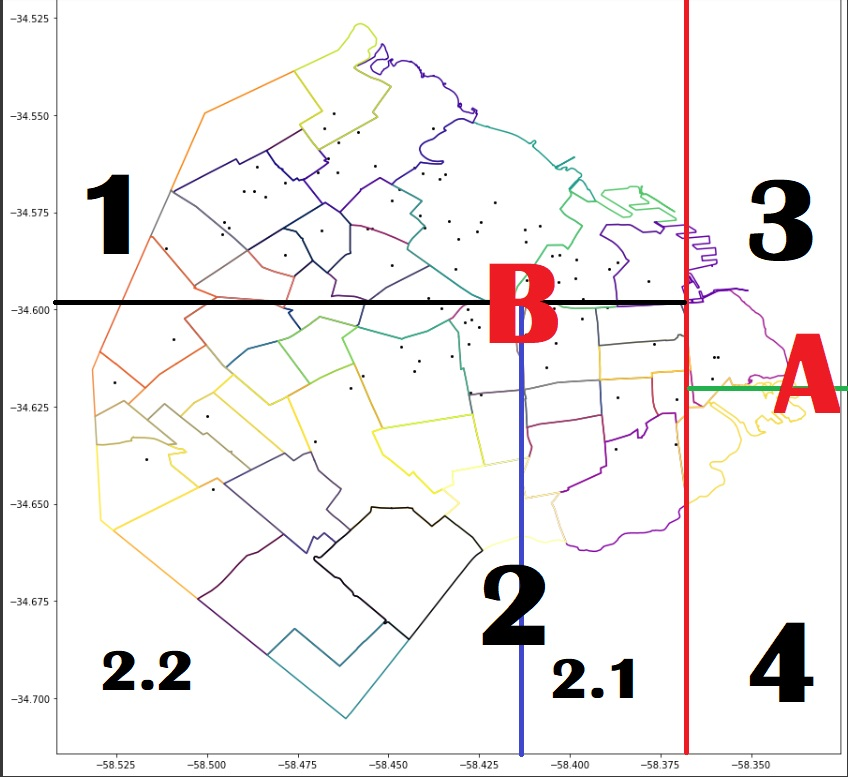

Procedemos a evaluar la performance del árbol en el conjunto de evaluación, describiendo las métricas y mostrando la matriz de confusión

In [271]:
#Calculo las métricas en el conjunto de evaluación
rmf_accuracy=accuracy_score(y_test_target,rmf_y_pred)
rmf_recall=recall_score(y_test_target,rmf_y_pred, average='macro')
rmf_f1=f1_score(y_test_target,rmf_y_pred, average='macro')

print("Accuracy: "+str(rmf_accuracy))
print("Recall: "+str(rmf_recall))
print("f1 score: "+str(rmf_f1))

Accuracy: 0.5823767476085356
Recall: 0.4828239378997554
f1 score: 0.49257673628075266


[Text(51.0, 0.5, 'True'), Text(0.5, 28.5, 'Predicted')]

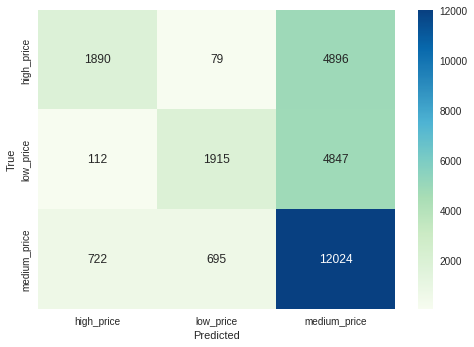

In [272]:
#Creo la matriz de confusión
rmf_tabla=confusion_matrix(y_test_target, rmf_y_pred)

rmf_columnas=identificar_clasificacion(rmf_y_pred,rmf_tabla)
#Grafico la matriz de confusión
sns.heatmap(rmf_tabla,cmap='GnBu',annot=True,fmt='g', yticklabels = rmf_columnas, xticklabels = rmf_columnas).set(xlabel="Predicted", ylabel="True")

In [273]:
print("Ranfom Forest: Mejor metrica en train:",rmf_mejor_metrica) #mejor metrica del train
print("Ranfom Forest: Metrica en test:",rmf_f1) #metrica del test 
print("Ranfom Forest: Diferencia test - train:",(rmf_mejor_metrica-rmf_f1)) #metrica del test 

Ranfom Forest: Mejor metrica en train: 0.5136680126717534
Ranfom Forest: Metrica en test: 0.49257673628075266
Ranfom Forest: Diferencia test - train: 0.02109127639100078


#### Con DataSet Reducido por PCA


In [274]:
#Clasificador
rmf_pca = RandomForestClassifier()

#Metrica
rmf_scorer_fn_pca = make_scorer(sk.metrics.f1_score, average = 'macro')

rmf_randomcv_pca = cross_validation_tree_train(base_tree=rmf_pca, scorer_fn=rmf_scorer_fn_pca, x_ds=ds_pca, y_ds=y_train_target)

In [275]:
mostrar_resultados_cv(rmf_randomcv_pca.best_params_, rmf_randomcv_pca.best_score_, "Random Forest con PCA")

Para Random Forest con PCA
	Mejores parametros: 
		{'max_depth': 5, 'criterion': 'entropy', 'ccp_alpha': 0.0}
\Best Score: 
		0.30207767538180097


In [276]:
rmf_metricas_pca, rmf_mejor_metrica_pca = encontrar_mejor_metrica_de_cv(rmf_randomcv_pca) 

La mejor metrica obtenida mediante cv en train es de: 0.3069997566276381


Como paso siguiente, realizaremos el análisis de la importancia de los atributos:


In [277]:
rmf_best_est_pca = rmf_randomcv_pca.best_estimator_
rmf_feat_imps_pca = rmf_best_est_pca.feature_importances_
rmf_importancia_pred_tupla_pca = sorted(zip(rmf_feat_imps_pca, ds_pca.columns.values), reverse=True)
print("Importancias segun componente:")
sorted(zip(rmf_feat_imps_pca, ds_pca.columns.values), reverse=True)

Importancias segun componente:


[(0.3958332068186799, 'cp_2'),
 (0.3438064026289616, 'cp_1'),
 (0.26036039055235854, 'cp_3')]

In [278]:
rmf_importancia_predictores_pca = pd.DataFrame({'predictor': [rmf_importancia_pred_tupla_pca[0][1]], 'cp_2': rmf_importancia_pred_tupla_pca[0][0]})
for i in range(1,len(rmf_importancia_pred_tupla_pca)):
  rmf_importancia_predictores_pca[[rmf_importancia_pred_tupla_pca[i][1]]] = rmf_importancia_pred_tupla_pca[i][0]

rmf_importancia_predictores_pca.drop('predictor', axis='columns', inplace=True)

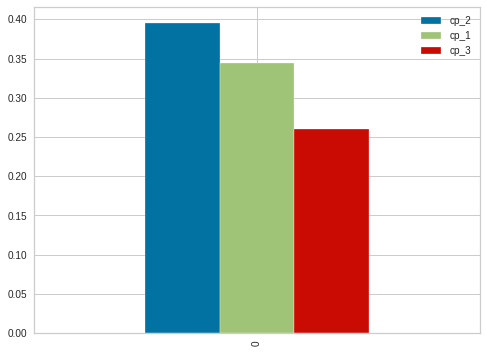

In [279]:
# Graficamos la importancia de los atributos
rmf_importancia_predictores_pca.plot(kind='bar', figsize=(8,6))

Mostramos la conformación final de uno de los árboles generados

In [280]:
#Creo el árbol con los mejores hiperparámetros
rmf_pca=RandomForestClassifier(random_state=2).set_params(**rmf_randomcv_pca.best_params_)

#Entreno el arbol en todo el set
rmf_pca = rmf_pca.fit(X = ds_pca, y = y_train_target)

In [281]:
rmf_y_pred_pca = rmf_pca.predict(ds_pca_test)

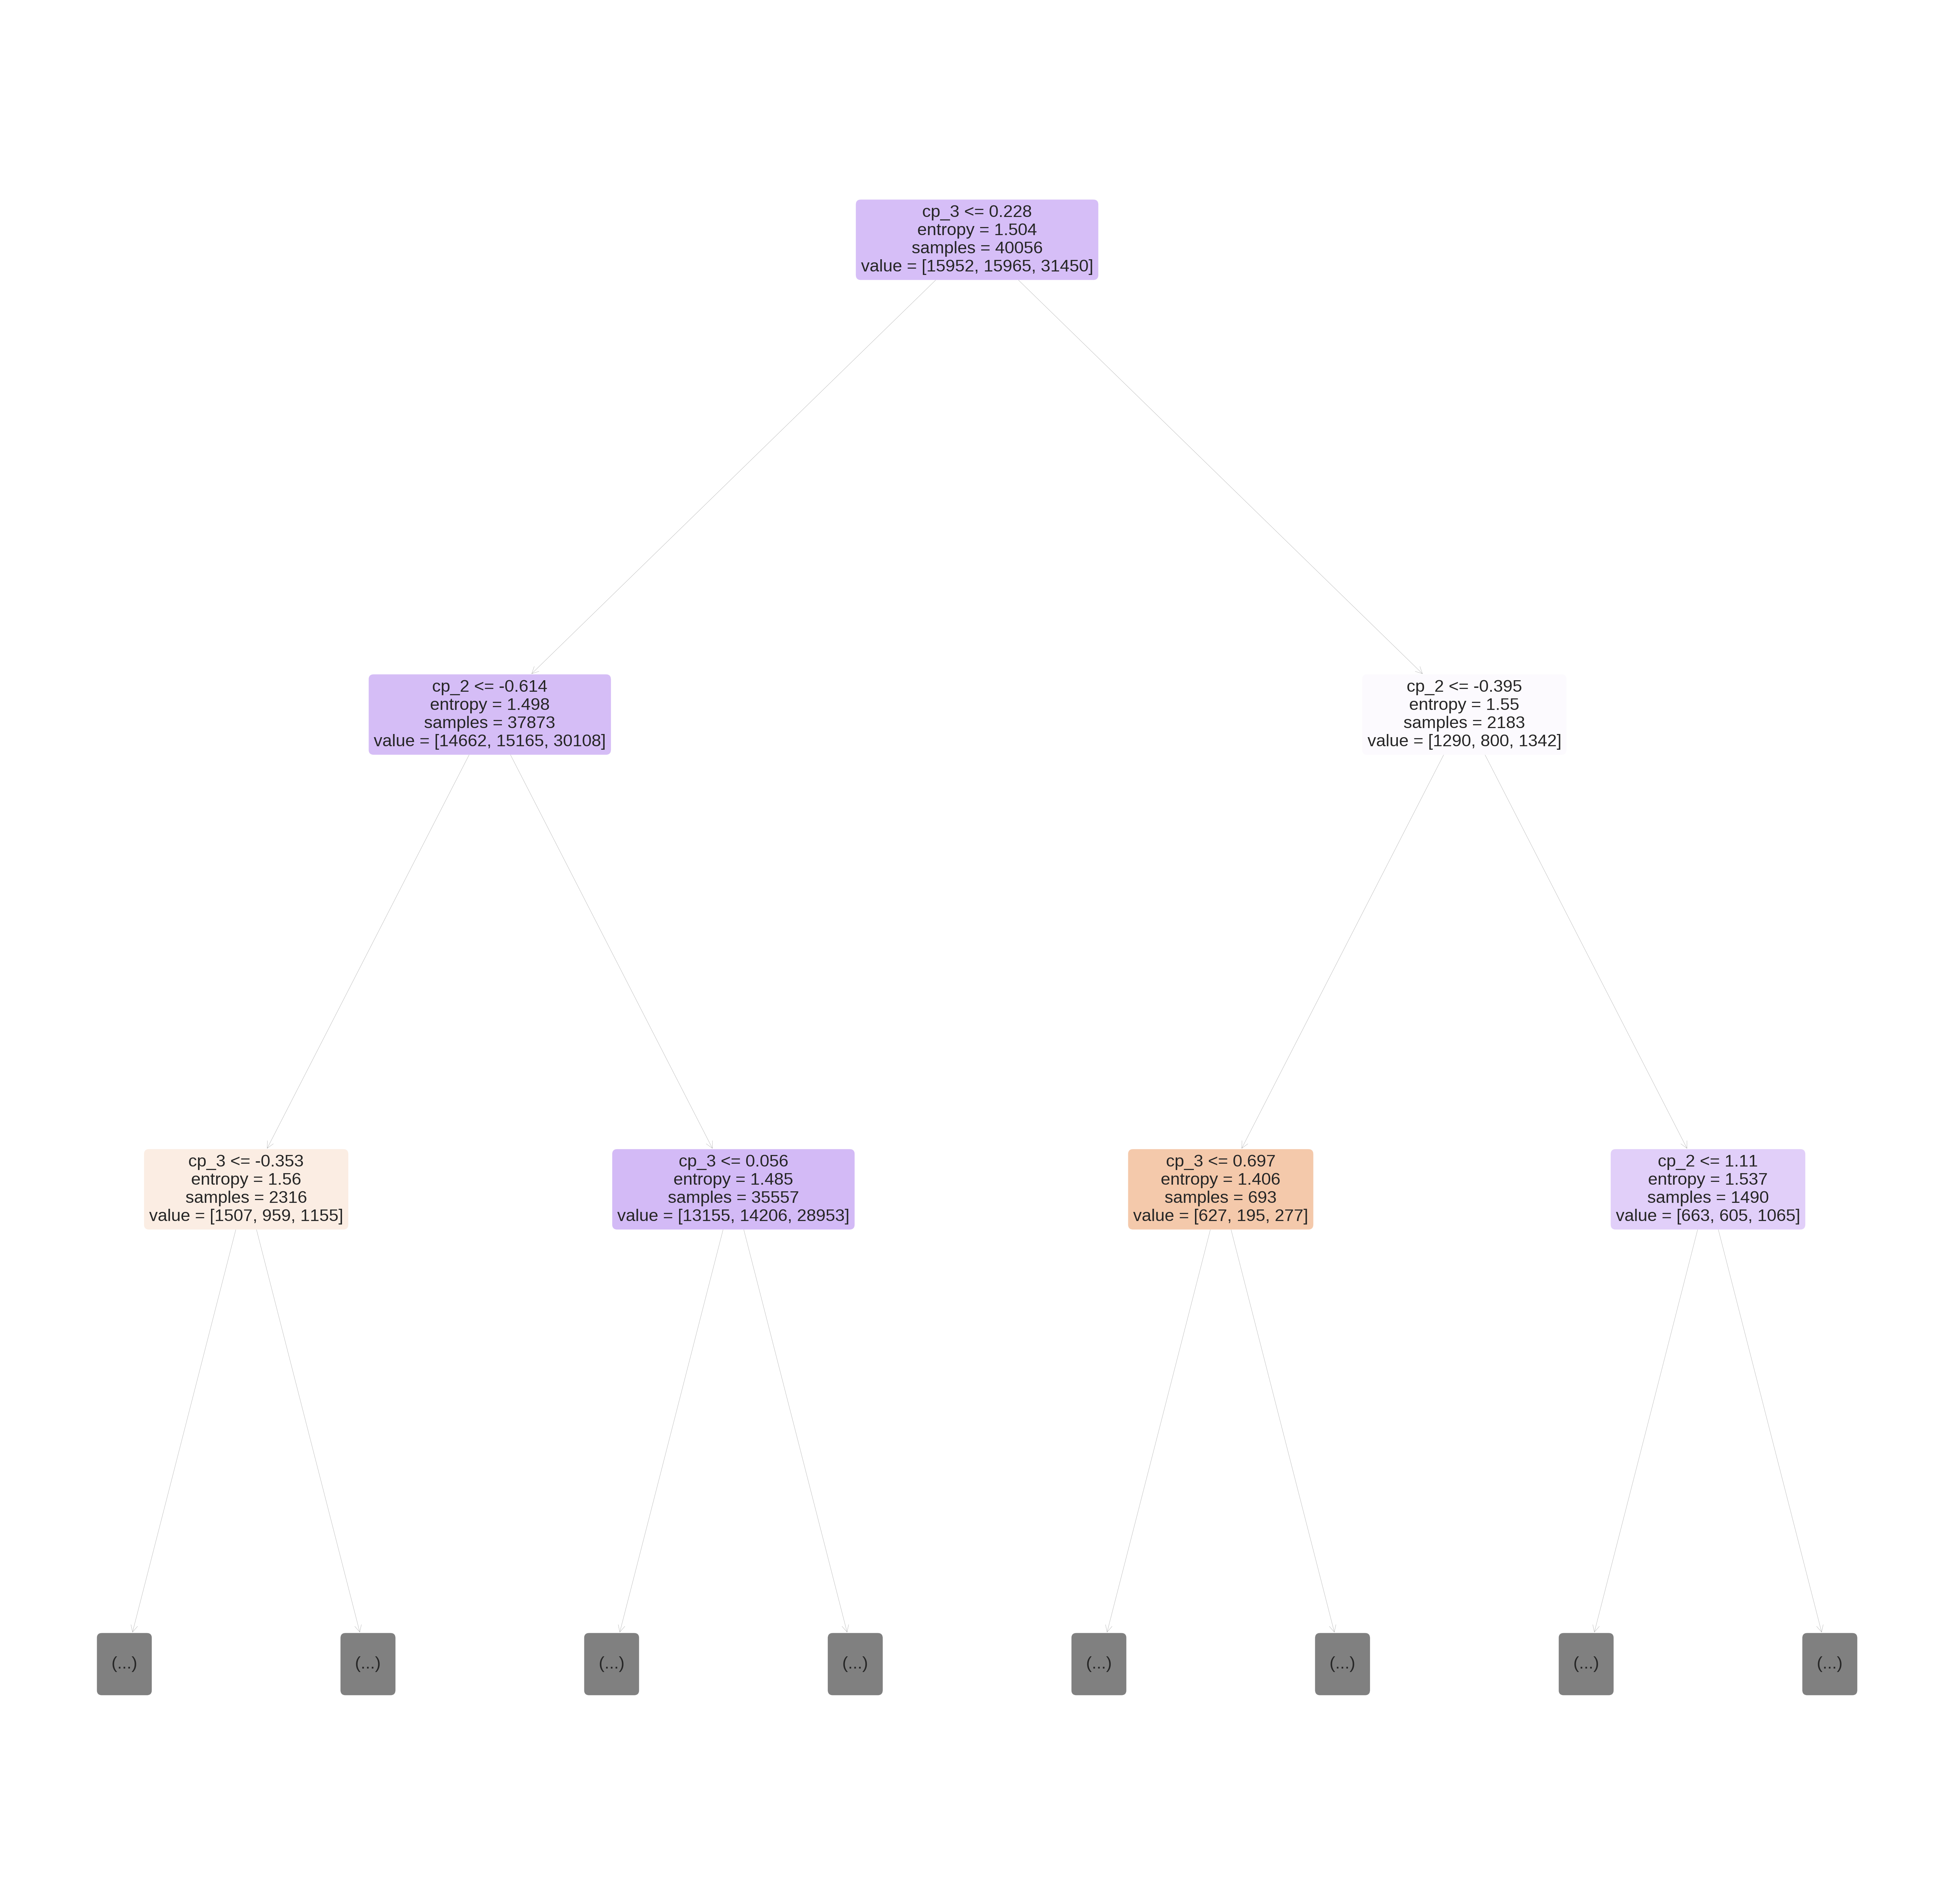

In [282]:
rmf_estimator_pca = rmf_pca.estimators_[1]
plt.figure(figsize=(100,100))
arbol_unico = tree.plot_tree(rmf_estimator_pca, max_depth=2, feature_names=ds_pca.columns.to_list(), filled=True, rounded=True)
plt.show(arbol_unico)

Procedemos a evaluar la performance del árbol en el conjunto de evaluación, describiendo las métricas y mostrando la matriz de confusión

In [283]:
#Calculo las métricas en el conjunto de evaluación
rmf_accuracy_pca=accuracy_score(y_test_target, rmf_y_pred_pca)
rmf_recall_pca=recall_score(y_test_target, rmf_y_pred_pca, average='macro')
rmf_f1_pca=f1_score(y_test_target, rmf_y_pred_pca, average='macro')

print("Accuracy: "+str(rmf_accuracy_pca))
print("Recall: "+str(rmf_recall_pca))
print("f1 score: "+str(rmf_f1_pca))

Accuracy: 0.5114790286975718
Recall: 0.36768247688976724
f1 score: 0.2998142428966103


[Text(51.0, 0.5, 'True'), Text(0.5, 28.5, 'Predicted')]

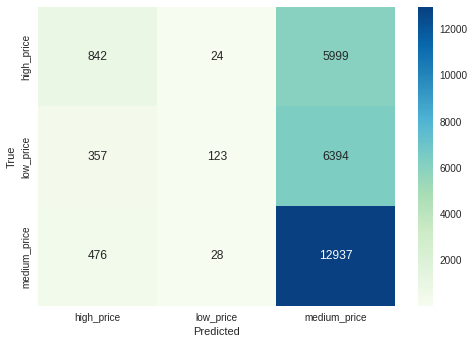

In [284]:
#Creo la matriz de confusión
rmf_tabla_pca=confusion_matrix(y_test_target, rmf_y_pred_pca)

rmf_columnas_pca=identificar_clasificacion(rmf_y_pred_pca,rmf_tabla_pca)
#Grafico la matriz de confusión
sns.heatmap(rmf_tabla_pca,cmap='GnBu',annot=True,fmt='g', yticklabels = rmf_columnas_pca, xticklabels = rmf_columnas_pca).set(xlabel="Predicted", ylabel="True")

In [285]:
print("Ranfom Forest: Mejor metrica en train:",rmf_mejor_metrica_pca) #mejor metrica del train
print("Ranfom Forest: Metrica en test:",rmf_f1_pca) #metrica del test 
print("Ranfom Forest: Diferencia test - train:",(rmf_mejor_metrica_pca-rmf_f1_pca)) #metrica del test 

Ranfom Forest: Mejor metrica en train: 0.3069997566276381
Ranfom Forest: Metrica en test: 0.2998142428966103
Ranfom Forest: Diferencia test - train: 0.007185513731027826


Comparamos las matricas obtenidas con el general y el PCA.

In [286]:
print("Data Set General:")
print("\tMejor metrica en train con ds general:",rmf_mejor_metrica) #mejor metrica del train
print("\tMetrica en test con ds general:",rmf_f1) #metrica del test 

print("\nData Set PCA:")
print("\tMejor metrica en train con ds pca:",rmf_mejor_metrica_pca) #mejor metrica del train
print("\tMetrica en test con ds pca:",rmf_f1_pca) #metrica del test 

Data Set General:
	Mejor metrica en train con ds general: 0.5136680126717534
	Metrica en test con ds general: 0.49257673628075266

Data Set PCA:
	Mejor metrica en train con ds pca: 0.3069997566276381
	Metrica en test con ds pca: 0.2998142428966103


Observamos devuelta que con PCA terminamos teniendo peores resultados que con el dataset original.

###Modelo 3: AdaBoost

#### Con DataSet General

In [287]:
from sklearn.ensemble import AdaBoostClassifier

#Clasificador
ab = AdaBoostClassifier()

# Metrica
ab_scorer_fn = make_scorer(sk.metrics.f1_score, average = 'macro')

ab_params_grid = {'learning_rate':np.linspace(0.01,0.1,10),
               'n_estimators': list(range(1,100))}

ab_randomcv = cross_validation_tree_train(base_tree=ab, scorer_fn=ab_scorer_fn, params_grid=ab_params_grid)

In [288]:
mostrar_resultados_cv(ab_randomcv.best_params_, ab_randomcv.best_score_, "AdaBoost con el General")

Para AdaBoost con el General
	Mejores parametros: 
		{'n_estimators': 84, 'learning_rate': 0.1}
\Best Score: 
		0.4240608989394007


In [289]:
ab_metricas, ab_mejor_metrica = encontrar_mejor_metrica_de_cv(ab_randomcv) 

La mejor metrica obtenida mediante cv en train es de: 0.4300897452250069


In [290]:
#Creo el árbol con los mejores hiperparámetros
ab=AdaBoostClassifier(random_state=2).set_params(**ab_randomcv.best_params_)

#Entreno el arbol en todo el set
ab.fit(x_train_target,y_train_target)

AdaBoostClassifier(learning_rate=0.1, n_estimators=84, random_state=2)

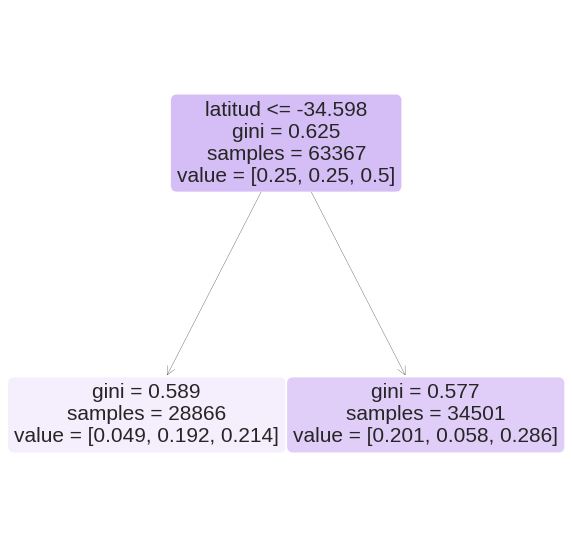

In [291]:
plt.figure(figsize=(10,10))
ab_tree_plot_completo=tree.plot_tree(ab.estimators_[0],feature_names=x_train_target.columns.to_list(),filled=True,rounded=True)
plt.show(ab_tree_plot_completo)

In [292]:
ab_y_pred = ab.predict(x_test_target)

In [293]:
# Evalúo en el set de test
ab_accuracy=accuracy_score(y_test_target,ab_y_pred)
ab_recall=recall_score(y_test_target,ab_y_pred, average='macro')
ab_f1=f1_score(y_test_target,ab_y_pred, average='macro')

print("Accuracy: "+str(ab_accuracy))
print("Recall: "+str(ab_recall))
print("f1 score: "+str(ab_f1))

Accuracy: 0.5450699043414275
Recall: 0.43180056323323246
f1 score: 0.42302347925105543


[Text(51.0, 0.5, 'True'), Text(0.5, 28.5, 'Predicted')]

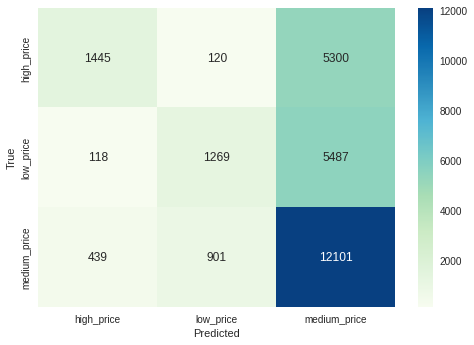

In [294]:
#Creo la matriz de confusión
ab_tabla=confusion_matrix(y_test_target, ab_y_pred)

ab_columnas=identificar_clasificacion(ab_y_pred,ab_tabla)
#Grafico la matriz de confusión
sns.heatmap(ab_tabla,cmap='GnBu',annot=True,fmt='g', yticklabels = ab_columnas, xticklabels = ab_columnas).set(xlabel="Predicted", ylabel="True")

In [295]:
from sklearn.metrics import classification_report
#Reporte
print(classification_report(y_test_target,ab_y_pred))

              precision    recall  f1-score   support

  high_price       0.72      0.21      0.33      6865
   low_price       0.55      0.18      0.28      6874
medium_price       0.53      0.90      0.67     13441

    accuracy                           0.55     27180
   macro avg       0.60      0.43      0.42     27180
weighted avg       0.58      0.55      0.48     27180



In [296]:
print("Mejor metrica en train:",ab_mejor_metrica) #mejor metrica del train
print("Metrica en test:",ab_f1) #metrica del test 
print("Diferencia test - train:",(ab_mejor_metrica-ab_f1)) #metrica del test 

Mejor metrica en train: 0.4300897452250069
Metrica en test: 0.42302347925105543
Diferencia test - train: 0.007066265973951491


#### Con DataSet Reducido por PCA

In [297]:
#Clasificador
ab_pca = AdaBoostClassifier()

# Metrica
ab_scorer_fn_pca = make_scorer(sk.metrics.f1_score, average = 'macro')

ab_params_grid_pca = {'learning_rate':np.linspace(0.01,0.1,10),
               'n_estimators': list(range(1,100))}

ab_randomcv_pca = cross_validation_tree_train(base_tree=ab_pca, scorer_fn=ab_scorer_fn_pca, params_grid=ab_params_grid_pca, x_ds=ds_pca, y_ds=y_train_target)

In [298]:
mostrar_resultados_cv(ab_randomcv_pca.best_params_, ab_randomcv_pca.best_score_, "AdaBoost con el PCA")

Para AdaBoost con el PCA
	Mejores parametros: 
		{'n_estimators': 84, 'learning_rate': 0.1}
\Best Score: 
		0.2858691771303189


In [299]:
ab_metricas_pca, ab_mejor_metrica_pca = encontrar_mejor_metrica_de_cv(ab_randomcv_pca) 

La mejor metrica obtenida mediante cv en train es de: 0.2882237977095183


In [300]:
#Creo el árbol con los mejores hiperparámetros
ab_pca=AdaBoostClassifier(random_state=2).set_params(**ab_randomcv_pca.best_params_)

#Entreno el arbol en todo el set
ab_pca.fit(ds_pca,y_train_target)

AdaBoostClassifier(learning_rate=0.1, n_estimators=84, random_state=2)

Luego de crear el arbol con los mejores hiperparámetros, mostramos el arbol generado en un gráfico

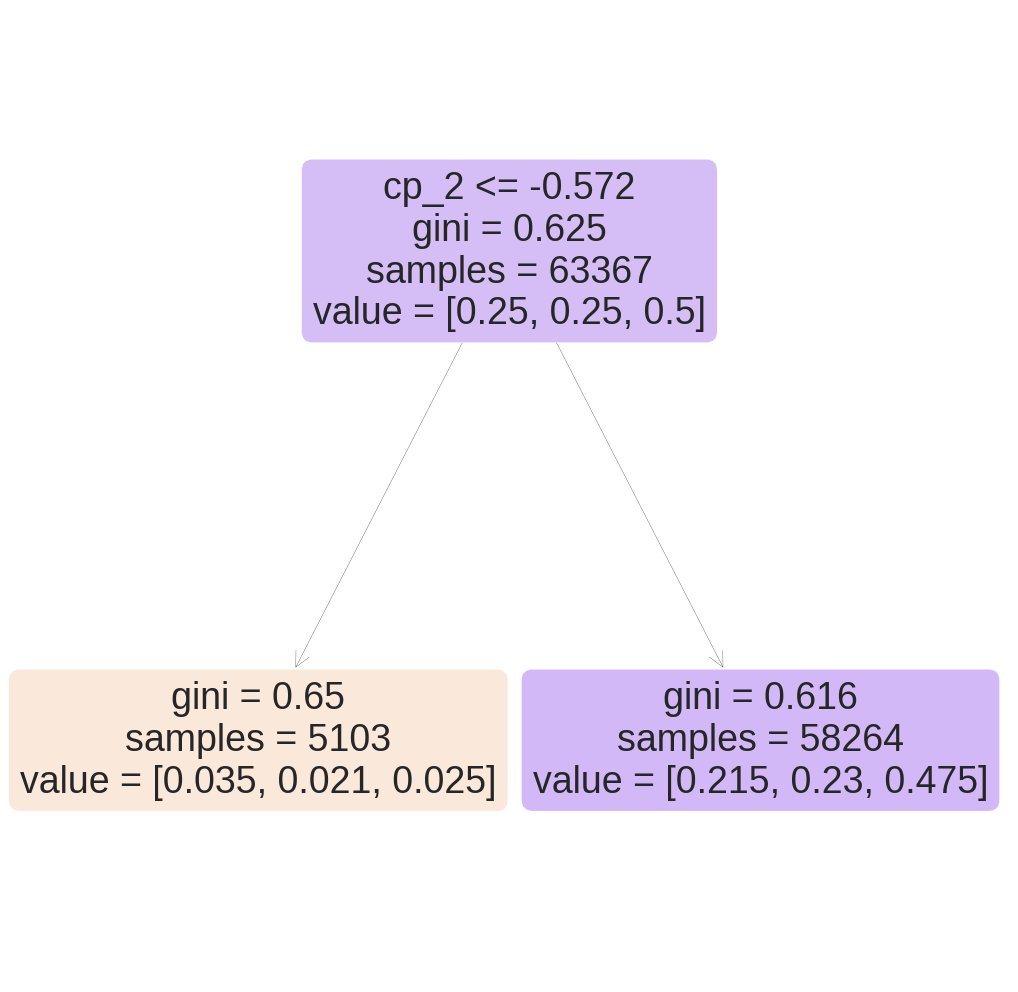

In [301]:
plt.figure(figsize=(18,18))
ab_tree_plot_completo_pca=tree.plot_tree(ab_pca.estimators_[0],max_depth=2,feature_names=ds_pca.columns.to_list(),filled=True,rounded=True)
plt.show(ab_tree_plot_completo_pca)

In [302]:
ab_y_pred_pca = ab_pca.predict(ds_pca_test)#test

In [303]:
#Calculo las métricas en el conjunto de evaluación
ab_accuracy_pca=accuracy_score(y_test_target, ab_y_pred_pca)
ab_recall_pca=recall_score(y_test_target, ab_y_pred_pca, average='macro')
ab_f1_pca=f1_score(y_test_target, ab_y_pred_pca, average='macro')

print("Accuracy: "+str(ab_accuracy_pca))
print("Recall: "+str(ab_recall_pca))
print("f1 score: "+str(ab_f1_pca))

Accuracy: 0.5071376011773363
Recall: 0.3609151166663361
f1 score: 0.2851031325273425


[Text(51.0, 0.5, 'True'), Text(0.5, 28.5, 'Predicted')]

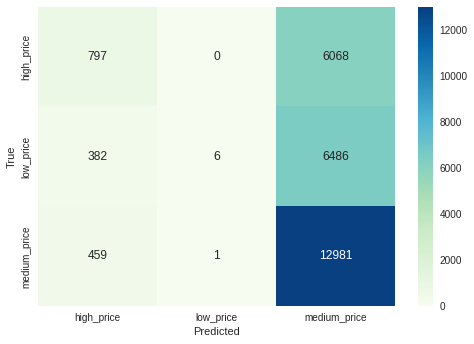

In [304]:
#Creo la matriz de confusión
ab_tabla_pca=confusion_matrix(y_test_target, ab_y_pred_pca)

ab_columnas_pca=identificar_clasificacion(ab_y_pred_pca,ab_tabla_pca)
#Grafico la matriz de confusión
sns.heatmap(ab_tabla_pca,cmap='GnBu',annot=True,fmt='g', yticklabels = ab_columnas_pca, xticklabels = ab_columnas_pca).set(xlabel="Predicted", ylabel="True")

Procedemos a realizar la comparacion de la performance del arbol en el conjunto de evaluacion vs en el conjunto de entrenamiento. 

In [305]:
from sklearn.metrics import classification_report
#Reporte
print(classification_report(y_test_target,ab_y_pred_pca))

              precision    recall  f1-score   support

  high_price       0.49      0.12      0.19      6865
   low_price       0.86      0.00      0.00      6874
medium_price       0.51      0.97      0.67     13441

    accuracy                           0.51     27180
   macro avg       0.62      0.36      0.29     27180
weighted avg       0.59      0.51      0.38     27180



In [306]:
print("Mejor metrica en train:",ab_mejor_metrica_pca) #mejor metrica del train
print("Metrica en test:",ab_f1_pca) #metrica del test 
print("Diferencia test - train:",(ab_mejor_metrica_pca-ab_f1_pca)) #metrica del test 

Mejor metrica en train: 0.2882237977095183
Metrica en test: 0.2851031325273425
Diferencia test - train: 0.003120665182175797


### Modelo elegido

En conclusión, habiendo predicho el valor del target tipo_precio_generico con los 3 modelos: Árbol de Decisión, Random Forest y AdaBoost, elegiríamos el modelo Random Forest. 

Si bien no nos dio la mejor metrica de todas, elegimos esta opcion ya que en el caso de AdaBoost tendríamos la desventaja de que no se puede paralizar el modelo siendo que cada predictor solo se puede entrenar después de haber entrenado y evaluado el anterior, por lo que es poco escalable.
En cambio, Random Forest si puede hacerse en paralelo, cada uno de los árboles está construido de forma independiente de los otros y no importa el orden de creación, lo que lo hace mucho más escalable.

In [307]:
print('La mejor metrica obtenida en Arbol de Decision --------------->',dt_mejor_metrica)
print('La mejor metrica obtenida en Random Forest ------------------->',rmf_mejor_metrica)
print('La mejor metrica obtenida en AdaBoost ------------------------>',ab_mejor_metrica)

La mejor metrica obtenida en Arbol de Decision ---------------> 0.5500575769747108
La mejor metrica obtenida en Random Forest -------------------> 0.5136680126717534
La mejor metrica obtenida en AdaBoost ------------------------> 0.4300897452250069


#Regresión

Para formar todos los modelos regresores (modelo 1, 2 y 3) , utilizamos la métrica r2_score debido a que es el coeficiente de determinación y determina la capacidad de un modelo para predecir futuros resultados.

En cuanto los folds utilizados, usaremos 5, tal y como explicamos en la seccion anterior de "Entrenamiento y Prediccion", debido a que utilizamos la misma funcion para hacer cross validation. 

In [308]:
def calcular_metricas_de_regresion(y_pred):  
  #Mean Square Error
  mse = sk.metrics.mean_squared_error(
          y_true  = y_test,
          y_pred  = y_pred,
          squared = True
        )

  print(f"El error (mse) de test es: {mse}")

  #Root Mean Square Error
  rmse = sk.metrics.mean_squared_error(
          y_true  = y_test,
          y_pred  = y_pred,
          squared = False
        )

  print(f"El error (rmse) de test es: {rmse}")

In [309]:
#One hot encoding para property_type
train_con_dummi = pd.get_dummies(x_train, columns=["property_type"], drop_first=False)
test_con_dummi = pd.get_dummies(x_test, columns=["property_type"], drop_first=False)

In [310]:
#Conseguimos los data set de entrenamiento para la regresion habiendo trabajado la variable propery_type con dummies
#y eliminado el precio.
x_train_reg = train_con_dummi.drop(columns = ['id', 'latitud', 'longitud', 'place_l2', 'place_l3', 'operation', 'pxm2', 'tipo_precio_generico', 'property_type_Casa', 'property_type_PH', 'property_type_Departamento',
       'property_currency', 'property_title', 'tipo_precio_1', 'tipo_precio_2', 'property_price'], inplace=False)
x_test_reg = test_con_dummi.drop(columns = ['id', 'latitud', 'longitud', 'place_l2', 'place_l3', 'operation',
       'property_currency', 'property_title', 'pxm2', 'tipo_precio_generico', 'property_price', 'property_type_Casa', 'property_type_PH', 'property_type_Departamento'], inplace=False)

In [311]:
#Conseguimos el dataset de pca
x_train_reg_pca = ds_pca.copy()
x_test_reg_pca = ds_pca_test.copy()

###Modelo 1: KNN

#### Con DataSet General

In [312]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

knn_params_grid = {'leaf_size': [10,20,30],
              'metric': ['euclidean', 'manhattan'],
              'n_neighbors': [3,4,5,6],
              'weights': ['uniform', 'distance']}

knn = KNeighborsRegressor()

knn_scorer_fn = make_scorer(sk.metrics.r2_score, multioutput='variance_weighted')

knn_randomcv = cross_validation_tree_train(base_tree=knn, scorer_fn=knn_scorer_fn, params_grid=knn_params_grid, x_ds=x_train_reg, y_ds=y_train)

In [313]:
mostrar_resultados_cv(knn_randomcv.best_params_, knn_randomcv.best_score_, "KNN con el General")

Para KNN con el General
	Mejores parametros: 
		{'weights': 'distance', 'n_neighbors': 6, 'metric': 'euclidean', 'leaf_size': 20}
\Best Score: 
		0.7069951514653388


In [314]:
knn_metricas, knn_mejor_metrica = encontrar_mejor_metrica_de_cv(knn_randomcv) 

La mejor metrica obtenida mediante cv en train es de: 0.7286286235108342


In [315]:
# Creo un modelo KNN para regresion y lo ajusto
knn_regressor = KNeighborsRegressor().set_params(**knn_randomcv.best_params_)

knn_regressor.fit(x_train_reg, y_train)

#Hago una predicción
knn_y_pred = knn_regressor.predict(x_test_reg)

In [316]:
# Performance
knn_performance = pd.DataFrame({'Valor Real': y_test,
                            'Prediccion': knn_y_pred,
                            'Error': y_test - knn_y_pred})
# View
knn_performance.head()

Valor Real     Prediccion          Error
42     82900.0  119500.000000  -36600.000000
51    250000.0  162333.333333   87666.666667
56    100000.0  123166.666667  -23166.666667
58    500000.0  813174.854311 -313174.854311
59    110000.0  230975.000000 -120975.000000

In [317]:
calcular_metricas_de_regresion(knn_y_pred)

El error (mse) de test es: 19172467421.578636
El error (rmse) de test es: 138464.67932862387


In [318]:
#Coef. de Determinación R2
knn_score = knn_regressor.score(x_test_reg, y_test)
print("El knn score es: ",knn_score)


El knn score es:  0.6891218351488045


In [319]:
print('Diferencia entre las metricas del train y test', knn_mejor_metrica - knn_score)

Diferencia entre las metricas del train y test 0.0395067883620297


In [320]:
knn_r2 = r2_score(y_test, knn_y_pred, multioutput='variance_weighted')
print("El r2 de knn es: ",knn_r2)

El r2 de knn es:  0.6891218351488045


#### Con DataSet Reducido por PCA

In [321]:
knn_params_grid_pca = {'leaf_size': [10,20,30],
              'metric': ['euclidean', 'manhattan'],
              'n_neighbors': [3,4,5,6],
              'weights': ['uniform', 'distance']}

knn_pca = KNeighborsRegressor()

knn_scorer_fn_pca = make_scorer(sk.metrics.r2_score, multioutput='variance_weighted')

knn_randomcv_pca = cross_validation_tree_train(base_tree=knn_pca, scorer_fn=knn_scorer_fn_pca, params_grid=knn_params_grid_pca, x_ds=x_train_reg_pca, y_ds=y_train)

In [322]:
mostrar_resultados_cv(knn_randomcv_pca.best_params_, knn_randomcv_pca.best_score_, "KNN con el General")

Para KNN con el General
	Mejores parametros: 
		{'weights': 'distance', 'n_neighbors': 6, 'metric': 'euclidean', 'leaf_size': 20}
\Best Score: 
		0.6981576455767801


In [323]:
knn_metricas_pca, knn_mejor_metrica_pca = encontrar_mejor_metrica_de_cv(knn_randomcv_pca) 

La mejor metrica obtenida mediante cv en train es de: 0.7233871608553035


In [324]:
# Creo un modelo KNN para regresion y lo ajusto
knn_regressor_pca = KNeighborsRegressor().set_params(**knn_randomcv_pca.best_params_)

knn_regressor_pca.fit(x_train_reg_pca, y_train)

#Hago una predicción
knn_y_pred_pca = knn_regressor_pca.predict(x_test_reg_pca)

In [325]:
# Performance
knn_performance_pca = pd.DataFrame({'Valor Real': y_test,
                            'Prediccion': knn_y_pred_pca,
                            'Error': y_test - knn_y_pred_pca})
# View
knn_performance_pca.head()

Valor Real     Prediccion          Error
42     82900.0  120316.666667  -37416.666667
51    250000.0  211183.249830   38816.750170
56    100000.0  145000.000000  -45000.000000
58    500000.0  395737.780522  104262.219478
59    110000.0  267891.666667 -157891.666667

In [326]:
calcular_metricas_de_regresion(knn_y_pred_pca)

El error (mse) de test es: 19812289257.672737
El error (rmse) de test es: 140756.13399661393


In [327]:
#Coef. de Determinación R2
knn_score_pca = knn_regressor_pca.score(x_test_reg_pca, y_test)
print("El score de KNN con el set de PCA es: ", knn_score_pca)

El score de KNN con el set de PCA es:  0.6787472373538026


In [328]:
print('Diferencia entre las metricas del train y test', knn_mejor_metrica_pca - knn_score_pca)

Diferencia entre las metricas del train y test 0.04463992350150092


### Modelo 2: XGBoost

#### Con DataSet General

In [329]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import hyperopt
from hyperopt import tpe, fmin
from hyperopt import hp

In [330]:
# parametros para hacer el cv
xgb_reg_params = {
    'learning_rate':     [0.05, 0.3], # Default 0.3
    'max_depth':        [5, 16, 5], # Default 6
    'min_child_weight': [1, 10, 1], # Default 1
    'colsample_bytree': [0.3, 1], # Default 1
    'subsample':        [0.4, 1], #  >= 0.5 for good results.
    'n_estimators':     [5, 10, 15, 20],
    'reg_alpha':        [0, 0.001, 0.005, 0.01, 0.05], # Default 0
    'gamma':            [0, 0.005, 0.01, 0.05, 1] # Default 0
}

In [331]:
xgbr = XGBRegressor(objective='reg:squarederror')

xgb_scorer_fn = make_scorer(sk.metrics.r2_score)

xgb_randomcv = cross_validation_tree_train(base_tree=xgbr, scorer_fn=xgb_scorer_fn, params_grid=xgb_reg_params, x_ds=x_train_reg, y_ds=y_train)

In [332]:
mostrar_resultados_cv(xgb_randomcv.best_params_, xgb_randomcv.best_score_, "XGBoost con el General")

Para XGBoost con el General
	Mejores parametros: 
		{'subsample': 0.4, 'reg_alpha': 0.005, 'n_estimators': 15, 'min_child_weight': 10, 'max_depth': 5, 'learning_rate': 0.3, 'gamma': 0.01, 'colsample_bytree': 1}
\Best Score: 
		0.6769625603184026


In [333]:
xgb_metricas, xgb_mejor_metrica = encontrar_mejor_metrica_de_cv(xgb_randomcv) 

La mejor metrica obtenida mediante cv en train es de: 0.6890427828469949


In [334]:
xgbr = XGBRegressor(objective='reg:squarederror').set_params(**xgb_randomcv.best_params_)

xgbr.fit(x_train_reg, y_train)
 
xgb_y_pred = xgbr.predict(x_test_reg)

In [335]:
# Performance
xgb_performance = pd.DataFrame({'Valor Real': y_test,
                            'Prediccion': xgb_y_pred,
                            'Error': y_test - xgb_y_pred})
# View
xgb_performance.head()

Valor Real     Prediccion          Error
42     82900.0  124179.843750  -41279.843750
51    250000.0  189865.843750   60134.156250
56    100000.0  127280.304688  -27280.304688
58    500000.0  215529.437500  284470.562500
59    110000.0  284704.218750 -174704.218750

In [336]:
calcular_metricas_de_regresion(xgb_y_pred)

El error (mse) de test es: 20136158403.007263
El error (rmse) de test es: 141901.93234416246


In [337]:
#Coef. de Determinación R2
xgb_score = xgbr.score(x_test_reg, y_test)
print("El score del xgboost es: ", xgb_score)

El score del xgboost es:  0.6734957565016195


In [338]:
print('Diferencia entre las metricas del train y test', xgb_mejor_metrica - xgb_score)

Diferencia entre las metricas del train y test 0.015547026345375414


#### Con DataSet Reducido por PCA

In [339]:
# parametros para hacer el cv
xgb_reg_params_pca = {
    'learning_rate':     [0.05, 0.3], # Default 0.3
    'max_depth':        [5, 16, 5], # Default 6
    'min_child_weight': [1, 10, 1], # Default 1
    'colsample_bytree': [0.3, 1], # Default 1
    'subsample':        [0.4, 1], #  >= 0.5 for good results.
    'n_estimators':     [5, 10, 15, 20],
    'reg_alpha':        [0, 0.001, 0.005, 0.01, 0.05], # Default 0
    'gamma':            [0, 0.005, 0.01, 0.05, 1] # Default 0
}

In [340]:
xgbr_pca = XGBRegressor(objective='reg:squarederror')

xgb_scorer_fn_pca = make_scorer(sk.metrics.r2_score)

xgb_randomcv_pca = cross_validation_tree_train(base_tree=xgbr_pca, scorer_fn=xgb_scorer_fn_pca, params_grid=xgb_reg_params_pca, x_ds=x_train_reg_pca, y_ds=y_train)

In [341]:
mostrar_resultados_cv(xgb_randomcv_pca.best_params_, xgb_randomcv_pca.best_score_, "XGBoost con el PCA")

Para XGBoost con el PCA
	Mejores parametros: 
		{'subsample': 0.4, 'reg_alpha': 0.005, 'n_estimators': 15, 'min_child_weight': 10, 'max_depth': 5, 'learning_rate': 0.3, 'gamma': 0.01, 'colsample_bytree': 1}
\Best Score: 
		0.6567314737973364


In [342]:
xgb_metricas_pca, xgb_mejor_metrica_pca = encontrar_mejor_metrica_de_cv(xgb_randomcv_pca) 

La mejor metrica obtenida mediante cv en train es de: 0.6654433528238088


In [343]:
xgbr_pca = XGBRegressor(objective='reg:squarederror').set_params(**xgb_randomcv_pca.best_params_)

xgbr_pca.fit(x_train_reg_pca, y_train)
 
xgb_y_pred_pca = xgbr_pca.predict(x_test_reg_pca)

In [344]:
# Performance
xgb_performance = pd.DataFrame({'Valor Real': y_test,
                            'Prediccion': xgb_y_pred_pca,
                            'Error': y_test - xgb_y_pred_pca})
# View
xgb_performance.head()

Valor Real     Prediccion          Error
42     82900.0  124211.984375  -41311.984375
51    250000.0  210282.984375   39717.015625
56    100000.0  137920.375000  -37920.375000
58    500000.0  328829.906250  171170.093750
59    110000.0  287817.593750 -177817.593750

In [345]:
calcular_metricas_de_regresion(xgb_y_pred_pca)

El error (mse) de test es: 21541180875.88001
El error (rmse) de test es: 146769.1414292528


In [346]:
#Coef. de Determinación R2
xgb_score_pca = xgbr_pca.score(x_test_reg_pca, y_test)
print("El score de xgboost con pca es: ", xgb_score_pca)


El score de xgboost con pca es:  0.6507135658562069


In [347]:
print('Diferencia entre las metricas del train y test', xgb_mejor_metrica_pca - xgb_score_pca)

Diferencia entre las metricas del train y test 0.014729786967601965


### Modelo 3: Regresión Lineal Múltiple

#### Con DataSet General

In [348]:
lr = LinearRegression()

lr_params = {'n_jobs':[0,1,2,3], 'normalize':[True, False], 'positive':[True, False]}

lr_scorer_fn = make_scorer(sk.metrics.r2_score)

lr_randomcv = cross_validation_tree_train(base_tree=lr, scorer_fn=lr_scorer_fn, params_grid=lr_params, x_ds=x_train_reg, y_ds=y_train)

In [349]:
mostrar_resultados_cv(lr_randomcv.best_params_, lr_randomcv.best_score_, "Regresion Lineal con el General")

Para Regresion Lineal con el General
	Mejores parametros: 
		{'positive': False, 'normalize': True, 'n_jobs': 1}
\Best Score: 
		0.6326497181448495


In [350]:
lr_metricas, lr_mejor_metrica = encontrar_mejor_metrica_de_cv(lr_randomcv) 

La mejor metrica obtenida mediante cv en train es de: 0.6481914868510485


In [351]:
# Creo un modelo de regresion lineal y lo ajusto
lr_model = LinearRegression().fit(x_train_reg, y_train)

#Hago una predicción
lr_y_pred = lr_model.predict(x_test_reg)

In [352]:
calcular_metricas_de_regresion(lr_y_pred)

El error (mse) de test es: 22762400686.486977
El error (rmse) de test es: 150872.13356510532


In [353]:
#Coef. de Determinación R2
lr_score = lr_model.score(x_test_reg, y_test)
print("El score de regresion lineal es: ", lr_score)

El score de regresion lineal es:  0.6309117028380895


In [354]:
print('Diferencia entre las metricas del train y test', lr_mejor_metrica - lr_score)

Diferencia entre las metricas del train y test 0.017279784012959043


#### Con DataSet Reducido por PCA

In [355]:
lr_pca = LinearRegression()

lr_params_pca = {'n_jobs':[0,1,2,3], 'normalize':[True, False], 'positive':[True, False]}

lr_scorer_fn_pca = make_scorer(sk.metrics.r2_score)

lr_randomcv_pca = cross_validation_tree_train(base_tree=lr_pca, scorer_fn=lr_scorer_fn_pca, params_grid=lr_params_pca, x_ds=x_train_reg_pca, y_ds=y_train)

In [356]:
mostrar_resultados_cv(lr_randomcv_pca.best_params_, lr_randomcv_pca.best_score_, "Regresion Lineal con el General")

Para Regresion Lineal con el General
	Mejores parametros: 
		{'positive': False, 'normalize': True, 'n_jobs': 1}
\Best Score: 
		0.6003505061108377


In [357]:
lr_metricas_pca, lr_mejor_metrica_pca = encontrar_mejor_metrica_de_cv(lr_randomcv_pca) 

La mejor metrica obtenida mediante cv en train es de: 0.6174089842955091


In [358]:
# Creo un modelo de regresion lineal y lo ajusto
lr_model_pca = LinearRegression().fit(x_train_reg_pca, y_train)

#Hago una predicción
lr_y_pred_pca = lr_model_pca.predict(x_test_reg_pca)

In [359]:
calcular_metricas_de_regresion(lr_y_pred_pca)

El error (mse) de test es: 24702180382.851223
El error (rmse) de test es: 157169.27302386818


In [360]:
#Coef. de Determinación R2
lr_score_pca = lr_model_pca.score(x_test_reg_pca, y_test)
print("El score de la regresion lineal con el set de PCA es: ", lr_score_pca)

El score de la regresion lineal con el set de PCA es:  0.5994585184898606


In [361]:
print('Diferencia entre las metricas del train y test', lr_mejor_metrica_pca - lr_score_pca)

Diferencia entre las metricas del train y test 0.017950465805648408


### Modelo elegido

En conclusión, habiendo predicho el valor del precio con los 3 modelos: KNN, XGBoostRegression y Regresion lineal multiple, elegiríamos el modelo KNN ya que es el que posee la mejor metrica. Si bien KNN es sensible a conjuntos de datos no balanceados, utilizamos el average 'macro' debido a que calcula las métricas para cada etiqueta y encuentre su media no ponderada. Esto no tiene en cuenta el desequilibrio de etiquetas.

A su vez, sabemos que KNN es sensible a los outliers, pero como nosotros realizamos un tratamiento de los mismos, no se vera afectado significativamente.


In [362]:
print('La mejor metrica obtenida en KNN ----------------------->',knn_mejor_metrica)
print('La mejor metrica obtenida en XGBoost ------------------->',xgb_mejor_metrica)
print('La mejor metrica obtenida en Regresion lineal multiple ->',lr_mejor_metrica)

La mejor metrica obtenida en KNN -----------------------> 0.7286286235108342
La mejor metrica obtenida en XGBoost -------------------> 0.6890427828469949
La mejor metrica obtenida en Regresion lineal multiple -> 0.6481914868510485


#Guardado de modelos en archivos

In [363]:
import joblib 

joblib.dump(dt, 'Arbol_de_desicion_Clasificacion')
joblib.dump(rmf, 'Random_Forest_Clasificacion')
joblib.dump(ab, 'AdaBoost_Clasificacion')

joblib.dump(knn_regressor, 'KNN_regresion')
joblib.dump(xgbr, 'XGBoost_regresion')
joblib.dump(lr_model, 'RLM_regresion')

['RLM_regresion']

In [370]:
x_train.to_csv("x_train.csv")
x_test.to_csv("x_test.csv")

y_train.to_csv("y_train.csv")
y_test.to_csv("y_test.csv")

x_train_target.to_csv("x_con_target_train.csv")
x_test_target.to_csv("x_con_target_test.csv")

# Conclusiones

Realizando un análisis general del primer trabajo práctico, el mismo se dividió en varias etapas:

En principio, realizamos una exploración inicial y general del dataset provisto en la página “Properarti”. En el mismo se halla información sobre distintas operaciones de propiedades en diferentes zonas de Argentina. También provee datos sobre precios, tipos de propiedades y descripciones de las mismas. Habiendo conseguido el dataset, filtramos la información según pedía el enunciado, limitándonos a las ventas de casa, departamento y ph dentro de Capital Federal.

Seguimos la exploración inicial con la eliminación de valores inválidos. Entre ellos encontramos valores duplicados, propiedades que tenían más habitaciones que ambientes totales o que tenían una fecha de creación anterior a la fecha de inicio, entre otros.

Siguiendo con la lógica planteada en el enunciado, continuamos realizando una clasificación de variables: discretas, continuas, nominales o irrelevantes. Esta última clasificación fue propuesta por el grupo ya que consideramos que hay algunas variables que no aportan información relevante para los objetivos del trabajo práctico. Por ejemplo, el id de una propiedad y property_title. 

Tanto para las variables cuantitativas como cualitativas realizamos el cálculo de las medidas de resumen (media, mediana, moda y cuartiles). Por otro lado, analizamos gráficamente las distribuciones a través de diferentes gráficos: 

* Histogramas para variables cuantitativas.
* Gráfico de barras para variables cualitativas.
* Como dato extra, unificamos las variables latitud y longitud para realizar una representación de las distribuciones de las variables, utilizando una muestra de las mismas. 

Una vez completado los pasos anteriores, realizamos un análisis de las correlaciones existentes entre las variables. Aquí pudimos observar que variables como property_bedrooms y property_rooms, property_surface_total y property_surface_covered tienen una alta correlación. 
Otras variables como property_price, property_bedrooms y property_rooms presentan correlación pero en menor medida que las anteriores. 

Más allá de estas conclusiones, correlación no implica causalidad. Las correlaciones pueden suceder por otros motivos, por ejemplo, tener una tercera variable que “empuja” a ambas o simplemente azar.

Por otro lado, a pesar de lo que se esperaría, el precio de una propiedad no se ve correlacionado, según la matriz de correlación, con la superficie cubierta y la total.

Luego de realizar todo el análisis exploratorio, separamos el modelo en train y test 
(80/20) antes de eliminar e imputar valores faltantes y analizar valores atípicos debido a que, en caso contrario, estaríamos tomando decisiones en base a datos que no deberíamos conocer. En nuestro caso, estamos tomando decisiones con el modelo de train. 

Luego, a la hora de realizar la reducción de la dimensionalidad, no tomamos en cuenta a las variables categóricas debido a que PCA solo puede ser realizado con variables que contengan datos numéricos. Si bien se podría hacer un encoding con las variables categóricas para transformarlas a variables de tipo numéricas, no es recomendable utilizar dummies. 

Una vez obtenido el modelo de train, realizamos el análisis de la tendencia al clustering a partir del mismo. 

Al realizar la construcción del target propusimos realizar la siguiente separación de categorías para la variable pxm2, mediante el siguiente criterio:

* Precio alto > q3 
* q1 < Precio medio < q3
* Precio bajo < q1

Todos los modelos de clasificación fueron entrenados con el dataset de train y con el generado en reducción de la dimensionalidad. 

Todos los modelos de regresión fueron entrenados con el dataset de train y con el generado en reducción de la dimensionalidad. 

Nuevas opciones que hubiéramos explorado 

Por otro lado, los métodos de clasificación fueron entrenados con el dataset generado en reducción de la dimensionalidad y con el de train.  De igual manera fueron llevados a cabo los métodos de regresión. 

Se podrían haber analizado los datos a través de la inflación que se tiene en la Argentina, teniendo en cuenta las fechas que se encuentran en los anuncios de las propiedades. 

Por otro lado, se podría haber llegado a predecir el precio con exactitud, no con un rango de 3 posibles tipos de precio. Esto se podría haber realizado con la ayuda de algún agente de inmobiliarias.

